# Import Dependencies

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import & Preview Data

In [58]:
rawdata = pd.read_csv('raw_data/HouseReps.csv')

In [59]:
rawdata

Year  TotalPop_woDC  TotReps  NatlPopPerRep     Natl%          State  \
0    2019      327533774      435         752951  0.229885        Alabama   
1    2019      327533774      435         752951  0.229885         Alaska   
2    2019      327533774      435         752951  0.229885        Arizona   
3    2019      327533774      435         752951  0.229885       Arkansas   
4    2019      327533774      435         752951  0.229885     California   
..    ...            ...      ...            ...       ...            ...   
352  2010      308143815      435         708377  0.229885     Washington   
353  2010      308143815      435         708377  0.229885  West Virginia   
354  2010      308143815      435         708377  0.229885      Wisconsin   
355  2010      308143815      435         708377  0.229885        Wyoming   
356  2010      308143815      435         708377  0.229885  Washington DC   

     StatePop  Reps  RepPerPop      %ofPop  PropNatl%  PropNatlPopPerRep  \
0     4903185     7     700455   14.285714   0.176702             578759   
1      731545     1     731545  100.000000   0.176702             578759   
2     7278717     9     808746   11.111107   0.176702             578759   
3     3017804     4     754451   25.000000   0.176702             578759   
4    39512223    53     745514    1.886793   0.176702             578759   
..        ...   ...        ...         ...        ...                ...   
352   6724540    10     672454   10.000000   0.182910             563626   
353   1852994     3     617665   33.333351   0.182910             563626   
354   5686986     8     710873   12.499996   0.182910             563626   
355    563626     1     563626  100.000000   0.182910             563626   
356    601723     0          0    0.000000   0.182910             563626   

     1PropNatlReps  2PropNatlReps  PropStReps  PropRepPerPop     PropSt%  \
0              566            564           8         612898   12.499997   
1              566            564           1         731545  100.000000   
2              566            564          13         559901    7.692303   
3              566            564           5         603561   20.000007   
4              566            564          68         581062    1.470588   
..             ...            ...         ...            ...         ...   
352            547            545          12         560378    8.333328   
353            547            545           3         617665   33.333351   
354            547            545          10         568699   10.000007   
355            547            545           1         563626  100.000000   
356            547            545           0              0    0.000000   

     PropFlip  PropEC  
0           1      10  
1           0       3  
2           4      15  
3           1       7  
4          15      70  
..        ...     ...  
352         2      14  
353         0       5  
354         2      12  
355         0       3  
356         0       3  

[357 rows x 19 columns]

# Clean Data

In [60]:
rawdata["%ofPop"] = rawdata["%ofPop"].astype(float)
rawdata["PropSt%"] = rawdata["PropSt%"].astype(float)
rawdata["NatlPopPerRep"] = rawdata["NatlPopPerRep"].astype(int)

In [61]:
rawdata.dtypes

Year                   int64
TotalPop_woDC          int64
TotReps                int64
NatlPopPerRep          int32
Natl%                float64
State                 object
StatePop               int64
Reps                   int64
RepPerPop              int64
%ofPop               float64
PropNatl%            float64
PropNatlPopPerRep      int64
1PropNatlReps          int64
2PropNatlReps          int64
PropStReps             int64
PropRepPerPop          int64
PropSt%              float64
PropFlip               int64
PropEC                 int64
dtype: object

In [62]:
# Make a dataframe for each year

df1960 = rawdata[rawdata['Year'] == 1960]
df1970 = rawdata[rawdata['Year'] == 1970]
df1980 = rawdata[rawdata['Year'] == 1980]
df1990 = rawdata[rawdata['Year'] == 1990]
df2000 = rawdata[rawdata['Year'] == 2000]
df2010 = rawdata[rawdata['Year'] == 2010]
df2019 = rawdata[rawdata['Year'] == 2019]

In [63]:
# Make a list of each state name, excluding Washington DC, for future for-loops

state_list = []

for state in list(rawdata['State'].unique()):
    if state == 'Washington DC':
        pass
    else:
        state_list.append(state)
        
state_list

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

In [64]:
# Make a dataframe for one state to isolate year and national values

ca_df = rawdata[rawdata['State'] == 'California']
ca_df = ca_df.sort_values(by=['Year'], ascending=[True])

In [65]:
ca_df

Year  TotalPop_woDC  TotReps  NatlPopPerRep     Natl%       State  \
55   1960      177128448      435         407192  0.229885  California   
106  1970      204053325      435         469088  0.229885  California   
157  1980      225907472      435         519328  0.229885  California   
208  1990      248102973      435         570352  0.229885  California   
259  2000      280849847      435         645632  0.229885  California   
310  2010      308143815      435         708377  0.229885  California   
4    2019      327533774      435         752951  0.229885  California   

     StatePop  Reps  RepPerPop    %ofPop  PropNatl%  PropNatlPopPerRep  \
55   15506974    38     408078  2.631577   0.126515             224094   
106  20098863    43     467415  2.325579   0.149013             304067   
157  23667902    45     525953  2.222221   0.177883             401851   
208  29760021    52     572308  1.923077   0.182822             453588   
259  33871648    53     639088  1.886793   0.175817             493782   
310  37253956    53     702905  1.886793   0.182910             563626   
4    39512223    53     745514  1.886793   0.176702             578759   

     1PropNatlReps  2PropNatlReps  PropStReps  PropRepPerPop   PropSt%  \
55             790            790          69         224739  1.449277   
106            671            669          66         304528  1.515150   
157            562            561          59         401151  1.694916   
208            547            545          66         450909  1.515150   
259            569            569          69         490893  1.449274   
310            547            545          66         564454  1.515152   
4              566            564          68         581062  1.470588   

     PropFlip  PropEC  
55         31      71  
106        23      68  
157        14      61  
208        14      68  
259        16      71  
310        13      68  
4          15      70

# Visualizations

### Make line graphs for each state to show the % of the state population per one House Representative for each year, proposed and current/actual.

<ipython-input-66-38cce9e4197d>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(16,8))
<ipython-input-66-38cce9e4197d>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(16,8))
<ipython-input-66-38cce9e4197d>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(16,8))
<

<ipython-input-66-38cce9e4197d>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(16,8))
<ipython-input-66-38cce9e4197d>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(16,8))
<ipython-input-66-38cce9e4197d>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(16,8))
<

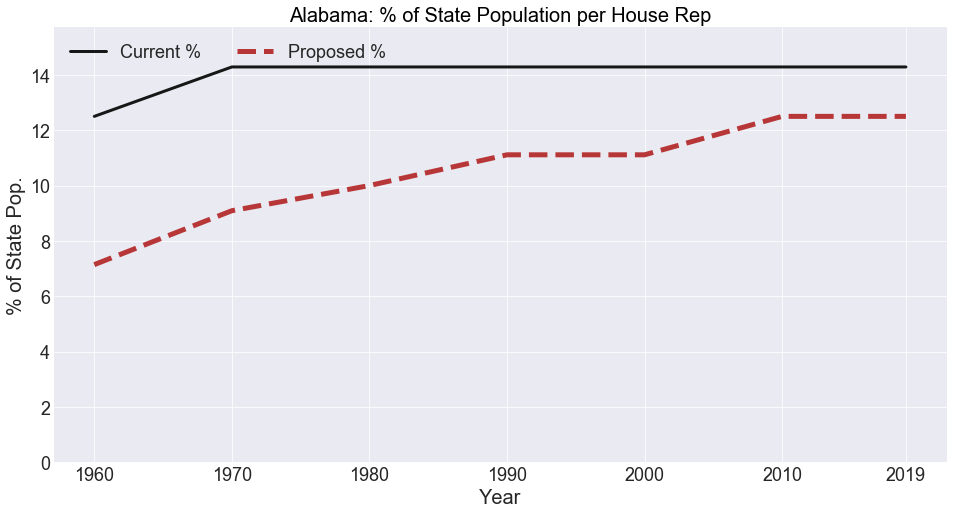

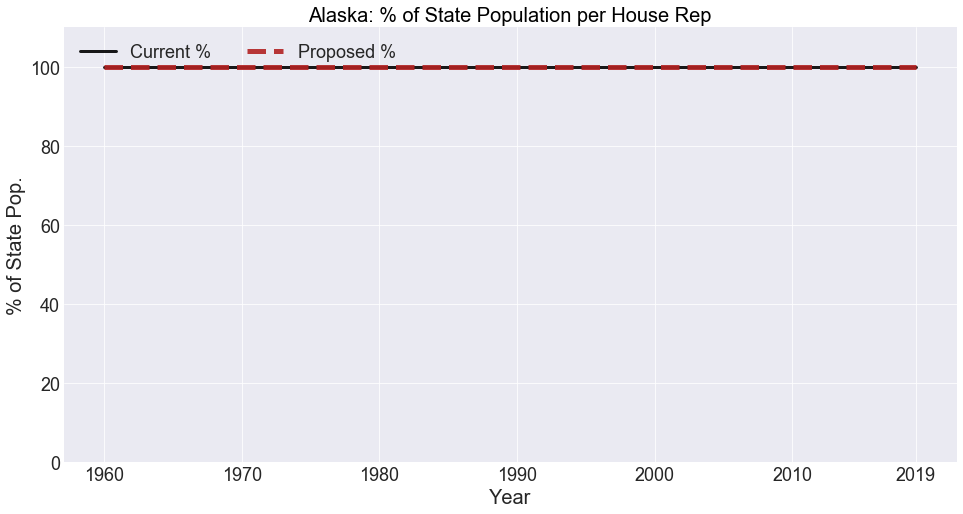

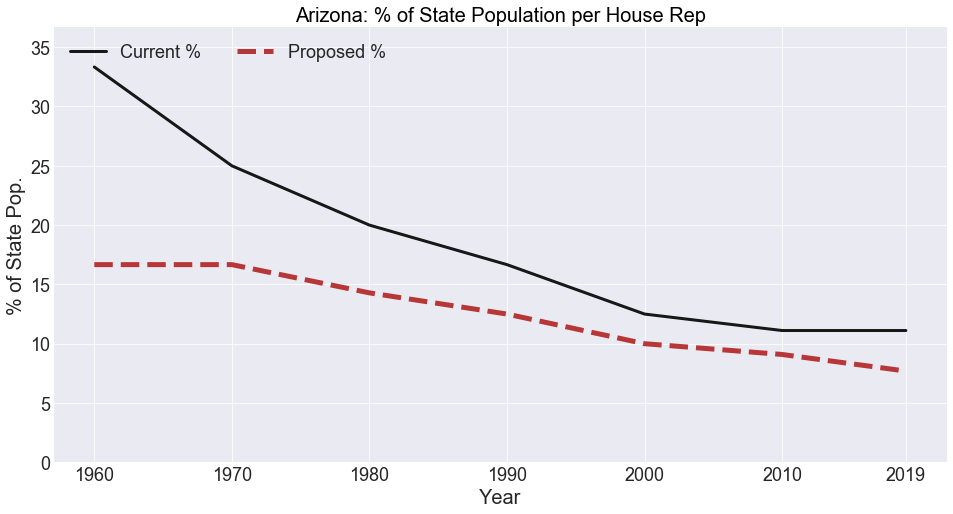

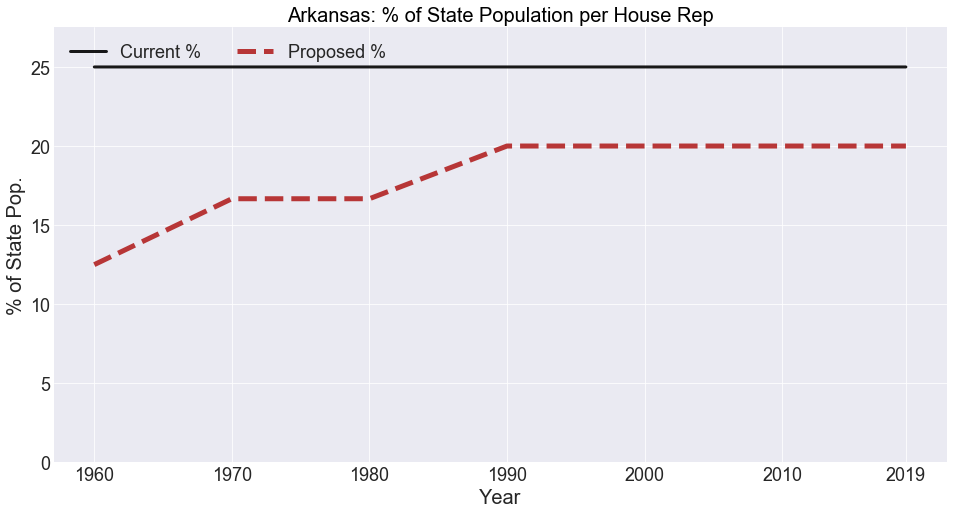

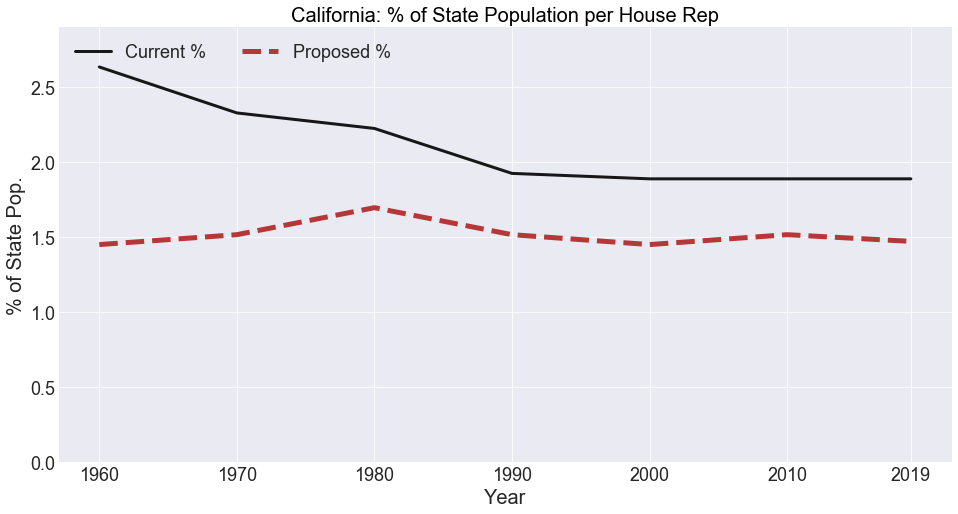

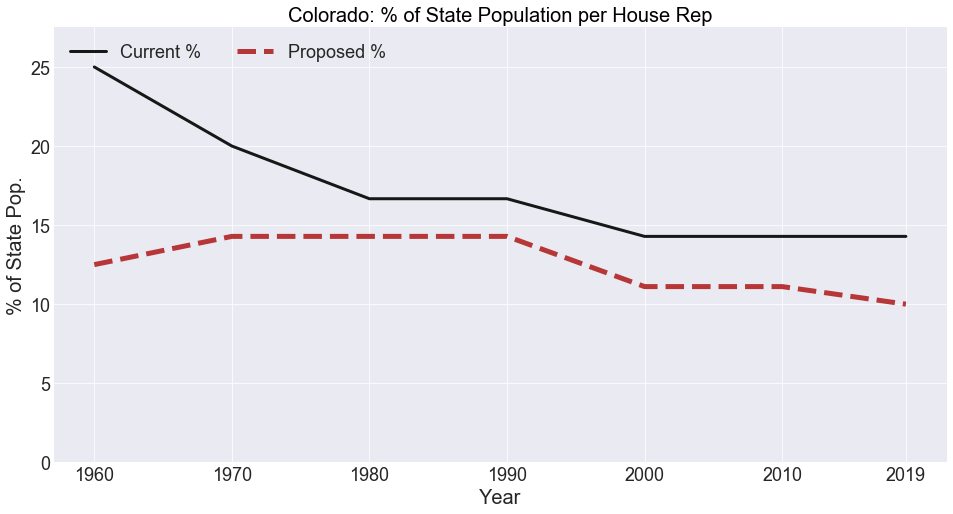

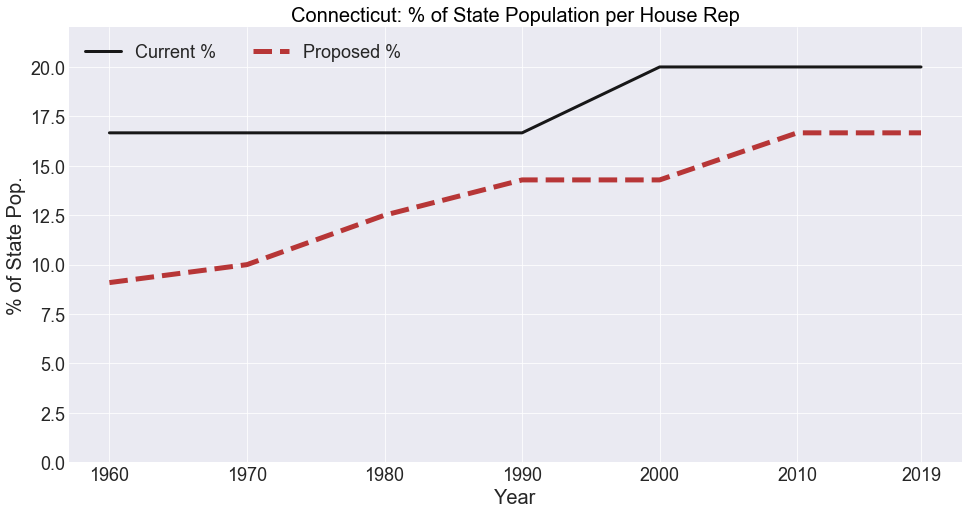

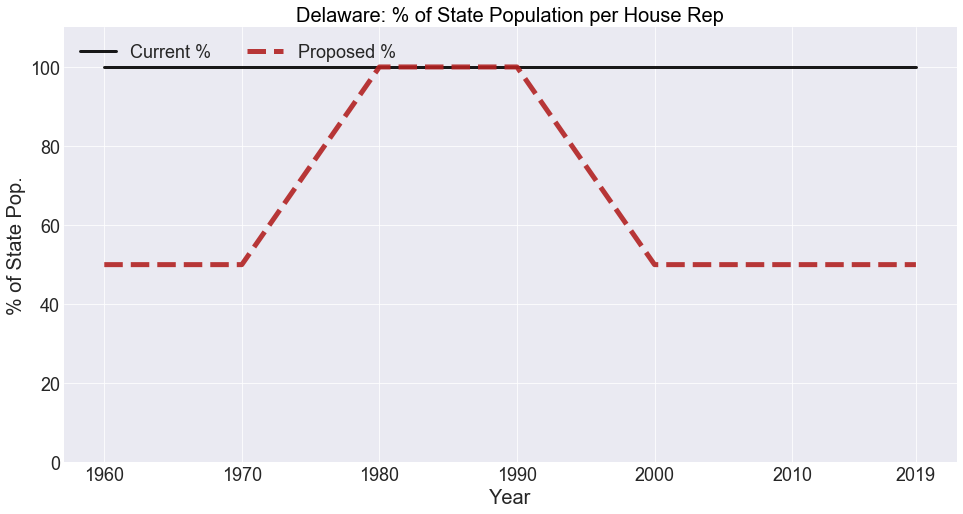

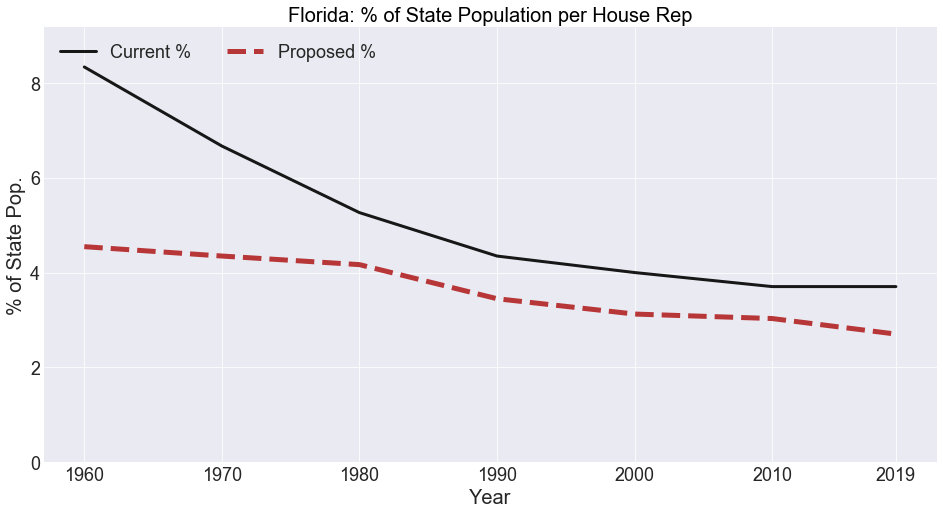

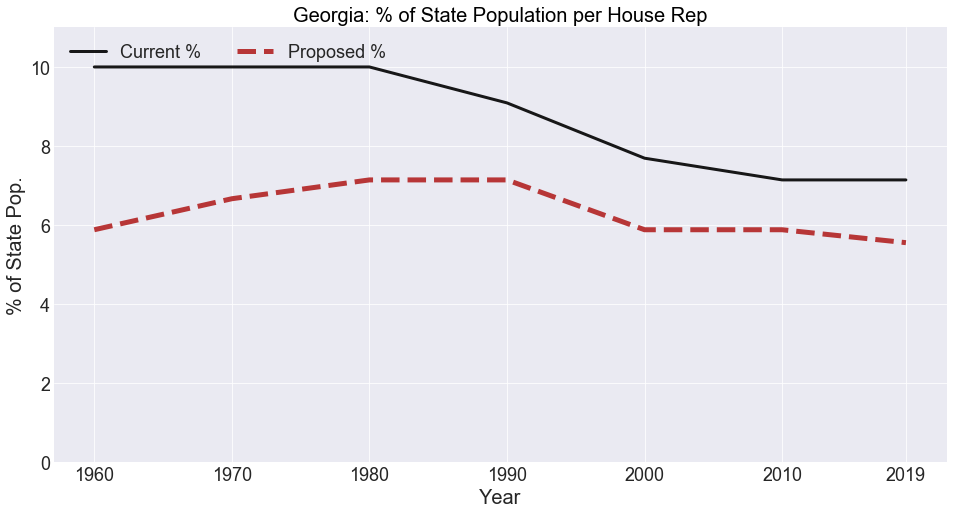

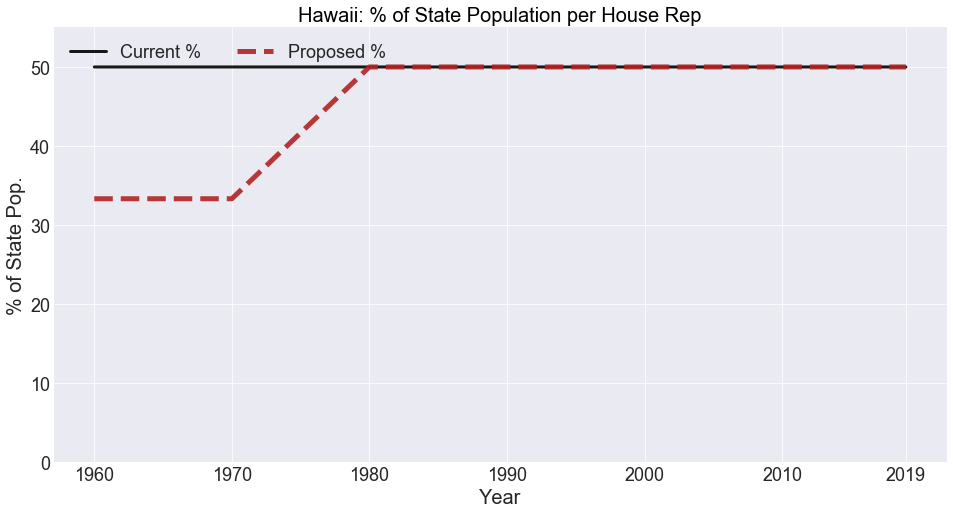

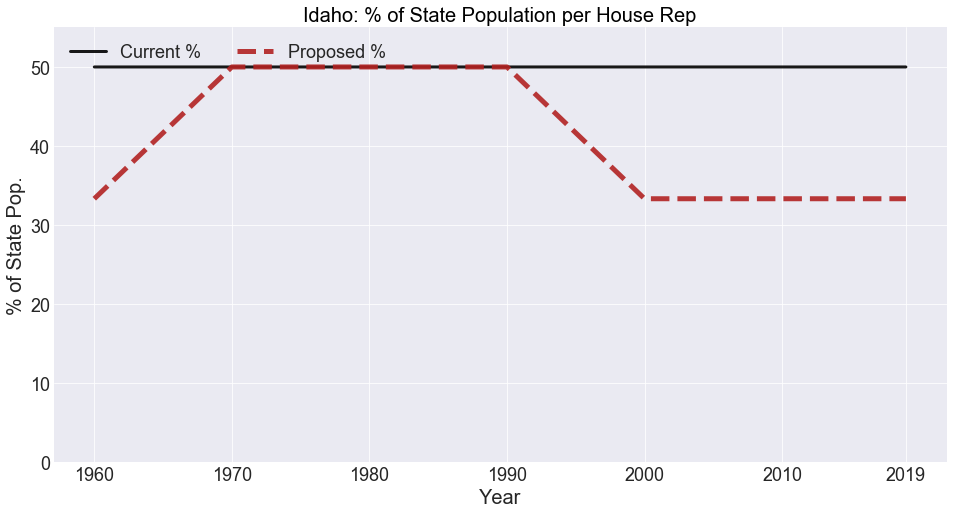

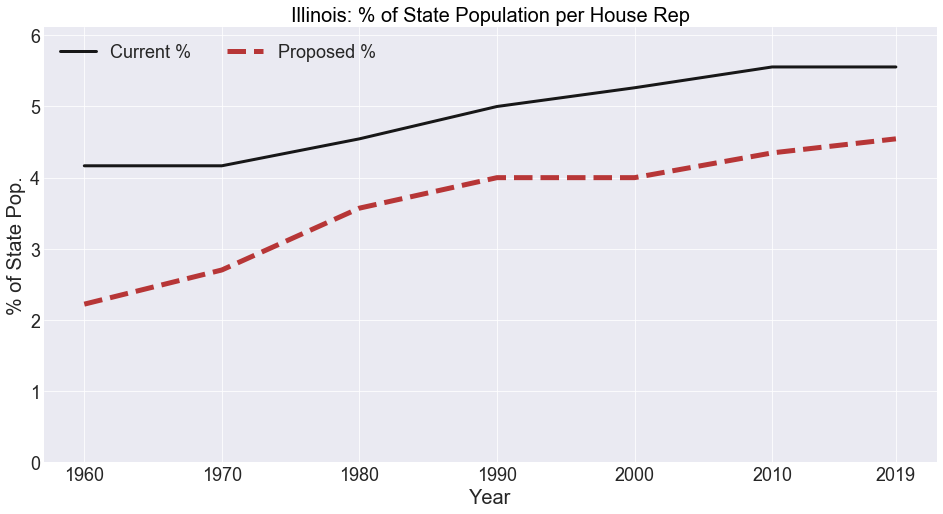

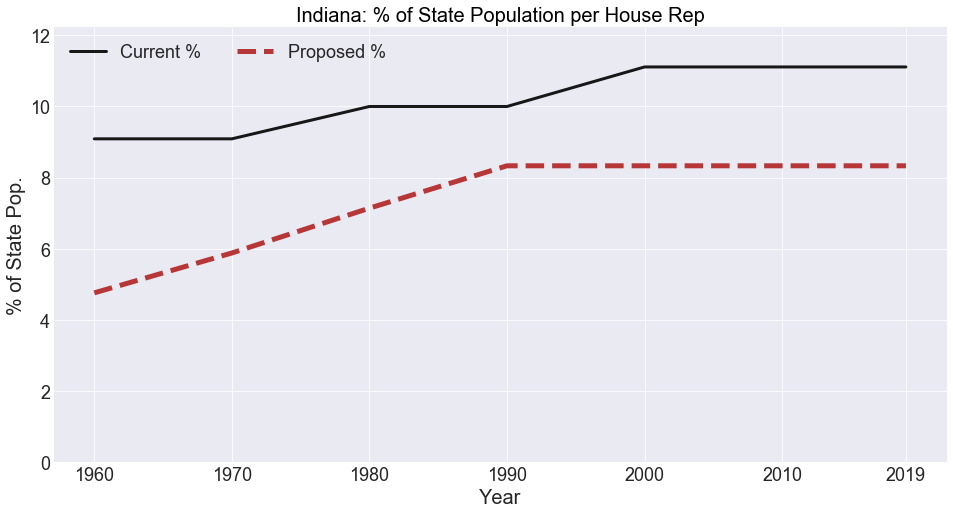

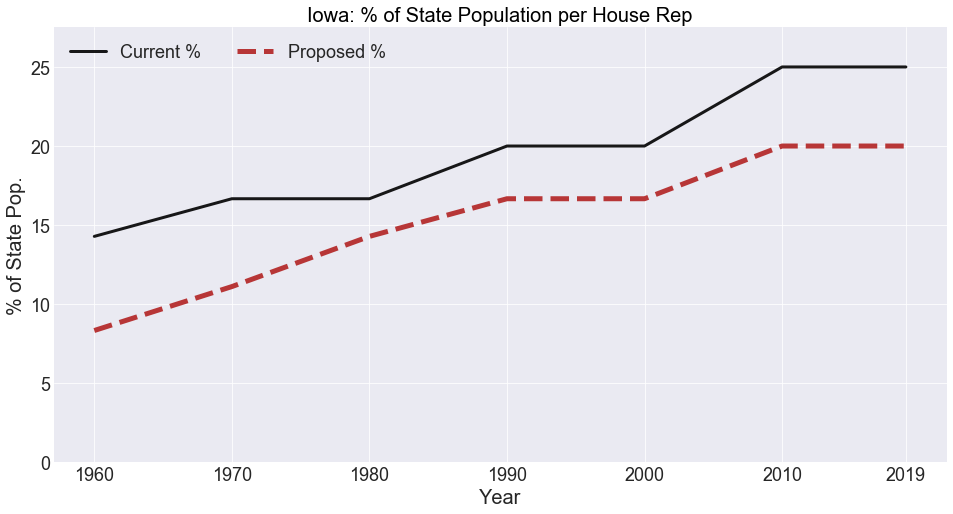

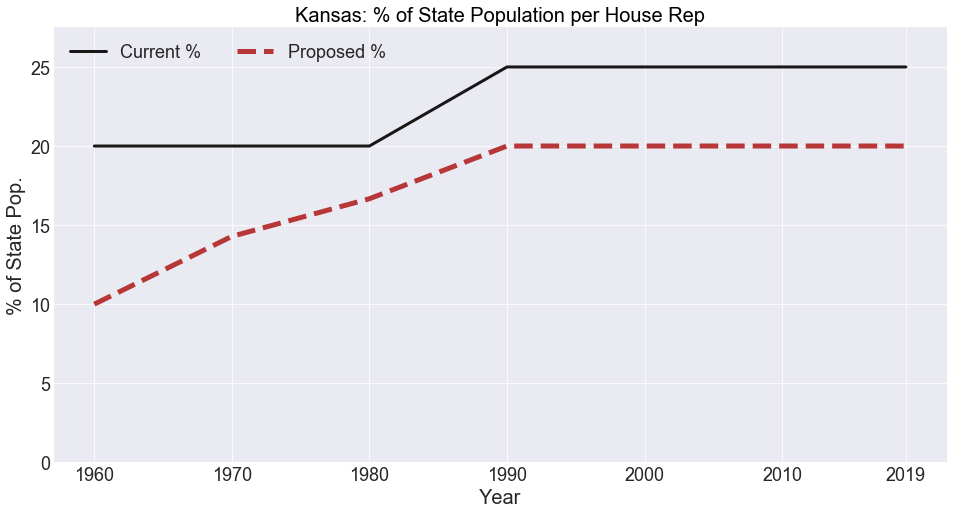

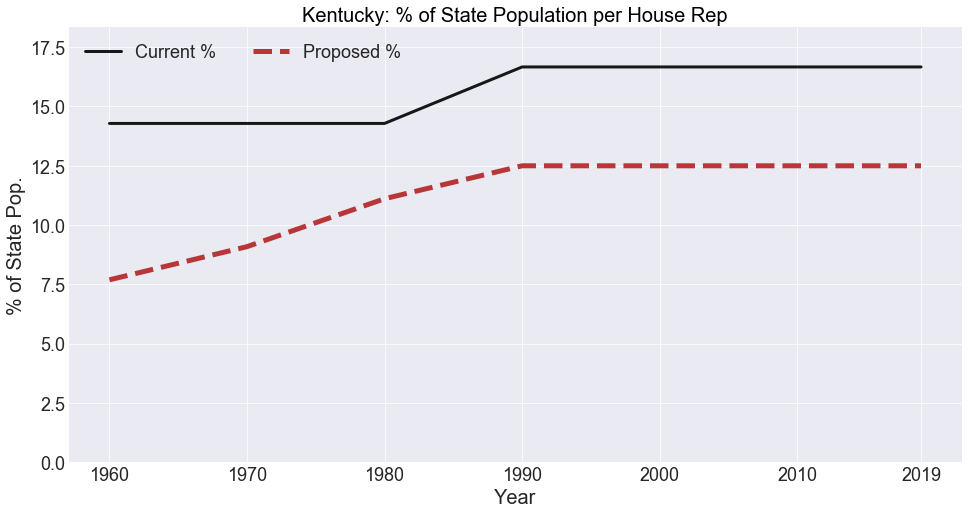

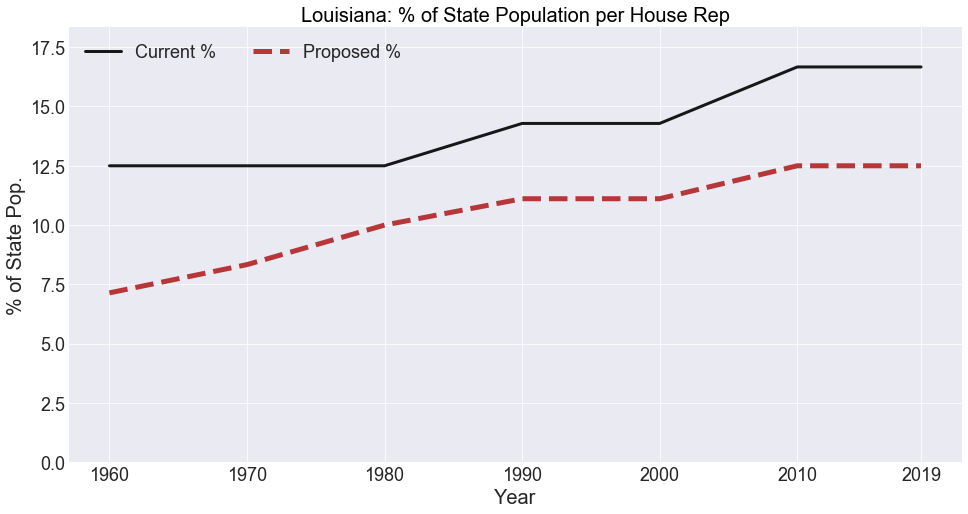

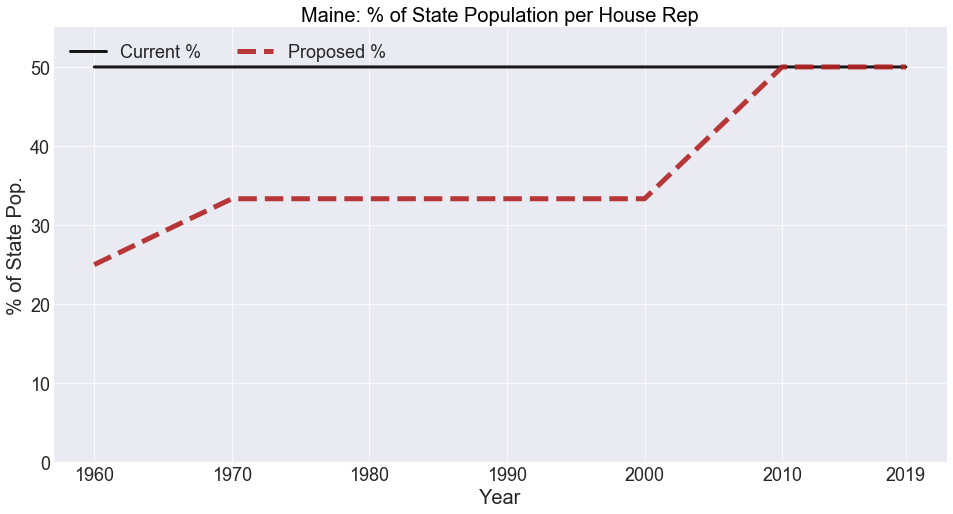

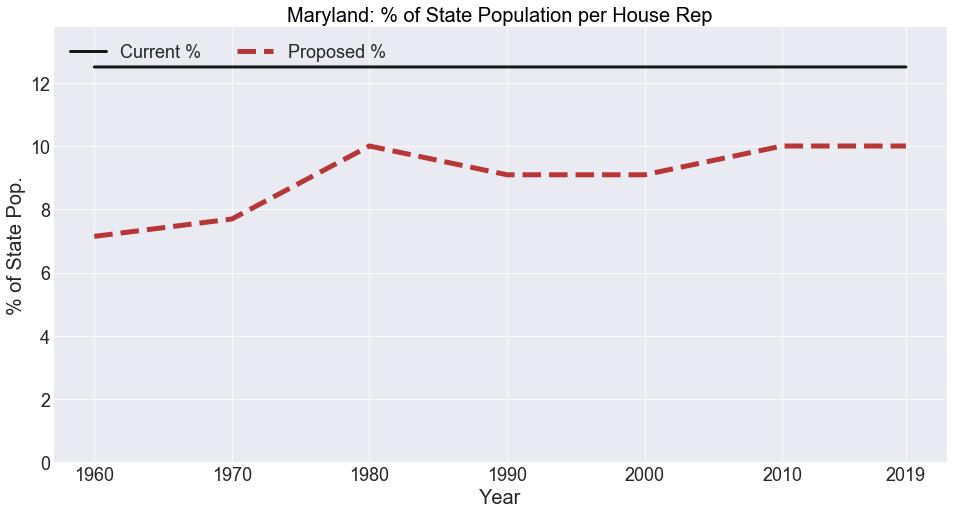

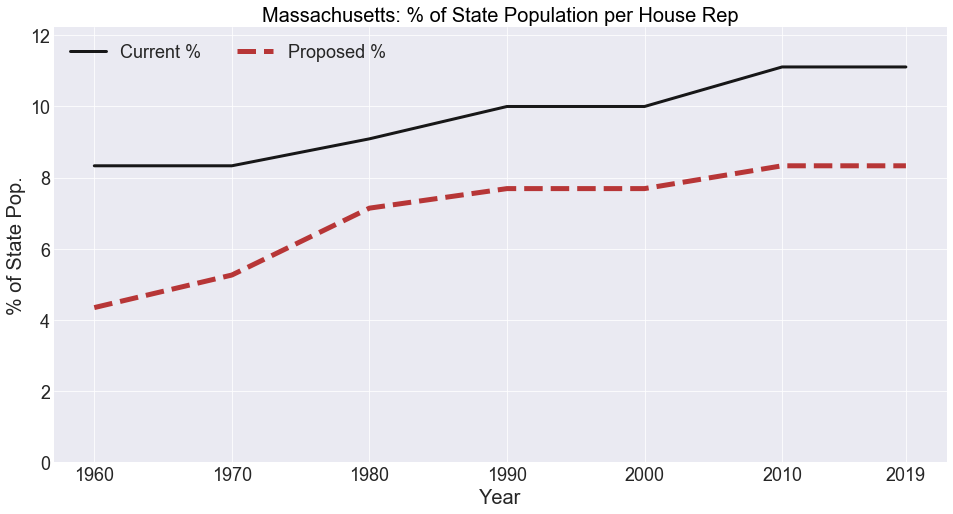

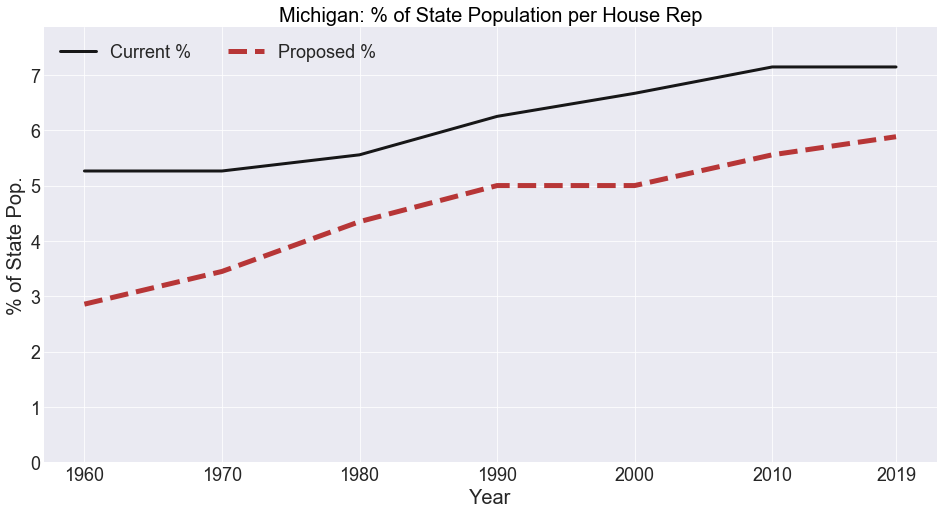

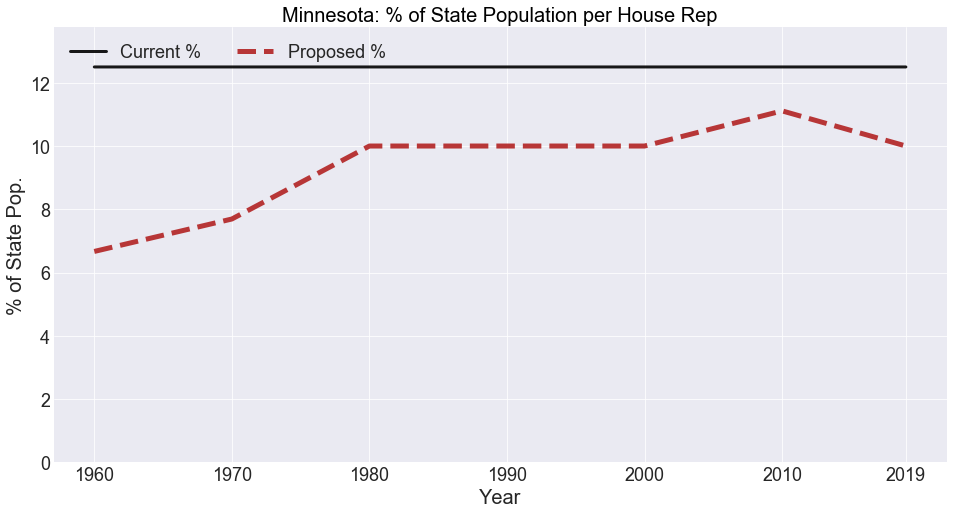

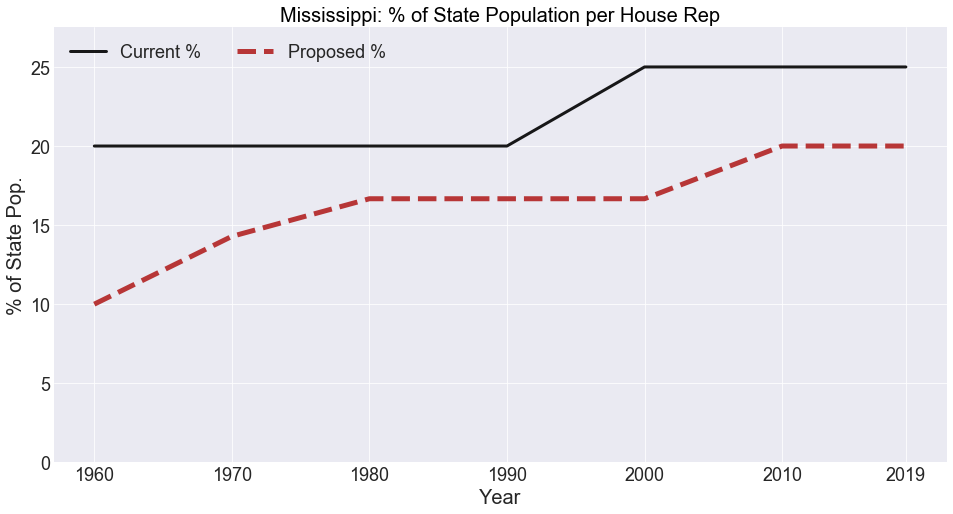

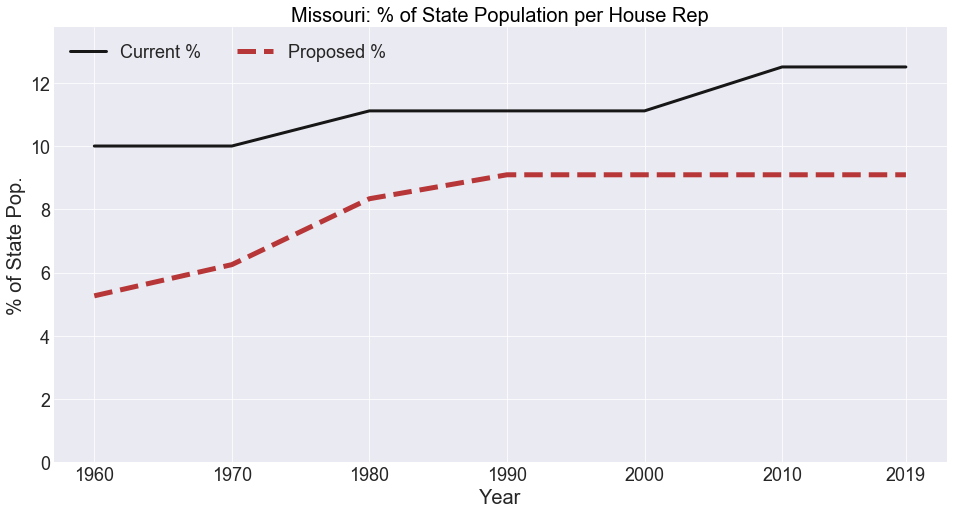

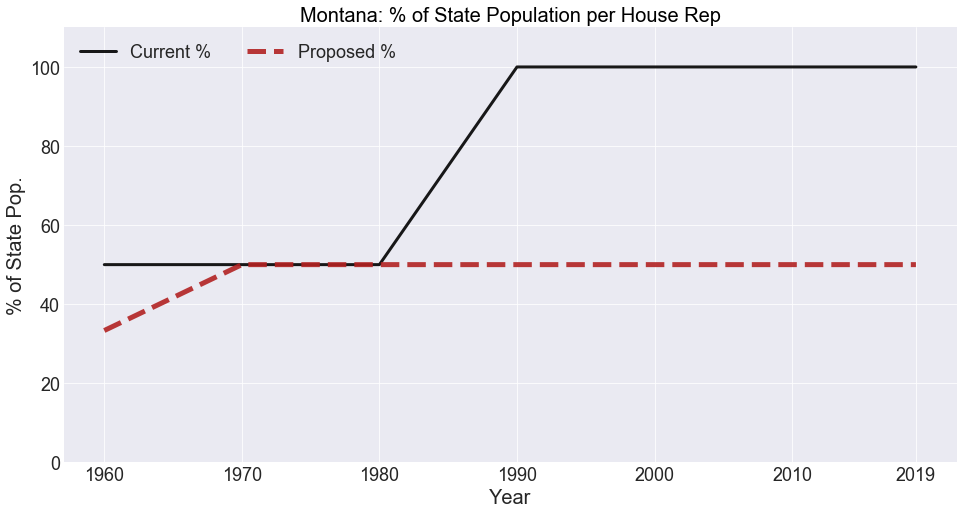

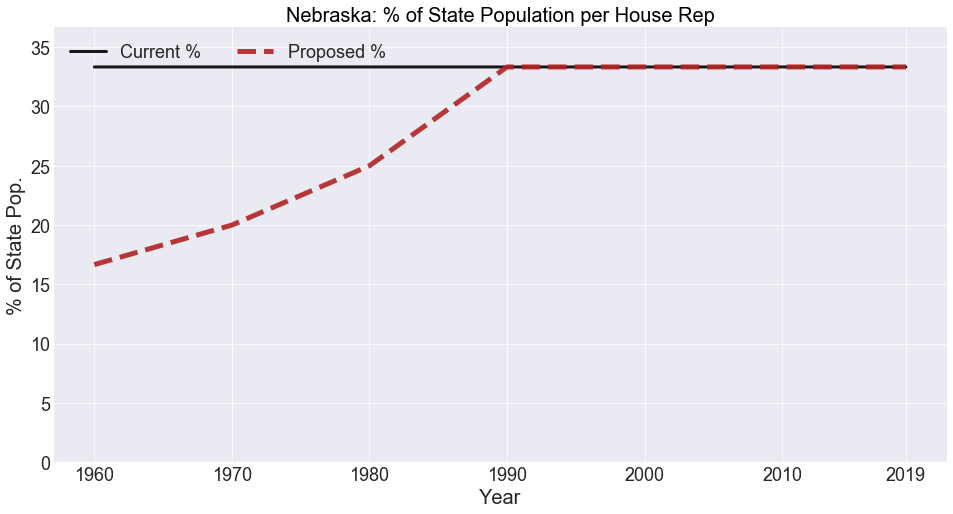

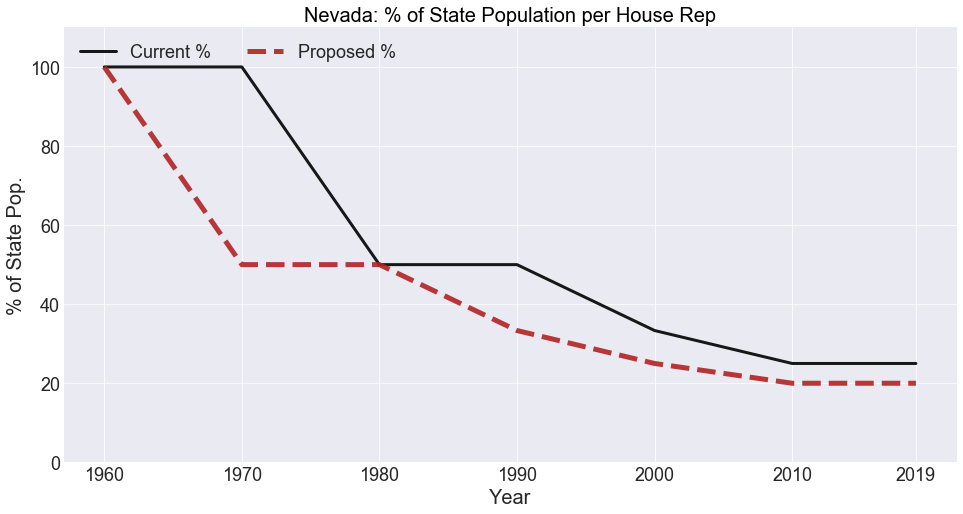

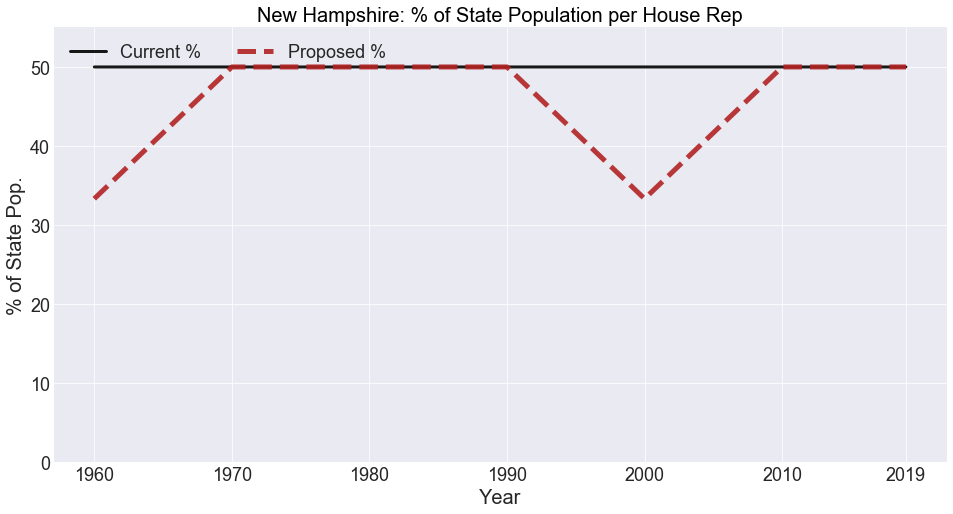

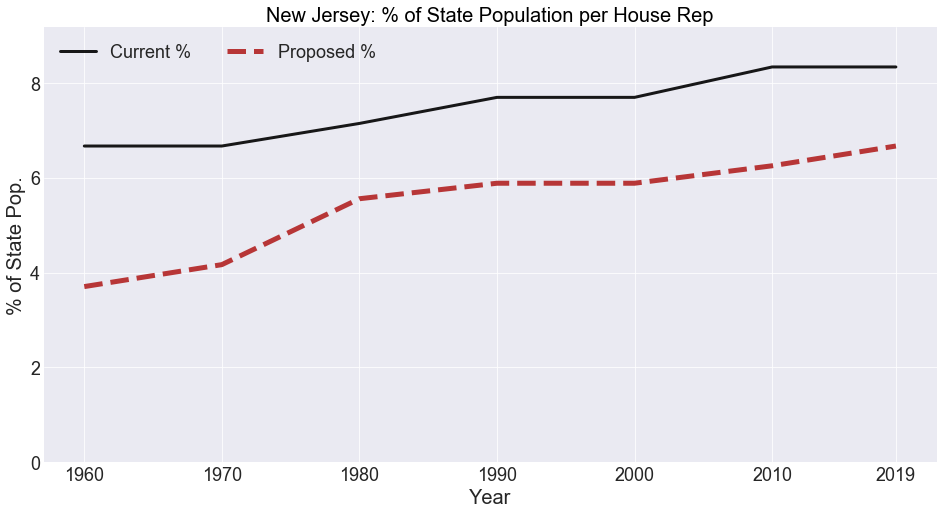

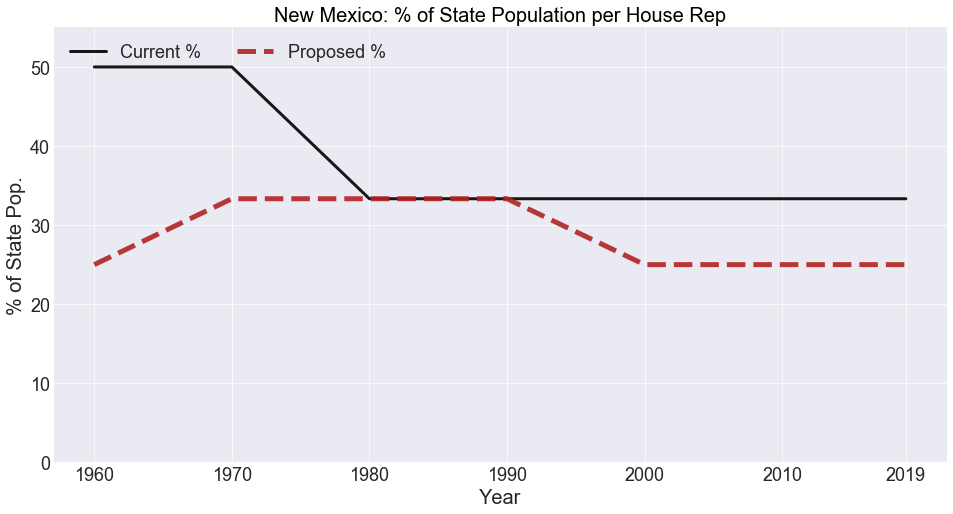

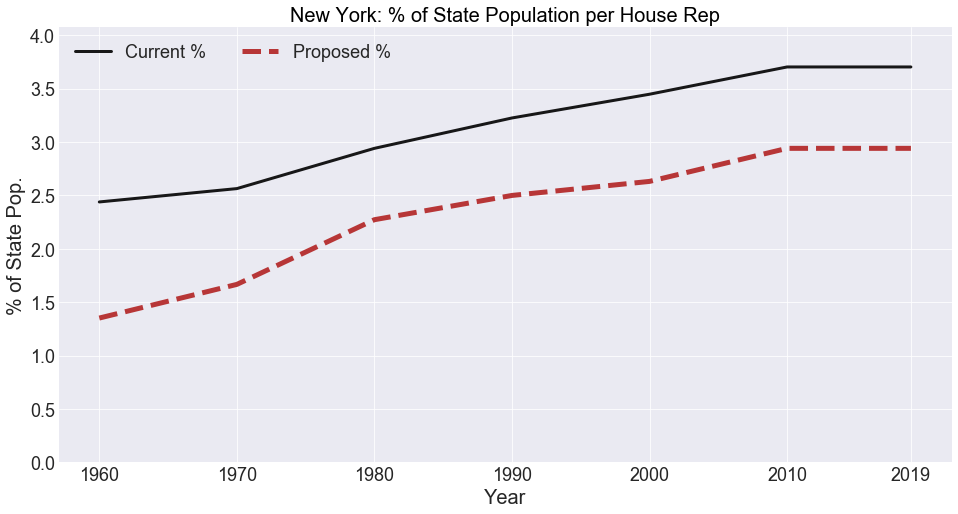

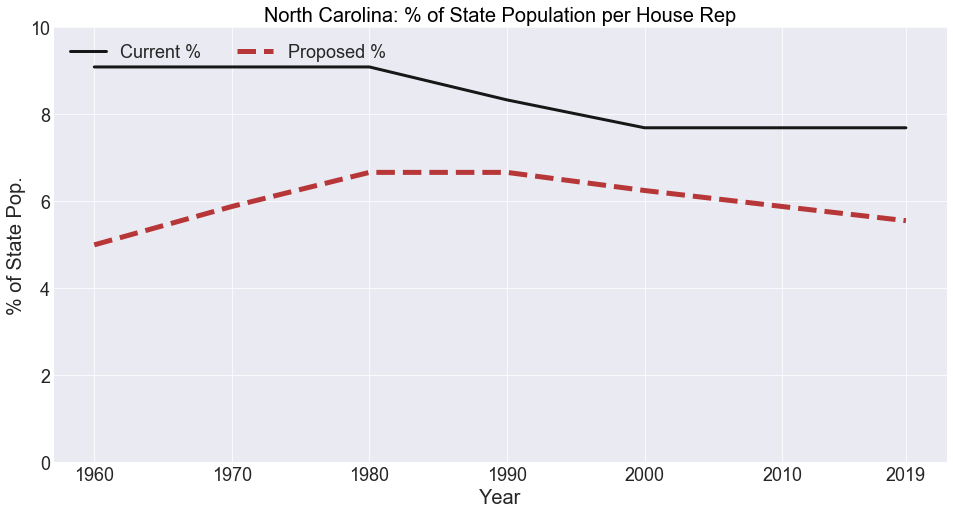

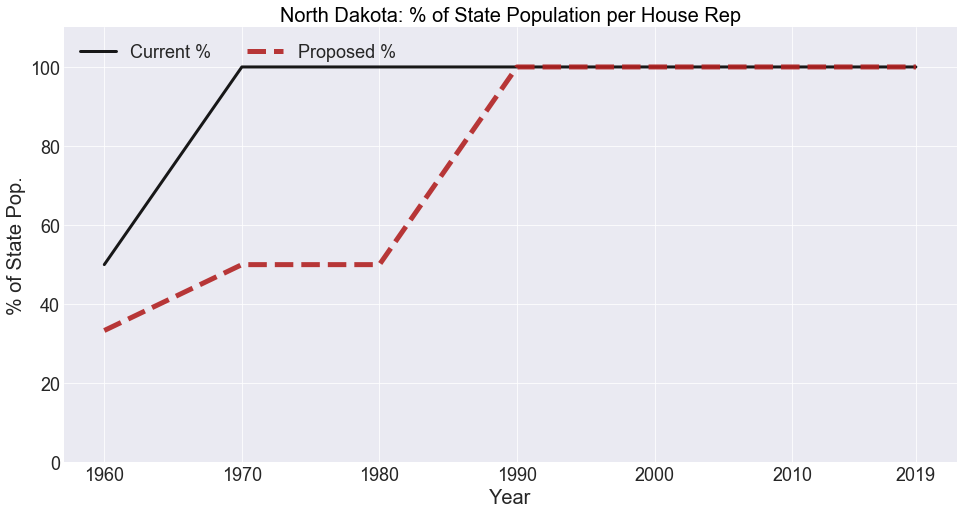

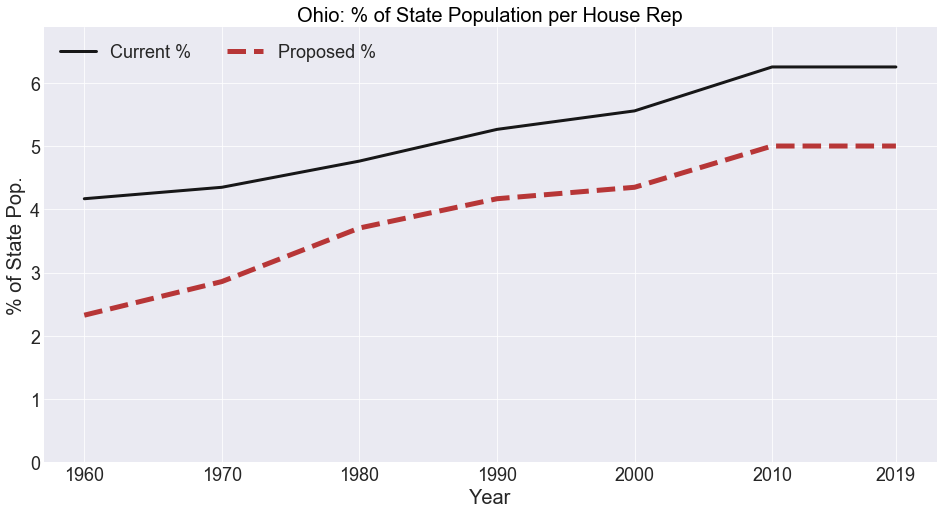

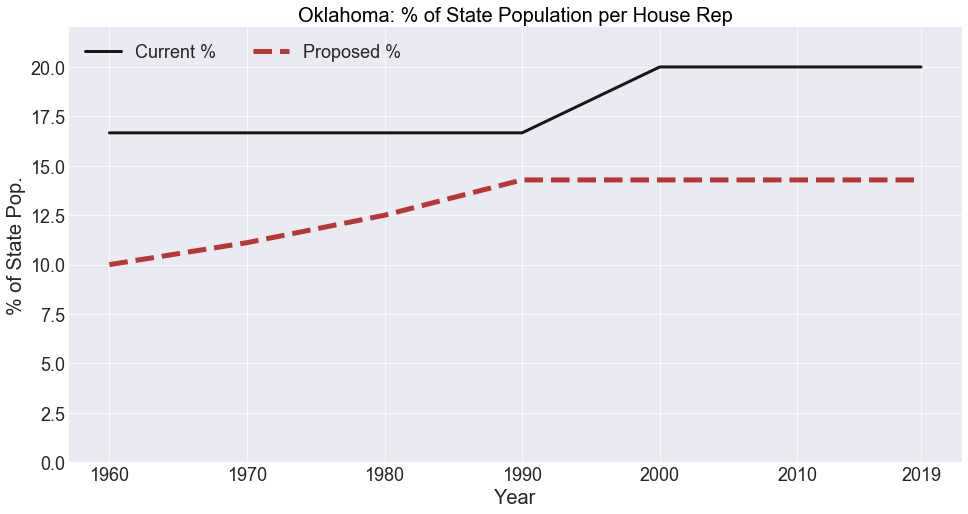

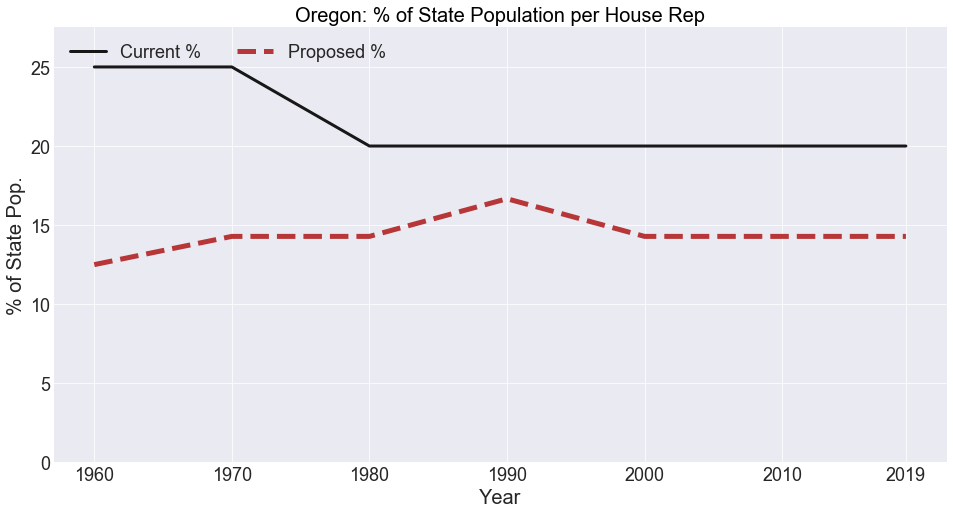

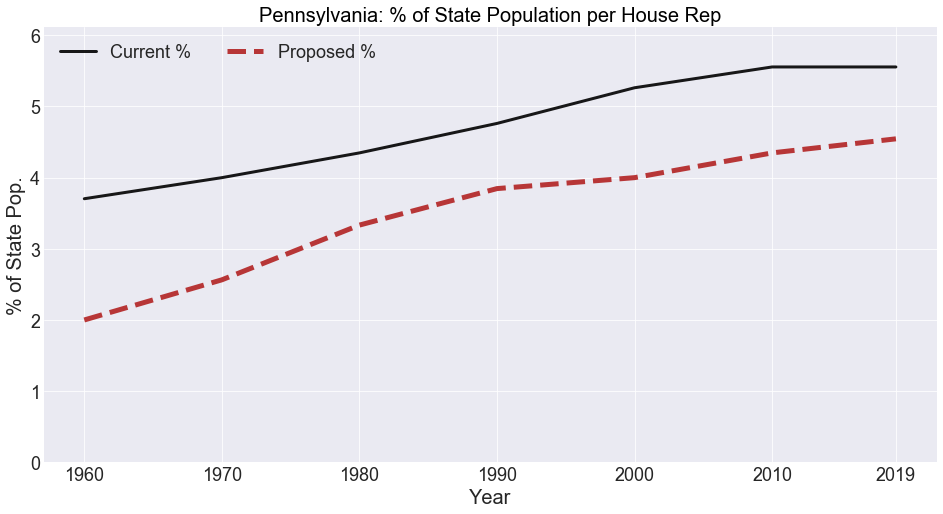

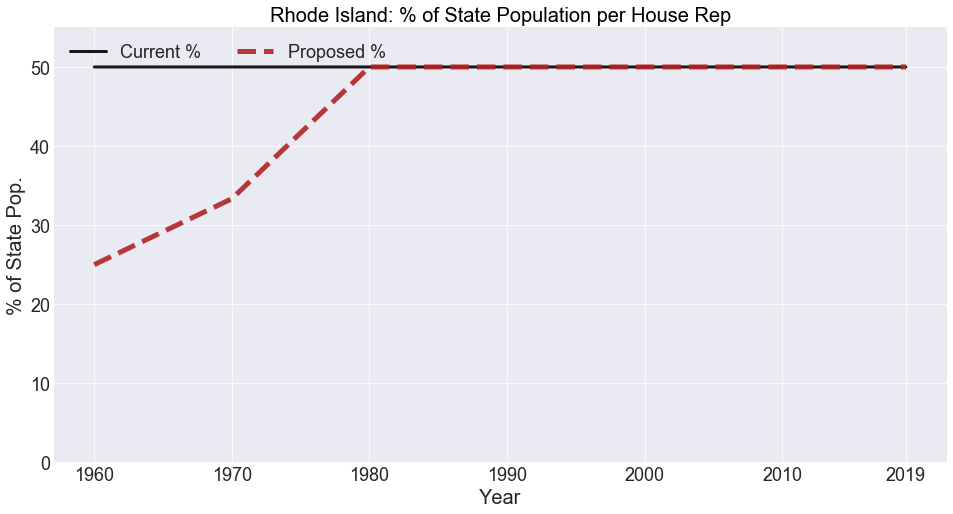

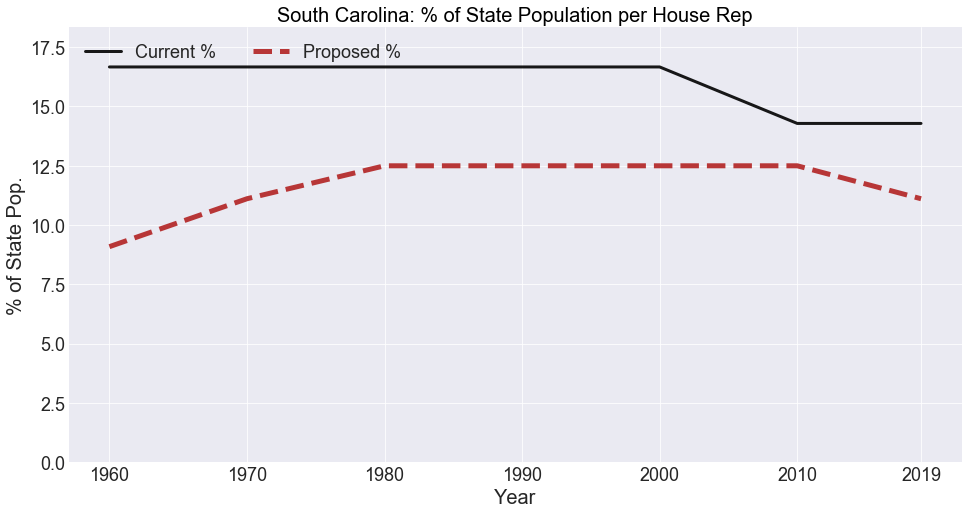

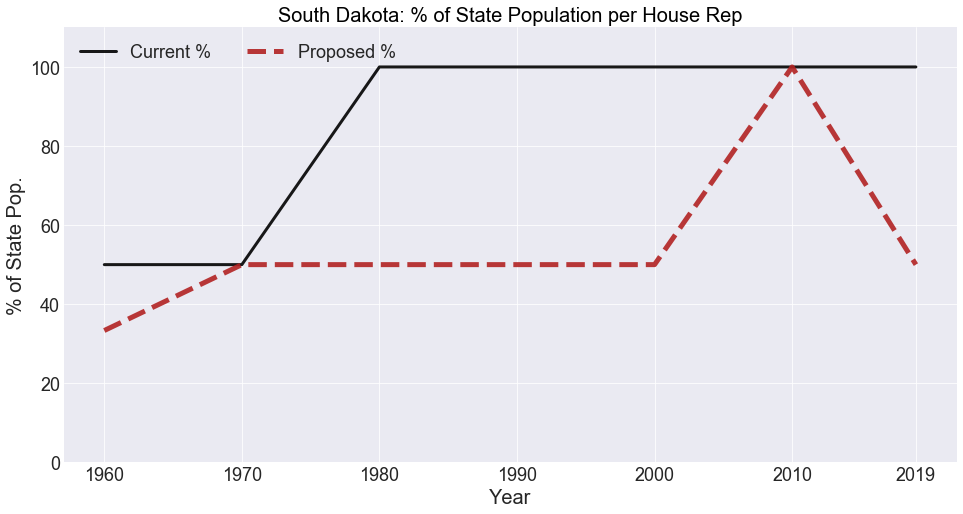

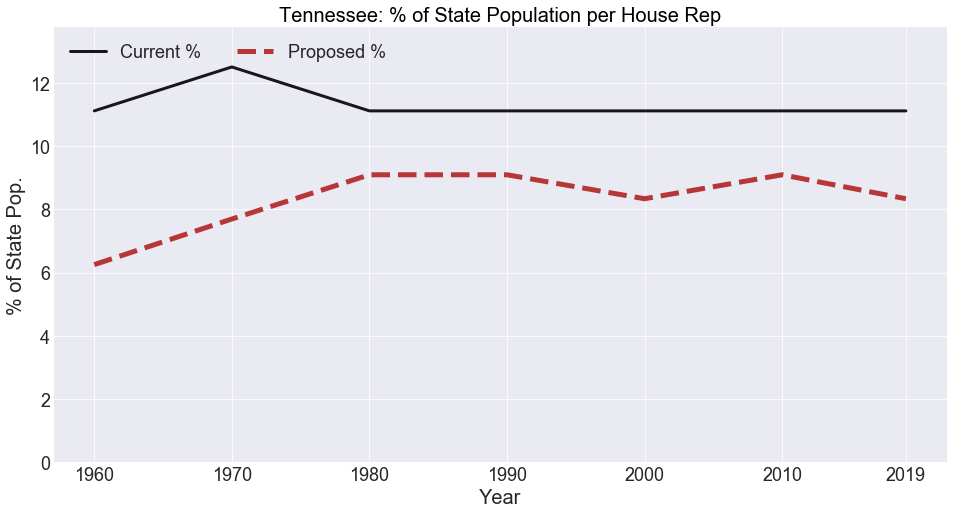

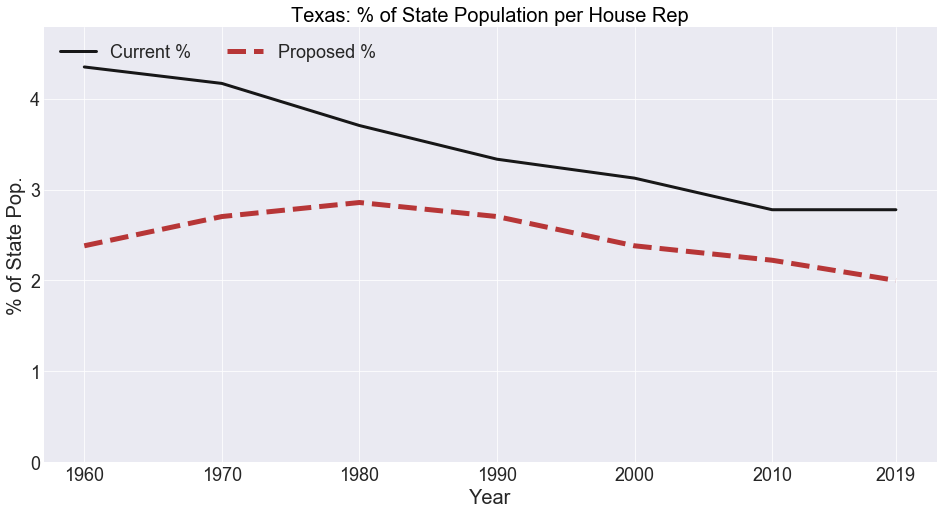

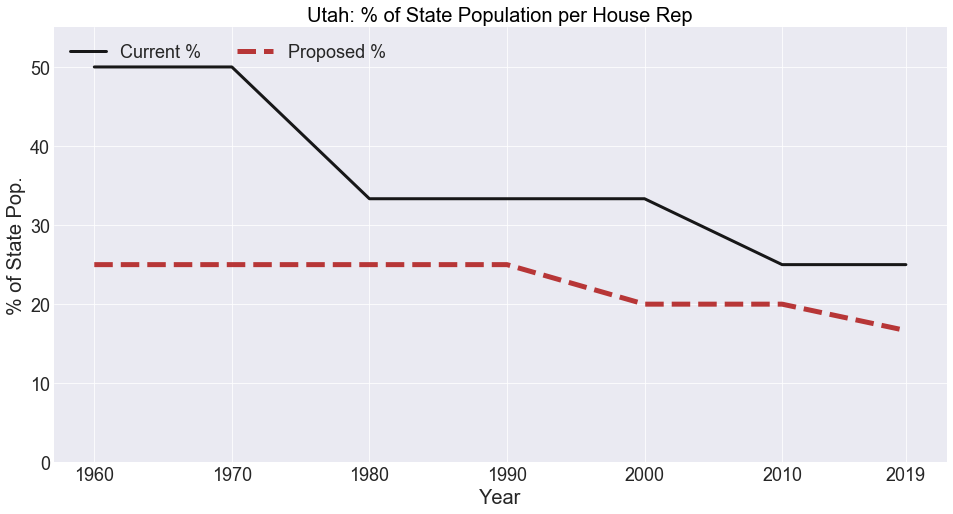

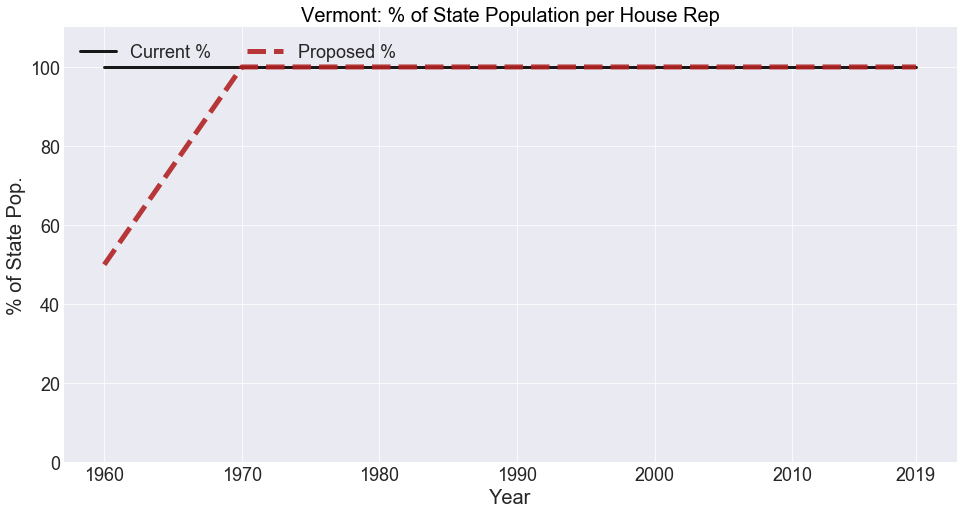

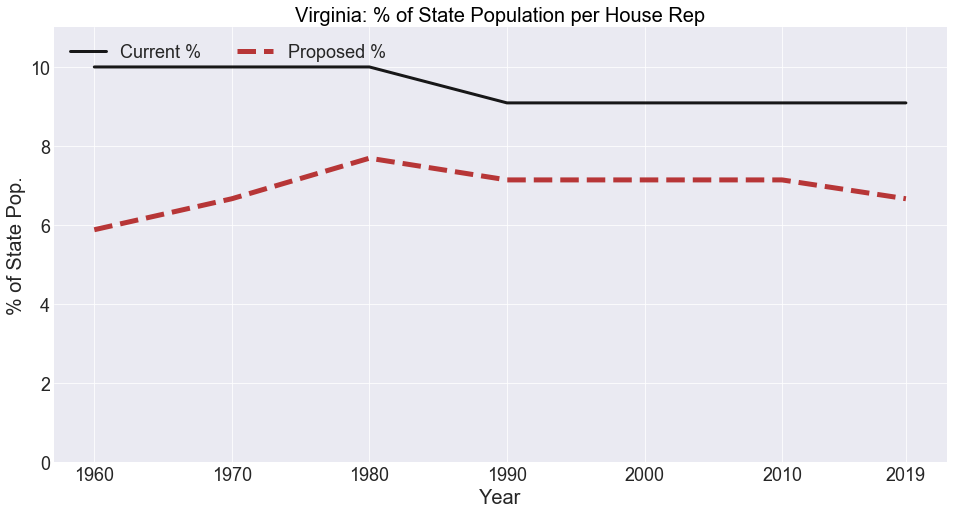

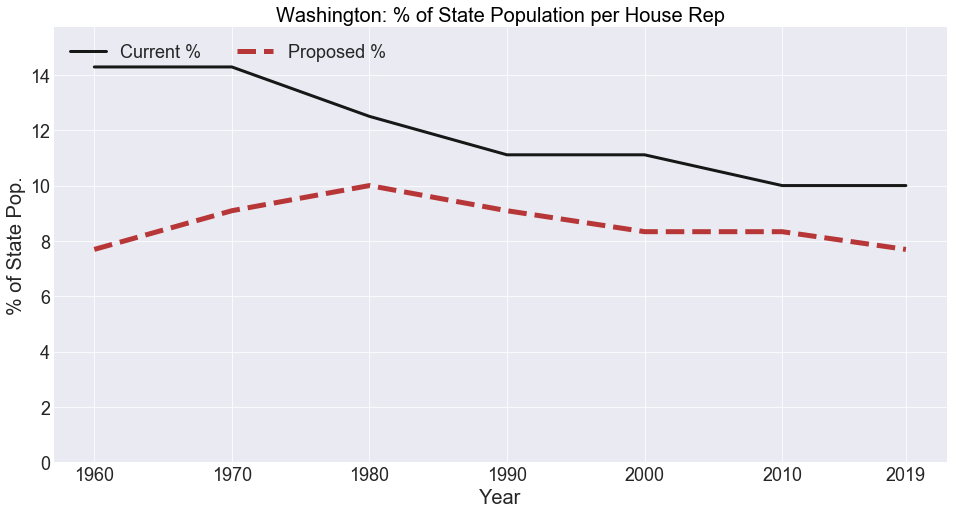

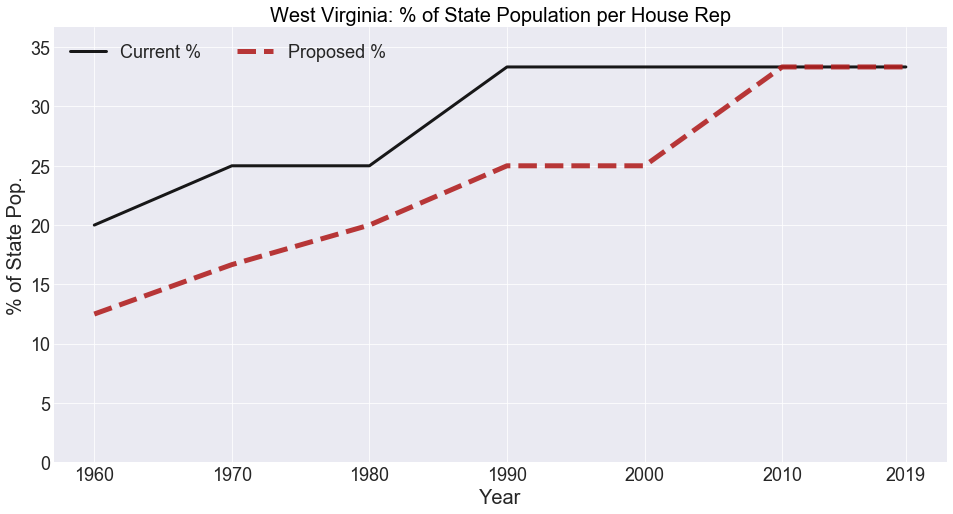

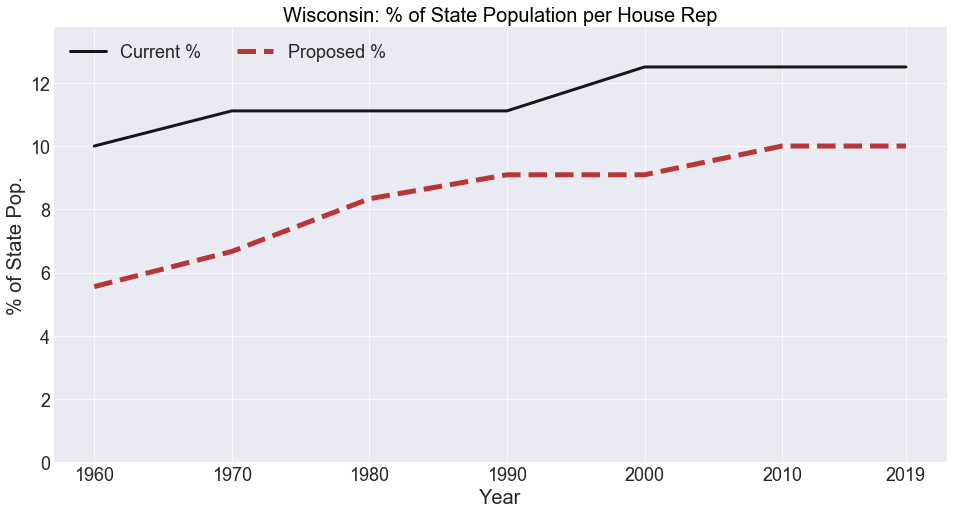

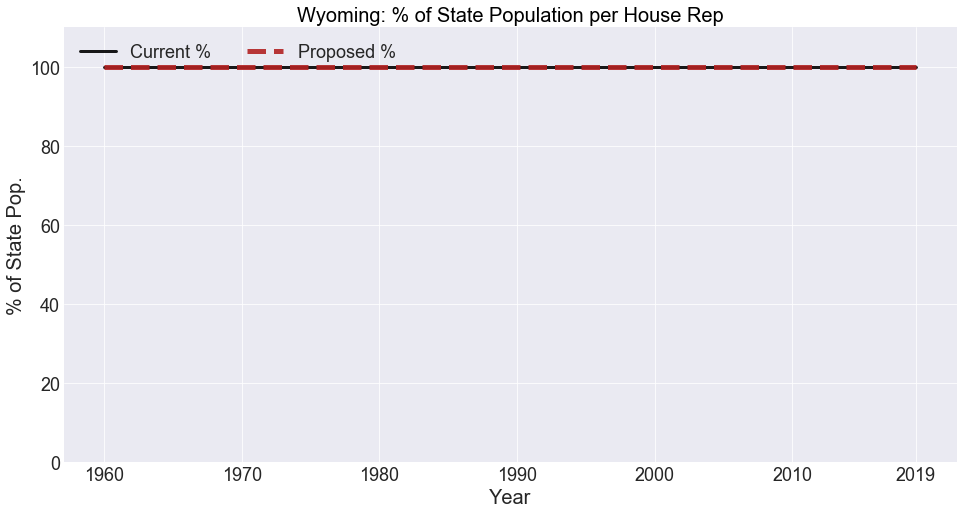

In [66]:
for state in state_list:

    graph_df = rawdata[rawdata['State'] == state]
    graph_df = graph_df.sort_values(by=['Year'], ascending=[True])

    # style
    plt.style.use('seaborn-darkgrid')
    plt.figure(figsize=(16,8))
    
    min_max = []

    min_max = graph_df['%ofPop']
    min_max = min_max.append(graph_df['PropSt%'])
    min_max = list(min_max)

    # create a color palette
    palette = plt.get_cmap('Set1')

    linestyles = ['-', '--']

    # multiple line plot
    plt.plot(graph_df['Year'], graph_df['%ofPop'], linestyle=linestyles[0], marker='', color='black', linewidth=3, alpha=0.9, label='Current %')
    plt.plot(graph_df['Year'], graph_df['PropSt%'], linestyle=linestyles[1], marker='', color='#b22222', linewidth=5, alpha=0.9, label='Proposed %')

    # Add legend
    plt.legend(loc=2, ncol=2, fontsize=18)
    plt.ylim(0, max(min_max)*1.10)
    plt.xticks(ca_df['Year'], fontsize=18)
    plt.yticks(fontsize=18)

    # Add titles
    plt.title(f"{state}: % of State Population per House Rep", loc='center', fontsize=20, fontweight=0, color='black')
    plt.xlabel("Year", fontsize=20)
    plt.ylabel("% of State Pop.", fontsize=20)

    # Save
    plt.savefig(f'figs/PercentOfStatePop/{state}PercentStatePop.png')

### For each year, plot the number of House Representatives per state and the number of proposed House Representatives per state

checkpoint1
checkpoint2


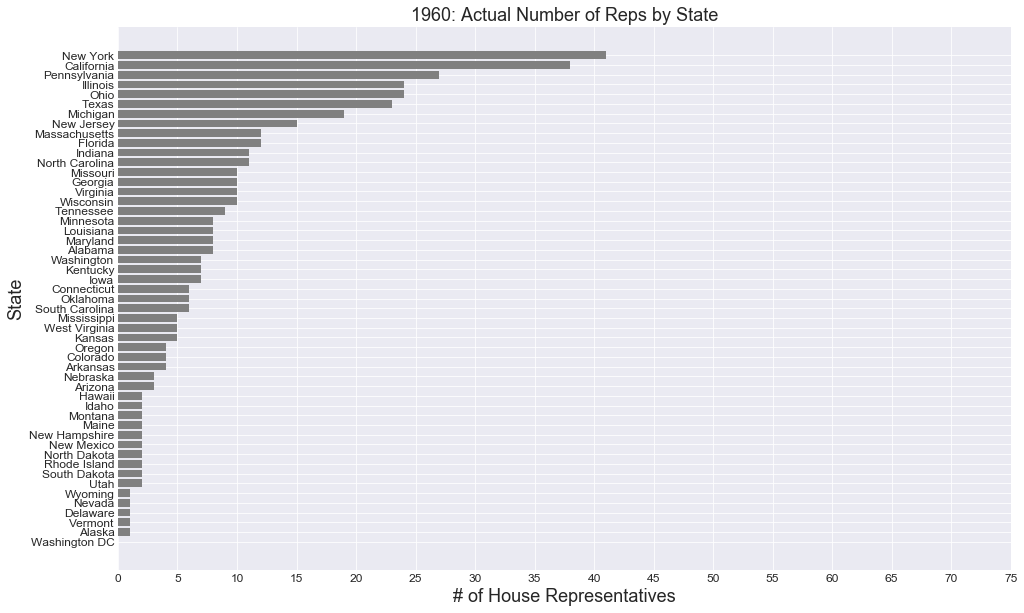

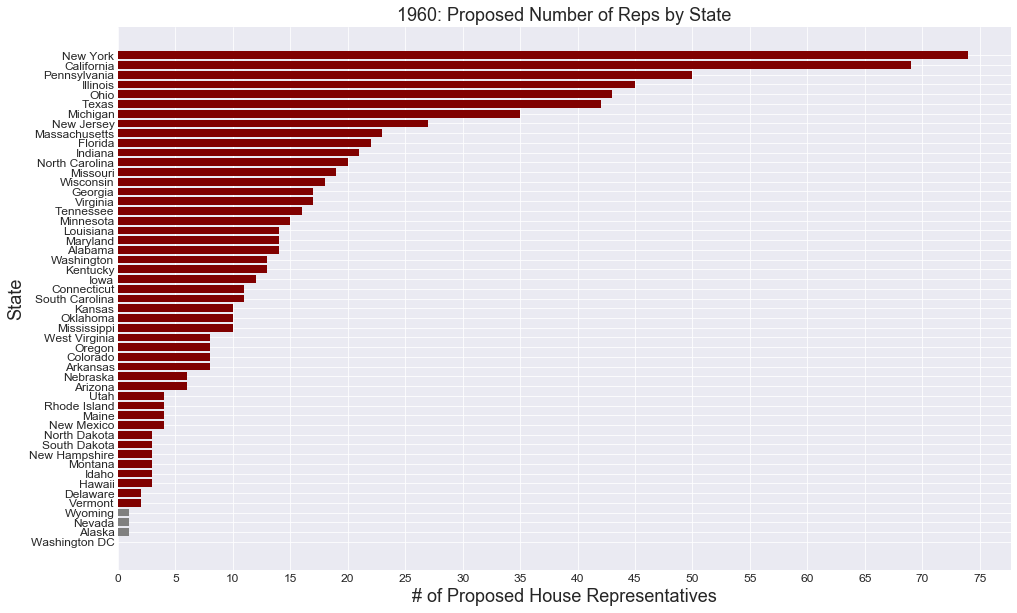

In [67]:
graphyear = 1960
graph_df = df1960.copy()

graph_df = graph_df.sort_values(by=['Reps'], ascending=[True])

color = []

for number in graph_df['Reps']:
    color.append('gray')

plt.figure(figsize=(16,10))
plt.barh(graph_df['State'], graph_df['Reps'], color=color)

# we also need to switch the labels
plt.xlabel('# of House Representatives', fontsize=18)
plt.ylabel('State', fontsize=18)
plt.title(f'{graphyear}: Actual Number of Reps by State', fontsize=18)

plt.yticks(fontsize=12)
plt.xticks(np.arange(0, 76, 5), fontsize=12)

# Save
plt.savefig(f'figs/RepsPerStatebyYear/{graphyear}reps_barhchart.png')

graph_df = graph_df.sort_values(by=['PropStReps'], ascending=[True])

flipcount = graph_df['PropFlip']
color = []

for number in flipcount:
    if number > 0:
        color.append('maroon')
    elif number < 0:
        color.append('black')
    else:
        color.append('gray')

plt.figure(figsize=(16,10))
plt.barh(graph_df['State'], graph_df['PropStReps'], color=color)

# we also need to switch the labels
plt.xlabel('# of Proposed House Representatives', fontsize=18)
plt.ylabel('State', fontsize=18)
plt.title(f'{graphyear}: Proposed Number of Reps by State', fontsize=18)

print('checkpoint1')

plt.yticks(fontsize=12)
plt.xticks(np.arange(0, 76, 5), fontsize=12)

print('checkpoint2')

# Save
plt.savefig(f'figs/RepsPerStatebyYear/{graphyear}propreps_barhchart.png')

checkpoint1
checkpoint2


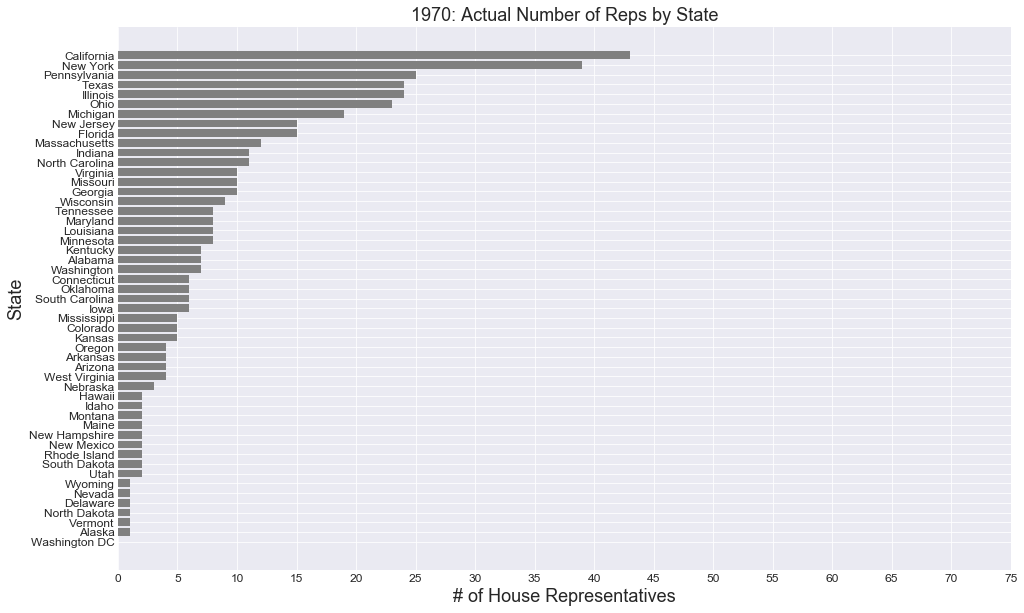

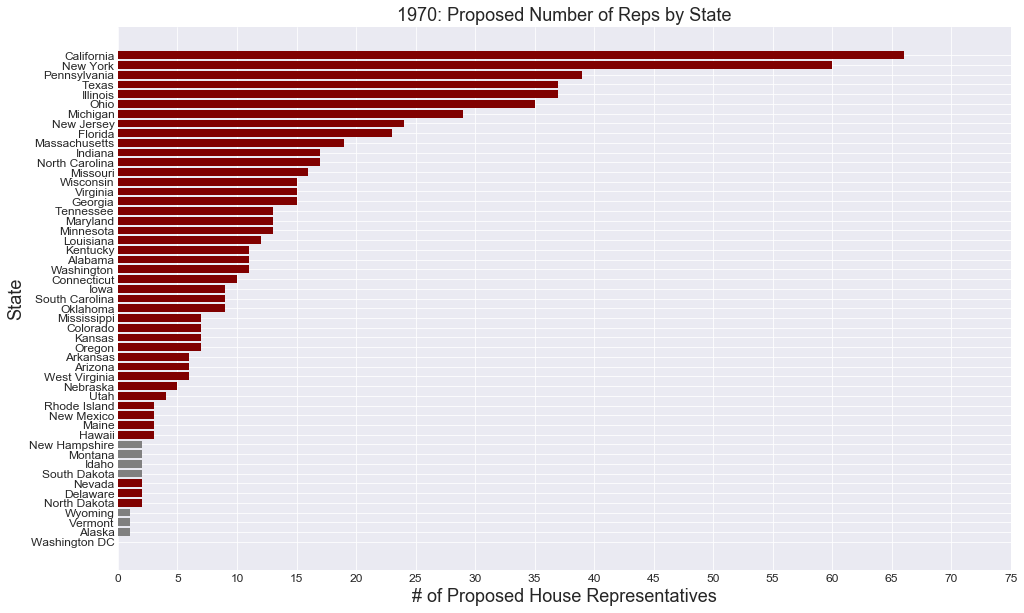

In [68]:
graphyear = 1970
graph_df = df1970.copy()

graph_df = graph_df.sort_values(by=['Reps'], ascending=[True])

color = []

for number in graph_df['Reps']:
    color.append('gray')

plt.figure(figsize=(16,10))
plt.barh(graph_df['State'], graph_df['Reps'], color=color)

# we also need to switch the labels
plt.xlabel('# of House Representatives', fontsize=18)
plt.ylabel('State', fontsize=18)
plt.title(f'{graphyear}: Actual Number of Reps by State', fontsize=18)

plt.yticks(fontsize=12)
plt.xticks(np.arange(0, 76, 5), fontsize=12)

# Save
plt.savefig(f'figs/RepsPerStatebyYear/{graphyear}reps_barhchart.png')

graph_df = graph_df.sort_values(by=['PropStReps'], ascending=[True])

flipcount = graph_df['PropFlip']
color = []

for number in flipcount:
    if number > 0:
        color.append('maroon')
    elif number < 0:
        color.append('black')
    else:
        color.append('gray')

plt.figure(figsize=(16,10))
plt.barh(graph_df['State'], graph_df['PropStReps'], color=color)

# we also need to switch the labels
plt.xlabel('# of Proposed House Representatives', fontsize=18)
plt.ylabel('State', fontsize=18)
plt.title(f'{graphyear}: Proposed Number of Reps by State', fontsize=18)

print('checkpoint1')

plt.yticks(fontsize=12)
plt.xticks(np.arange(0, 76, 5), fontsize=12)

print('checkpoint2')

# Save
plt.savefig(f'figs/RepsPerStatebyYear/{graphyear}propreps_barhchart.png')

checkpoint1
checkpoint2


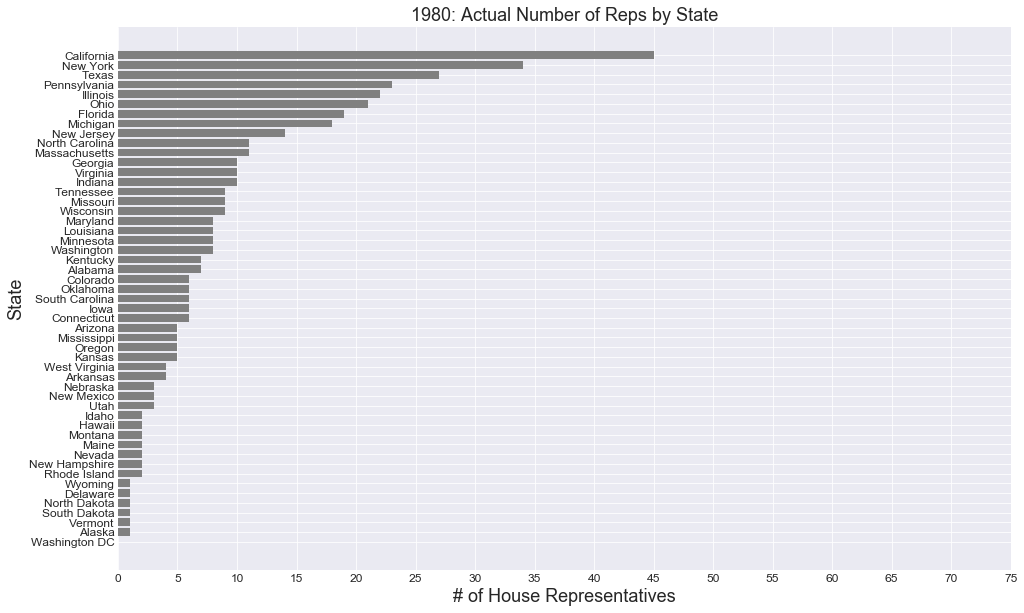

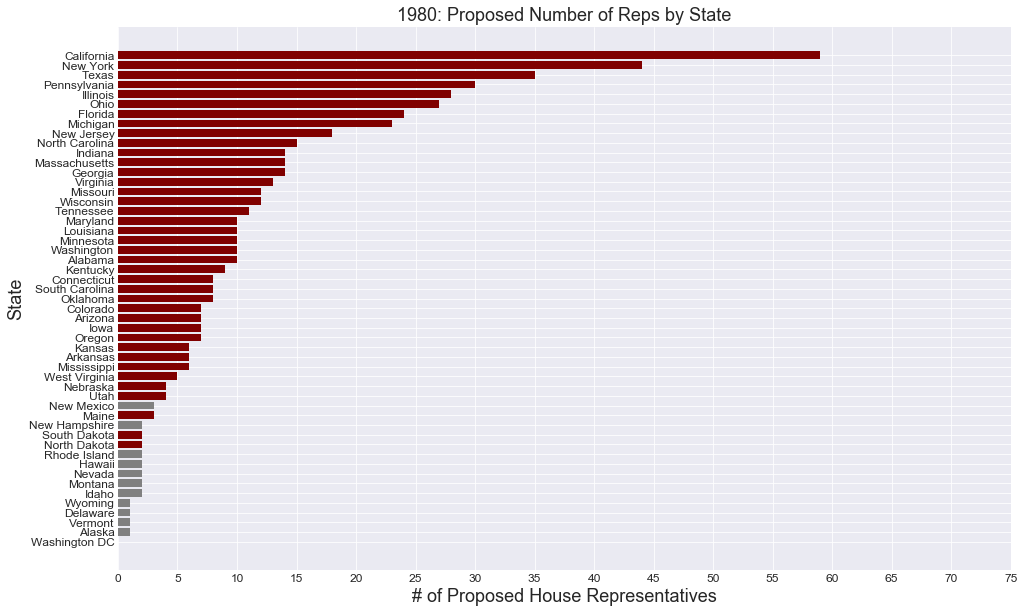

In [69]:
graphyear = 1980
graph_df = df1980.copy()

graph_df = graph_df.sort_values(by=['Reps'], ascending=[True])

color = []

for number in graph_df['Reps']:
    color.append('gray')

plt.figure(figsize=(16,10))
plt.barh(graph_df['State'], graph_df['Reps'], color=color)

# we also need to switch the labels
plt.xlabel('# of House Representatives', fontsize=18)
plt.ylabel('State', fontsize=18)
plt.title(f'{graphyear}: Actual Number of Reps by State', fontsize=18)

plt.yticks(fontsize=12)
plt.xticks(np.arange(0, 76, 5), fontsize=12)

# Save
plt.savefig(f'figs/RepsPerStatebyYear/{graphyear}reps_barhchart.png')

graph_df = graph_df.sort_values(by=['PropStReps'], ascending=[True])

flipcount = graph_df['PropFlip']
color = []

for number in flipcount:
    if number > 0:
        color.append('maroon')
    elif number < 0:
        color.append('black')
    else:
        color.append('gray')

plt.figure(figsize=(16,10))
plt.barh(graph_df['State'], graph_df['PropStReps'], color=color)

# we also need to switch the labels
plt.xlabel('# of Proposed House Representatives', fontsize=18)
plt.ylabel('State', fontsize=18)
plt.title(f'{graphyear}: Proposed Number of Reps by State', fontsize=18)

print('checkpoint1')

plt.yticks(fontsize=12)
plt.xticks(np.arange(0, 76, 5), fontsize=12)

print('checkpoint2')

# Save
plt.savefig(f'figs/RepsPerStatebyYear/{graphyear}propreps_barhchart.png')

checkpoint1
checkpoint2


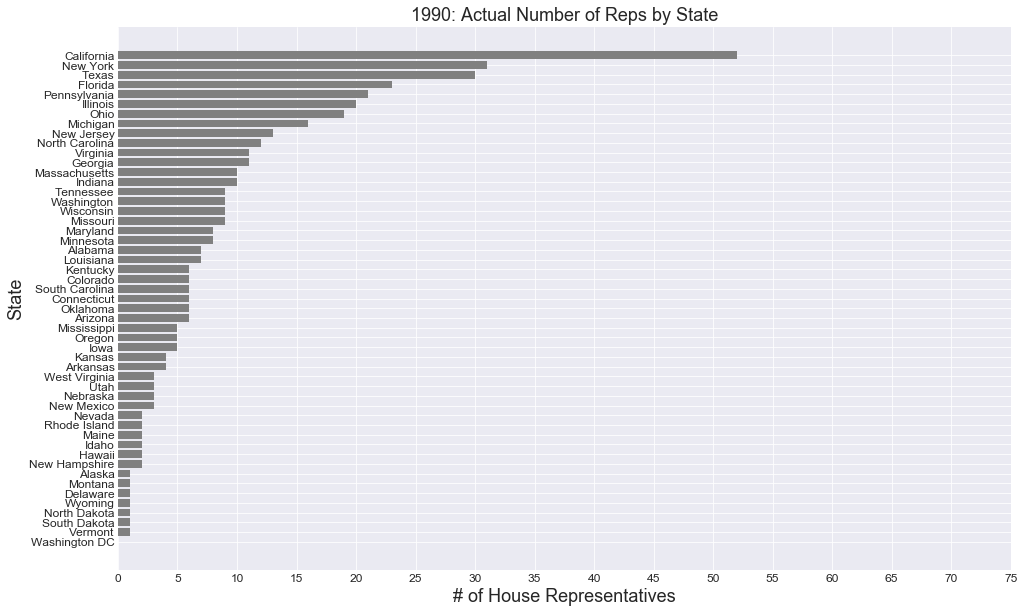

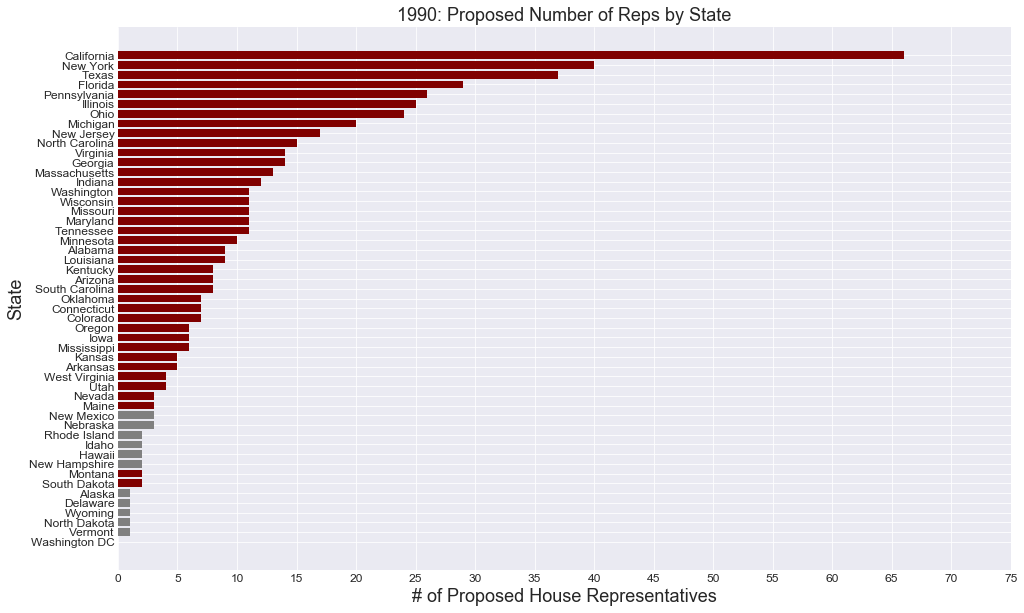

In [70]:
graphyear = 1990
graph_df = df1990.copy()

graph_df = graph_df.sort_values(by=['Reps'], ascending=[True])

color = []

for number in graph_df['Reps']:
    color.append('gray')

plt.figure(figsize=(16,10))
plt.barh(graph_df['State'], graph_df['Reps'], color=color)

# we also need to switch the labels
plt.xlabel('# of House Representatives', fontsize=18)
plt.ylabel('State', fontsize=18)
plt.title(f'{graphyear}: Actual Number of Reps by State', fontsize=18)

plt.yticks(fontsize=12)
plt.xticks(np.arange(0, 76, 5), fontsize=12)

# Save
plt.savefig(f'figs/RepsPerStatebyYear/{graphyear}reps_barhchart.png')

graph_df = graph_df.sort_values(by=['PropStReps'], ascending=[True])

flipcount = graph_df['PropFlip']
color = []

for number in flipcount:
    if number > 0:
        color.append('maroon')
    elif number < 0:
        color.append('black')
    else:
        color.append('gray')

plt.figure(figsize=(16,10))
plt.barh(graph_df['State'], graph_df['PropStReps'], color=color)

# we also need to switch the labels
plt.xlabel('# of Proposed House Representatives', fontsize=18)
plt.ylabel('State', fontsize=18)
plt.title(f'{graphyear}: Proposed Number of Reps by State', fontsize=18)

print('checkpoint1')

plt.yticks(fontsize=12)
plt.xticks(np.arange(0, 76, 5), fontsize=12)

print('checkpoint2')

# Save
plt.savefig(f'figs/RepsPerStatebyYear/{graphyear}propreps_barhchart.png')

checkpoint1
checkpoint2


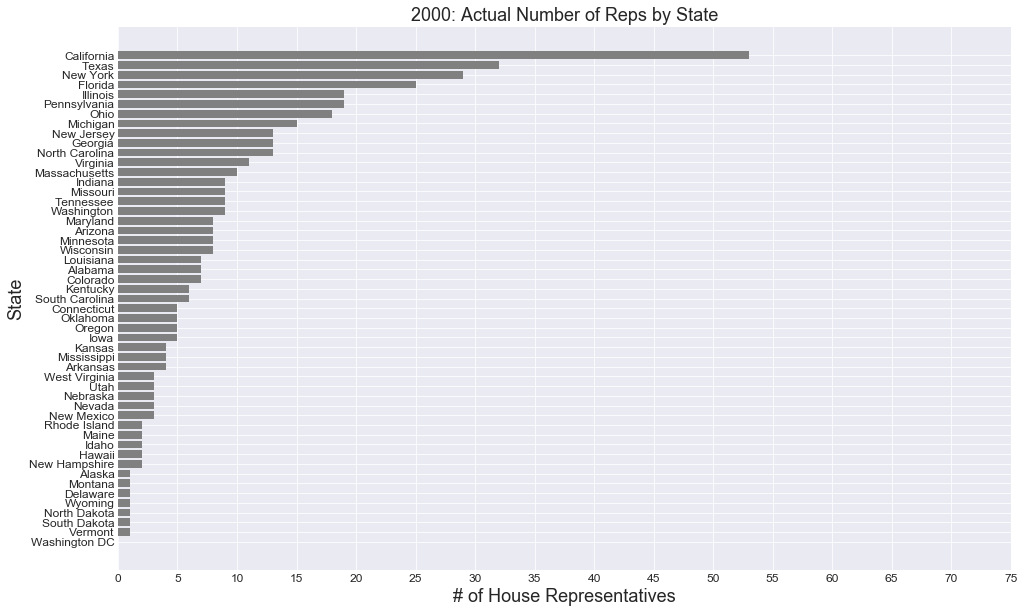

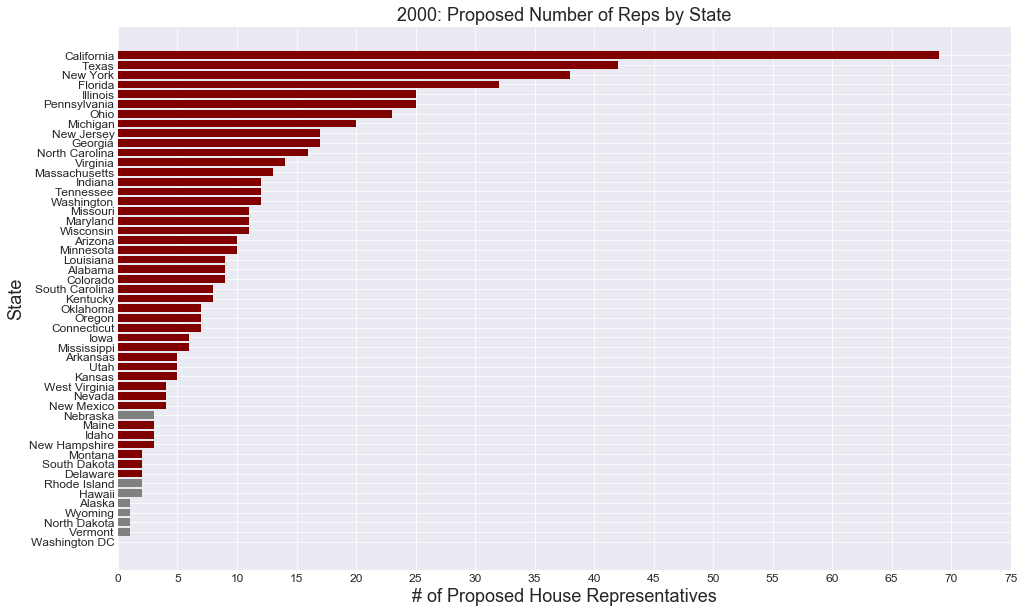

In [71]:
graphyear = 2000
graph_df = df2000.copy()

graph_df = graph_df.sort_values(by=['Reps'], ascending=[True])

color = []

for number in graph_df['Reps']:
    color.append('gray')

plt.figure(figsize=(16,10))
plt.barh(graph_df['State'], graph_df['Reps'], color=color)

# we also need to switch the labels
plt.xlabel('# of House Representatives', fontsize=18)
plt.ylabel('State', fontsize=18)
plt.title(f'{graphyear}: Actual Number of Reps by State', fontsize=18)

plt.yticks(fontsize=12)
plt.xticks(np.arange(0, 76, 5), fontsize=12)

# Save
plt.savefig(f'figs/RepsPerStatebyYear/{graphyear}reps_barhchart.png')

graph_df = graph_df.sort_values(by=['PropStReps'], ascending=[True])

flipcount = graph_df['PropFlip']
color = []

for number in flipcount:
    if number > 0:
        color.append('maroon')
    elif number < 0:
        color.append('black')
    else:
        color.append('gray')

plt.figure(figsize=(16,10))
plt.barh(graph_df['State'], graph_df['PropStReps'], color=color)

# we also need to switch the labels
plt.xlabel('# of Proposed House Representatives', fontsize=18)
plt.ylabel('State', fontsize=18)
plt.title(f'{graphyear}: Proposed Number of Reps by State', fontsize=18)

print('checkpoint1')

plt.yticks(fontsize=12)
plt.xticks(np.arange(0, 76, 5), fontsize=12)

print('checkpoint2')

# Save
plt.savefig(f'figs/RepsPerStatebyYear/{graphyear}propreps_barhchart.png')

checkpoint1
checkpoint2


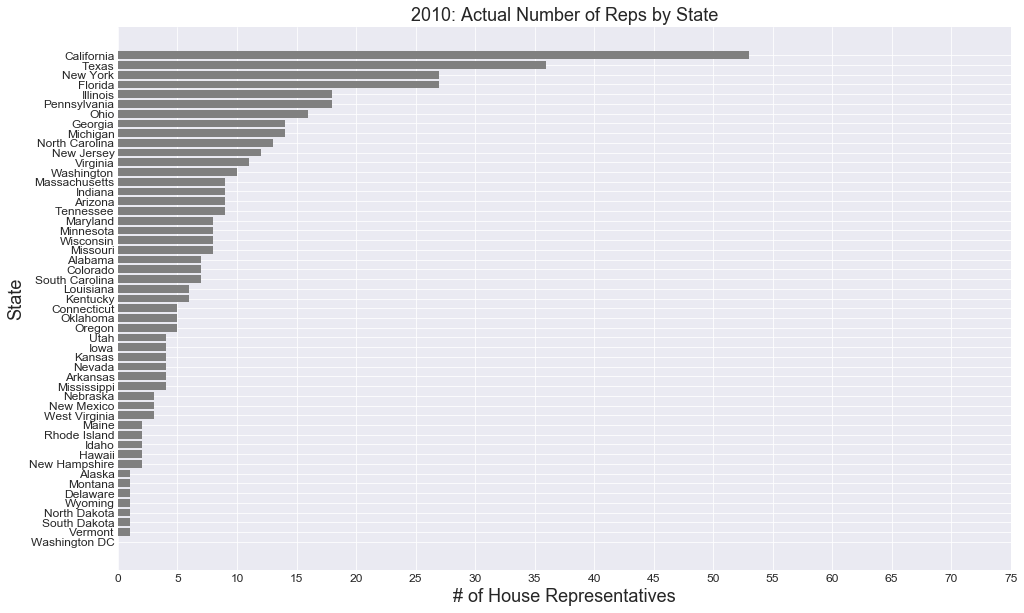

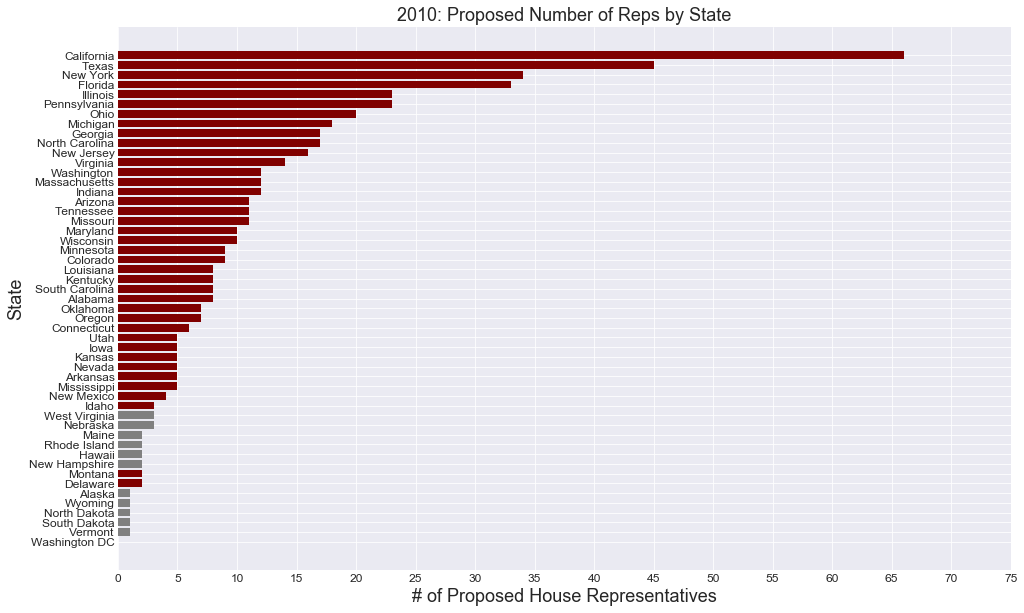

In [72]:
graphyear = 2010
graph_df = df2010.copy()

graph_df = graph_df.sort_values(by=['Reps'], ascending=[True])

color = []

for number in graph_df['Reps']:
    color.append('gray')

plt.figure(figsize=(16,10))
plt.barh(graph_df['State'], graph_df['Reps'], color=color)

# we also need to switch the labels
plt.xlabel('# of House Representatives', fontsize=18)
plt.ylabel('State', fontsize=18)
plt.title(f'{graphyear}: Actual Number of Reps by State', fontsize=18)

plt.yticks(fontsize=12)
plt.xticks(np.arange(0, 76, 5), fontsize=12)

# Save
plt.savefig(f'figs/RepsPerStatebyYear/{graphyear}reps_barhchart.png')

graph_df = graph_df.sort_values(by=['PropStReps'], ascending=[True])

flipcount = graph_df['PropFlip']
color = []

for number in flipcount:
    if number > 0:
        color.append('maroon')
    elif number < 0:
        color.append('black')
    else:
        color.append('gray')

plt.figure(figsize=(16,10))
plt.barh(graph_df['State'], graph_df['PropStReps'], color=color)

# we also need to switch the labels
plt.xlabel('# of Proposed House Representatives', fontsize=18)
plt.ylabel('State', fontsize=18)
plt.title(f'{graphyear}: Proposed Number of Reps by State', fontsize=18)

print('checkpoint1')

plt.yticks(fontsize=12)
plt.xticks(np.arange(0, 76, 5), fontsize=12)

print('checkpoint2')

# Save
plt.savefig(f'figs/RepsPerStatebyYear/{graphyear}propreps_barhchart.png')

checkpoint1
checkpoint1
checkpoint2
checkpoint2


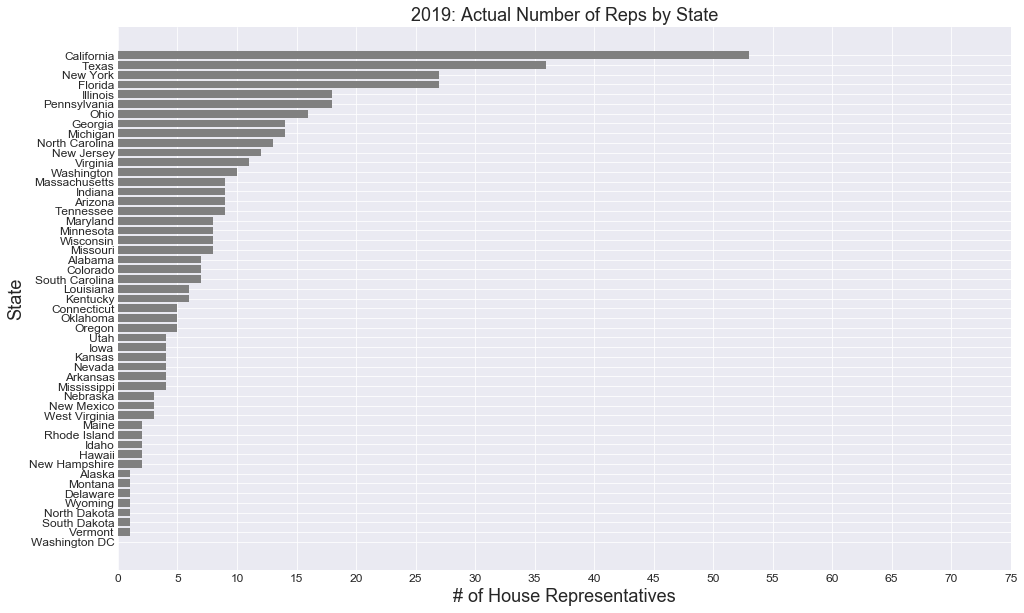

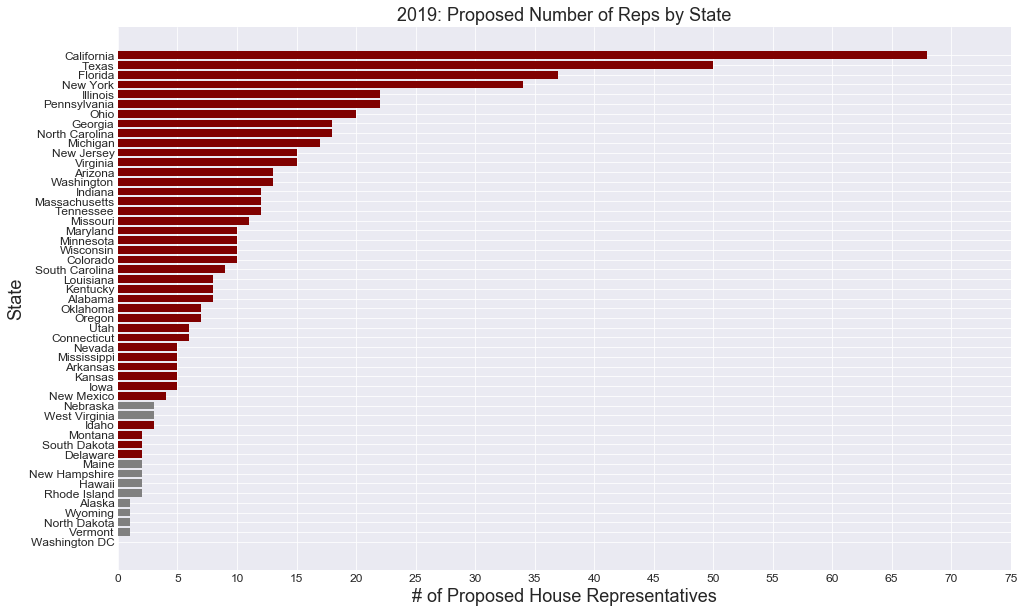

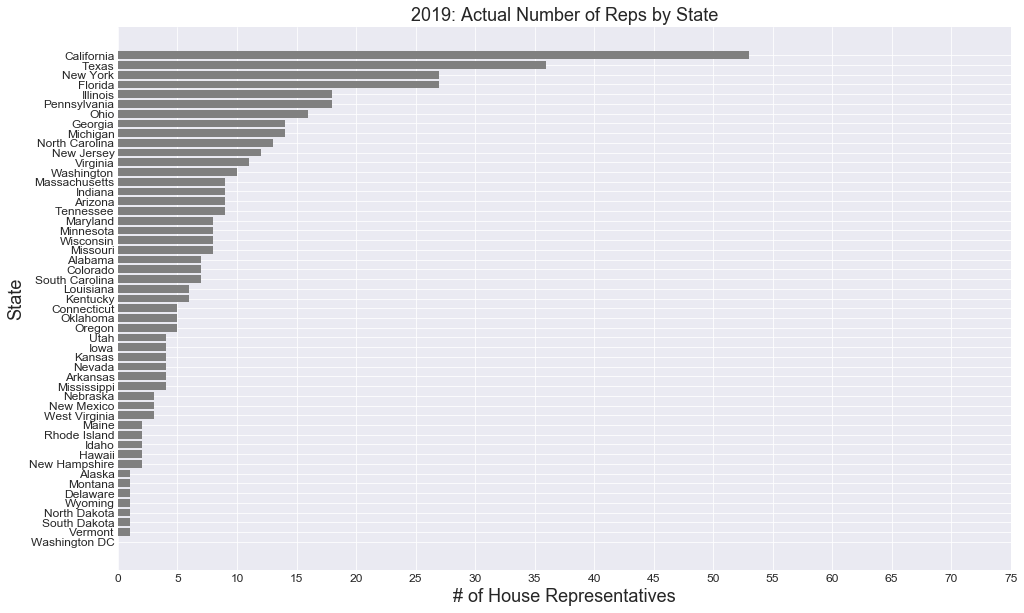

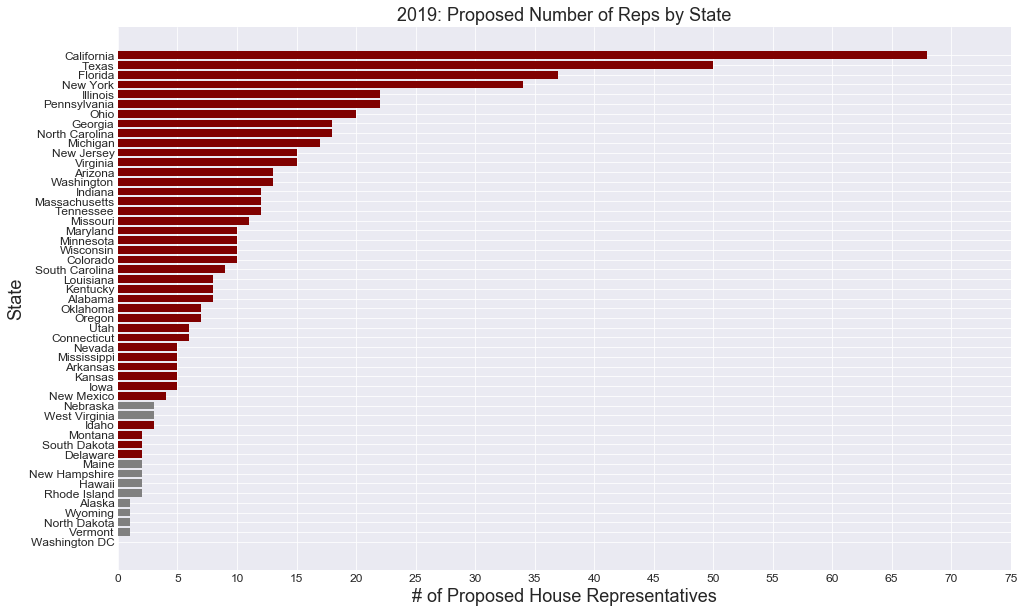

In [73]:
graphyear = 2019
graph_df = df2019.copy()

graph_df = graph_df.sort_values(by=['Reps'], ascending=[True])

color = []

for number in graph_df['Reps']:
    color.append('gray')

plt.figure(figsize=(16,10))
plt.barh(graph_df['State'], graph_df['Reps'], color=color)

# we also need to switch the labels
plt.xlabel('# of House Representatives', fontsize=18)
plt.ylabel('State', fontsize=18)
plt.title(f'{graphyear}: Actual Number of Reps by State', fontsize=18)

plt.yticks(fontsize=12)
plt.xticks(np.arange(0, 76, 5), fontsize=12)

# Save
plt.savefig(f'figs/RepsPerStatebyYear/{graphyear}reps_barhchart.png')

graph_df = graph_df.sort_values(by=['PropStReps'], ascending=[True])

flipcount = graph_df['PropFlip']
color = []

for number in flipcount:
    if number > 0:
        color.append('maroon')
    elif number < 0:
        color.append('black')
    else:
        color.append('gray')

plt.figure(figsize=(16,10))
plt.barh(graph_df['State'], graph_df['PropStReps'], color=color)

# we also need to switch the labels
plt.xlabel('# of Proposed House Representatives', fontsize=18)
plt.ylabel('State', fontsize=18)
plt.title(f'{graphyear}: Proposed Number of Reps by State', fontsize=18)

print('checkpoint1')

plt.yticks(fontsize=12)
plt.xticks(np.arange(0, 76, 5), fontsize=12)

graphyear = 2019
graph_df = df2019.copy()

graph_df = graph_df.sort_values(by=['Reps'], ascending=[True])

color = []

for number in graph_df['Reps']:
    color.append('gray')

plt.figure(figsize=(16,10))
plt.barh(graph_df['State'], graph_df['Reps'], color=color)

# we also need to switch the labels
plt.xlabel('# of House Representatives', fontsize=18)
plt.ylabel('State', fontsize=18)
plt.title(f'{graphyear}: Actual Number of Reps by State', fontsize=18)

plt.yticks(fontsize=12)
plt.xticks(np.arange(0, 76, 5), fontsize=12)

# Save
plt.savefig(f'figs/RepsPerStatebyYear/{graphyear}reps_barhchart.png')

graph_df = graph_df.sort_values(by=['PropStReps'], ascending=[True])

flipcount = graph_df['PropFlip']
color = []

for number in flipcount:
    if number > 0:
        color.append('maroon')
    elif number < 0:
        color.append('black')
    else:
        color.append('gray')

plt.figure(figsize=(16,10))
plt.barh(graph_df['State'], graph_df['PropStReps'], color=color)

# we also need to switch the labels
plt.xlabel('# of Proposed House Representatives', fontsize=18)
plt.ylabel('State', fontsize=18)
plt.title(f'{graphyear}: Proposed Number of Reps by State', fontsize=18)

print('checkpoint1')

plt.yticks(fontsize=12)
plt.xticks(np.arange(0, 76, 5), fontsize=12)

print('checkpoint2')

# Save
plt.savefig(f'figs/RepsPerStatebyYear/{graphyear}propreps_barhchart.png')

print('checkpoint2')

# Save
plt.savefig(f'figs/RepsPerStatebyYear/{graphyear}propreps_barhchart.png')

### Plot the minimum national population value that warrants one House Representative for each year (current and proposed), and the maximum population value anywhere in the U.S. represented by one House Representative for each year (current and proposed)

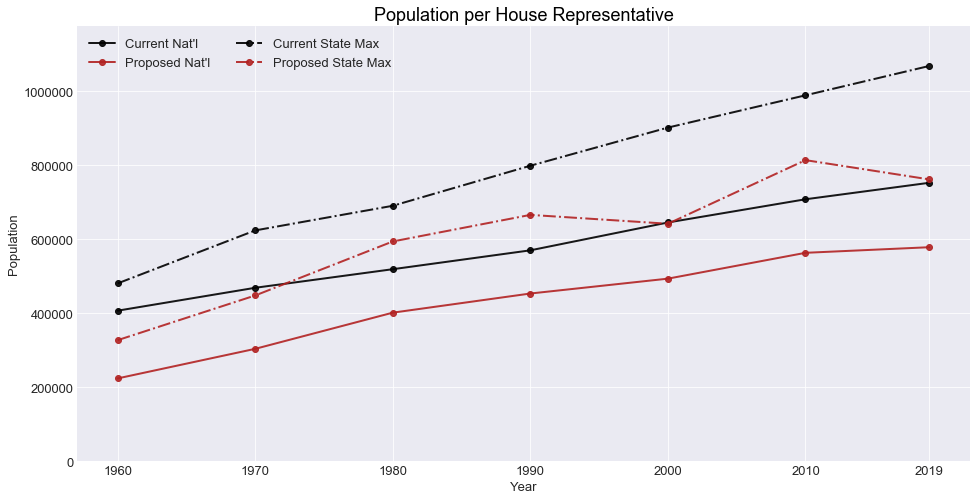

In [74]:
graph_df = ca_df.copy()

maxstatepop = [max(df1960['RepPerPop']), max(df1970['RepPerPop']), max(df1980['RepPerPop']), max(df1990['RepPerPop']), max(df2000['RepPerPop']), max(df2010['RepPerPop']), max(df2019['RepPerPop'])]
propmaxstatepop = [max(df1960['PropRepPerPop']), max(df1970['PropRepPerPop']), max(df1980['PropRepPerPop']), max(df1990['PropRepPerPop']), max(df2000['PropRepPerPop']), max(df2010['PropRepPerPop']), max(df2019['PropRepPerPop'])]

# style
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(16,8))

# create a color palette
palette = plt.get_cmap('Set1')

linestyles = ['-', '--', '-.', ':']

# multiple line plot
plt.plot(graph_df['Year'], graph_df['NatlPopPerRep'], linestyle=linestyles[0], marker='o', color='black', linewidth=2, alpha=0.9, label="Current Nat'l")
plt.plot(graph_df['Year'], graph_df['PropNatlPopPerRep'], linestyle=linestyles[0], marker='o', color='#b22222', linewidth=2, alpha=0.9, label="Proposed Nat'l")
plt.plot(graph_df['Year'], maxstatepop, linestyle=linestyles[2], marker='o', color='black', linewidth=2, alpha=0.9, label="Current State Max")
plt.plot(graph_df['Year'], propmaxstatepop, linestyle=linestyles[2], marker='o', color='#b22222', linewidth=2, alpha=0.9, label="Proposed State Max")

# Add legend
plt.legend(loc=2, ncol=2, fontsize=13)
plt.ylim(0, max(maxstatepop)*1.10)
plt.xticks(graph_df['Year'], fontsize=13)
plt.yticks(fontsize=13)

# Add titles
plt.title(f"Population per House Representative", loc='center', fontsize=18, fontweight=0, color='black')
plt.xlabel("Year", fontsize=13)
plt.ylabel("Population", fontsize=13)

# Save
plt.savefig(f'figs/NatlAverages/popperrep_propandcurrent.png')

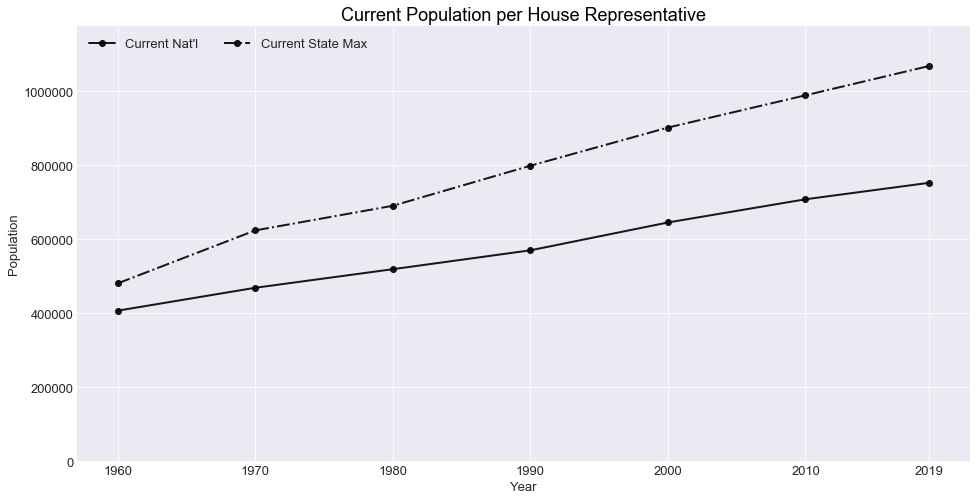

In [75]:
graph_df = ca_df.copy()

maxstatepop = [max(df1960['RepPerPop']), max(df1970['RepPerPop']), max(df1980['RepPerPop']), max(df1990['RepPerPop']), max(df2000['RepPerPop']), max(df2010['RepPerPop']), max(df2019['RepPerPop'])]
propmaxstatepop = [max(df1960['PropRepPerPop']), max(df1970['PropRepPerPop']), max(df1980['PropRepPerPop']), max(df1990['PropRepPerPop']), max(df2000['PropRepPerPop']), max(df2010['PropRepPerPop']), max(df2019['PropRepPerPop'])]

# style
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(16,8))

# create a color palette
palette = plt.get_cmap('Set1')

linestyles = ['-', '--', '-.', ':']

# multiple line plot
plt.plot(graph_df['Year'], graph_df['NatlPopPerRep'], linestyle=linestyles[0], marker='o', color='black', linewidth=2, alpha=0.9, label="Current Nat'l")
plt.plot(graph_df['Year'], maxstatepop, linestyle=linestyles[2], marker='o', color='black', linewidth=2, alpha=0.9, label="Current State Max")

# Add legend
plt.legend(loc=2, ncol=2, fontsize=13)
plt.ylim(0, max(maxstatepop)*1.10)
plt.xticks(graph_df['Year'], fontsize=13)
plt.yticks(fontsize=13)

# Add titles
plt.title(f"Current Population per House Representative", loc='center', fontsize=18, fontweight=0, color='black')
plt.xlabel("Year", fontsize=13)
plt.ylabel("Population", fontsize=13)

# Save
plt.savefig(f'figs/NatlAverages/popperrep_current.png')

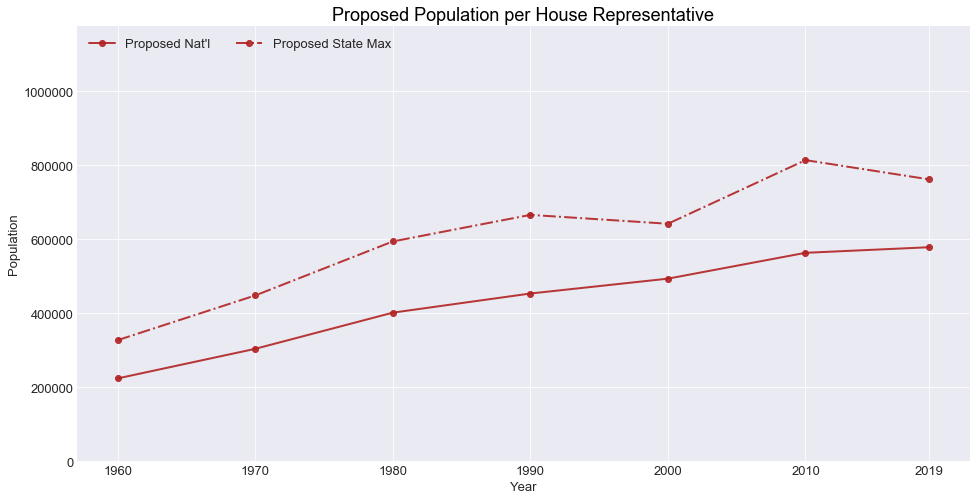

In [76]:
graph_df = ca_df.copy()

maxstatepop = [max(df1960['RepPerPop']), max(df1970['RepPerPop']), max(df1980['RepPerPop']), max(df1990['RepPerPop']), max(df2000['RepPerPop']), max(df2010['RepPerPop']), max(df2019['RepPerPop'])]
propmaxstatepop = [max(df1960['PropRepPerPop']), max(df1970['PropRepPerPop']), max(df1980['PropRepPerPop']), max(df1990['PropRepPerPop']), max(df2000['PropRepPerPop']), max(df2010['PropRepPerPop']), max(df2019['PropRepPerPop'])]

# style
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(16,8))

# create a color palette
palette = plt.get_cmap('Set1')

linestyles = ['-', '--', '-.', ':']

# multiple line plot
plt.plot(graph_df['Year'], graph_df['PropNatlPopPerRep'], linestyle=linestyles[0], marker='o', color='#b22222', linewidth=2, alpha=0.9, label="Proposed Nat'l")
plt.plot(graph_df['Year'], propmaxstatepop, linestyle=linestyles[2], marker='o', color='#b22222', linewidth=2, alpha=0.9, label="Proposed State Max")

# Add legend
plt.legend(loc=2, ncol=2, fontsize=13)
plt.ylim(0, max(maxstatepop)*1.10)
plt.xticks(graph_df['Year'], fontsize=13)
plt.yticks(fontsize=13)

# Add titles
plt.title(f"Proposed Population per House Representative", loc='center', fontsize=18, fontweight=0, color='black')
plt.xlabel("Year", fontsize=13)
plt.ylabel("Population", fontsize=13)

# Save
plt.savefig(f'figs/NatlAverages/popperrep_prop.png')

### Plot the difference between the minimum and maximum poluation values represented by one House Representative for each year, proposed and current. The ideal difference is zero (0).

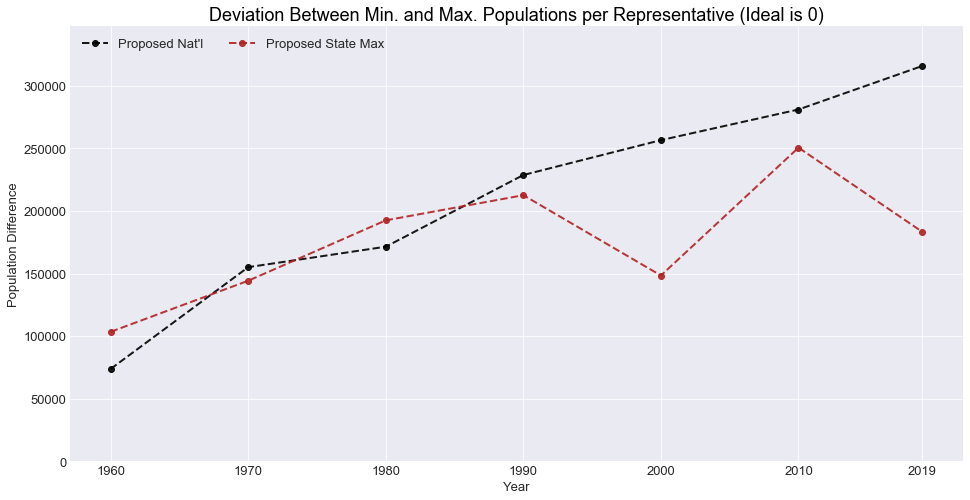

In [77]:
graph_df = ca_df.copy()

popperrepdev = [max(df1960['RepPerPop'])-max(df1960['NatlPopPerRep']), 
                max(df1970['RepPerPop'])-max(df1970['NatlPopPerRep']), 
                max(df1980['RepPerPop'])-max(df1980['NatlPopPerRep']), 
                max(df1990['RepPerPop'])-max(df1990['NatlPopPerRep']), 
                max(df2000['RepPerPop'])-max(df2000['NatlPopPerRep']), 
                max(df2010['RepPerPop'])-max(df2010['NatlPopPerRep']), 
                max(df2019['RepPerPop'])-max(df2019['NatlPopPerRep'])]
proppopperrepdev = [max(df1960['PropRepPerPop'])-max(df1960['PropNatlPopPerRep']), 
                    max(df1970['PropRepPerPop'])-max(df1970['PropNatlPopPerRep']), 
                    max(df1980['PropRepPerPop'])-max(df1980['PropNatlPopPerRep']), 
                    max(df1990['PropRepPerPop'])-max(df1990['PropNatlPopPerRep']), 
                    max(df2000['PropRepPerPop'])-max(df2000['PropNatlPopPerRep']), 
                    max(df2010['PropRepPerPop'])-max(df2010['PropNatlPopPerRep']), 
                    max(df2019['PropRepPerPop'])-max(df2019['PropNatlPopPerRep'])]

# style
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(16,8))

# create a color palette
palette = plt.get_cmap('Set1')

linestyles = ['-', '--', '-.', ':']

# multiple line plot
plt.plot(graph_df['Year'], popperrepdev, linestyle=linestyles[1], marker='o', color='black', linewidth=2, alpha=0.9, label="Proposed Nat'l")
plt.plot(graph_df['Year'], proppopperrepdev, linestyle=linestyles[1], marker='o', color='#b22222', linewidth=2, alpha=0.9, label="Proposed State Max")

# Add legend
plt.legend(loc=2, ncol=2, fontsize=13)
plt.ylim(0, max(popperrepdev)*1.10)
plt.xticks(graph_df['Year'], fontsize=13)
plt.yticks(fontsize=13)

# Add titles
plt.title(f"Deviation Between Min. and Max. Populations per Representative (Ideal is 0)", loc='center', fontsize=18, fontweight=0, color='black')
plt.xlabel("Year", fontsize=13)
plt.ylabel("Population Difference", fontsize=13)

# Save
plt.savefig(f'figs/NatlAverages/popperrep_deviation_propandcurrent.png')

# Presidential Data

In [78]:
EC1960 = pd.read_csv('raw_data/EC1960.csv')
EC1964 = pd.read_csv('raw_data/EC1964.csv')
EC1968 = pd.read_csv('raw_data/EC1968.csv')
EC1972 = pd.read_csv('raw_data/EC1972.csv')
EC1976 = pd.read_csv('raw_data/EC1976.csv')
EC1980 = pd.read_csv('raw_data/EC1980.csv')
EC1984 = pd.read_csv('raw_data/EC1984.csv')
EC1988 = pd.read_csv('raw_data/EC1988.csv')
EC1992 = pd.read_csv('raw_data/EC1992.csv')
EC1996 = pd.read_csv('raw_data/EC1996.csv')
EC2000 = pd.read_csv('raw_data/EC2000.csv')
EC2004 = pd.read_csv('raw_data/EC2004.csv')
EC2008 = pd.read_csv('raw_data/EC2008.csv')
EC2012 = pd.read_csv('raw_data/EC2012.csv')
EC2016 = pd.read_csv('raw_data/EC2016.csv')
EC2020 = pd.read_csv('raw_data/EC2020.csv')

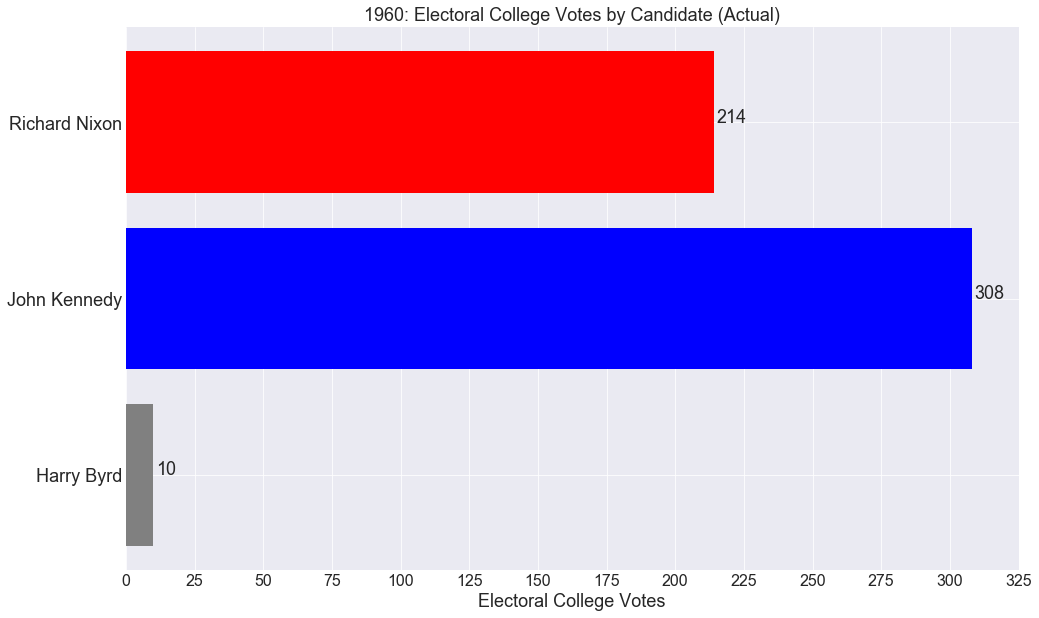

In [145]:
# Create tally for each Candidate

loopdf = EC1960.copy()

candidates = []
parties = []
districtwins = []
electorcount = []
color = []
graphyear = int(loopdf['Year'].mean())

for candidate in loopdf['Candidate'].unique():
    if candidate == '-':
        pass
    else:
        candidates.append(candidate)
        
for party in loopdf['Party'].unique():
    parties.append(party)
    if party == 'D':
        color.append('blue')
    elif party == 'R':
        color.append('red')
    else:
        color.append('gray')

for candidate in candidates:
    df = loopdf[loopdf['Candidate'] == candidate]
    districtwins.append(len(df['State'].unique()))
    electorcount.append(df['Delegates'].sum())

plt.figure(figsize=(16,10))
plt.barh(candidates, electorcount, color=color)

# we also need to switch the labels
plt.xlabel('Electoral College Votes', fontsize=18)
plt.title(f'{graphyear}: Electoral College Votes by Candidate (Actual)', fontsize=18)

plt.yticks(fontsize=18)
plt.xticks(np.arange(0, max(electorcount)*1.10, 25), fontsize=16)

for index,data in enumerate(electorcount):
    plt.text(y=index , x=data+1 , s=f"{data}" , fontdict=dict(fontsize=18))

# Save
plt.savefig(f'figs/EC/{graphyear}ActualResults.png')

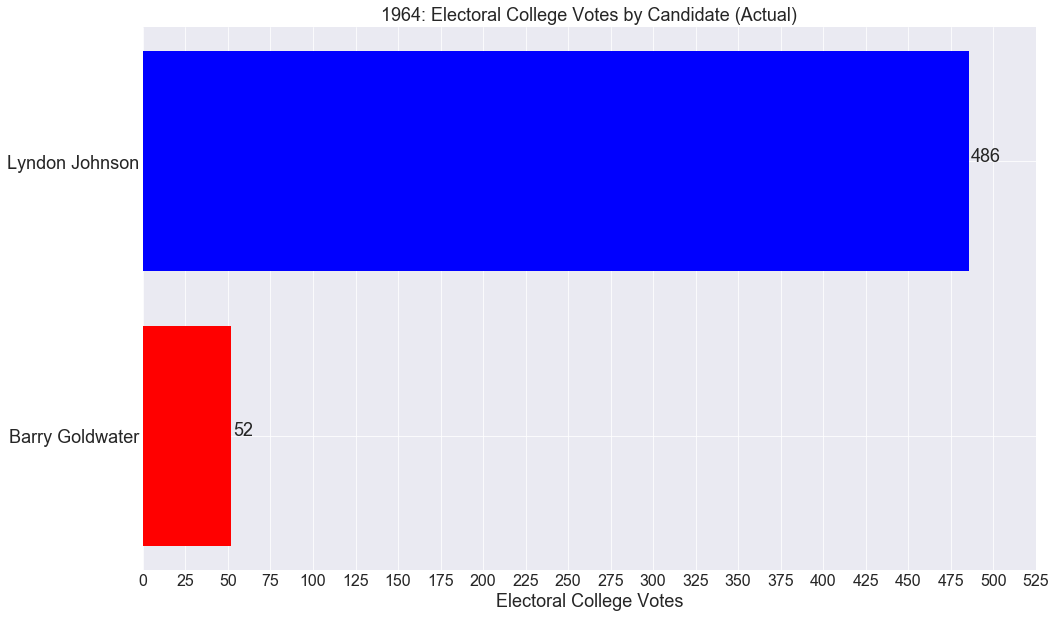

In [144]:
# Create tally for each Candidate

loopdf = EC1964.copy()

candidates = []
parties = []
districtwins = []
electorcount = []
color = []
graphyear = int(loopdf['Year'].mean())

for candidate in loopdf['Candidate'].unique():
    if candidate == '-':
        pass
    else:
        candidates.append(candidate)
        
for party in loopdf['Party'].unique():
    parties.append(party)
    if party == 'D':
        color.append('blue')
    elif party == 'R':
        color.append('red')
    else:
        color.append('gray')

for candidate in candidates:
    df = loopdf[loopdf['Candidate'] == candidate]
    districtwins.append(len(df['State'].unique()))
    electorcount.append(df['Delegates'].sum())

plt.figure(figsize=(16,10))
plt.barh(candidates, electorcount, color=color)

# we also need to switch the labels
plt.xlabel('Electoral College Votes', fontsize=18)
plt.title(f'{graphyear}: Electoral College Votes by Candidate (Actual)', fontsize=18)

plt.yticks(fontsize=18)
plt.xticks(np.arange(0, max(electorcount)*1.10, 25), fontsize=16)

for index,data in enumerate(electorcount):
    plt.text(y=index , x=data+1 , s=f"{data}" , fontdict=dict(fontsize=18))

# Save
plt.savefig(f'figs/EC/{graphyear}ActualResults.png')

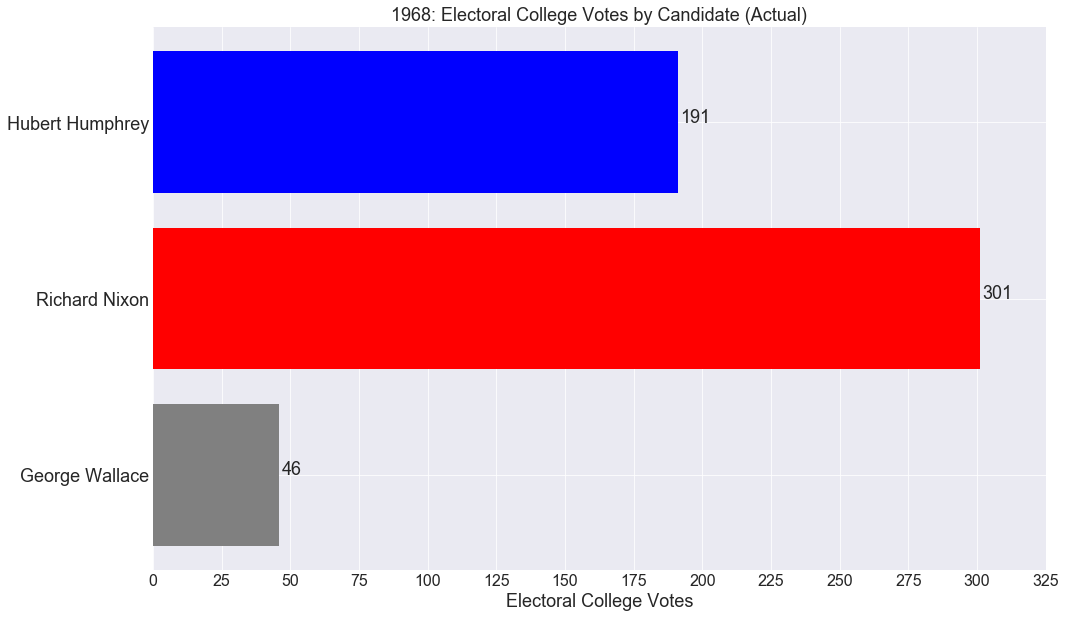

In [143]:
# Create tally for each Candidate

loopdf = EC1968.copy()

candidates = []
parties = []
districtwins = []
electorcount = []
color = []
graphyear = int(loopdf['Year'].mean())

for candidate in loopdf['Candidate'].unique():
    if candidate == '-':
        pass
    else:
        candidates.append(candidate)
        
for party in loopdf['Party'].unique():
    parties.append(party)
    if party == 'D':
        color.append('blue')
    elif party == 'R':
        color.append('red')
    else:
        color.append('gray')

for candidate in candidates:
    df = loopdf[loopdf['Candidate'] == candidate]
    districtwins.append(len(df['State'].unique()))
    electorcount.append(df['Delegates'].sum())

plt.figure(figsize=(16,10))
plt.barh(candidates, electorcount, color=color)

# we also need to switch the labels
plt.xlabel('Electoral College Votes', fontsize=18)
plt.title(f'{graphyear}: Electoral College Votes by Candidate (Actual)', fontsize=18)

plt.yticks(fontsize=18)
plt.xticks(np.arange(0, max(electorcount)*1.10, 25), fontsize=16)

for index,data in enumerate(electorcount):
    plt.text(y=index , x=data+1 , s=f"{data}" , fontdict=dict(fontsize=18))

# Save
plt.savefig(f'figs/EC/{graphyear}ActualResults.png')

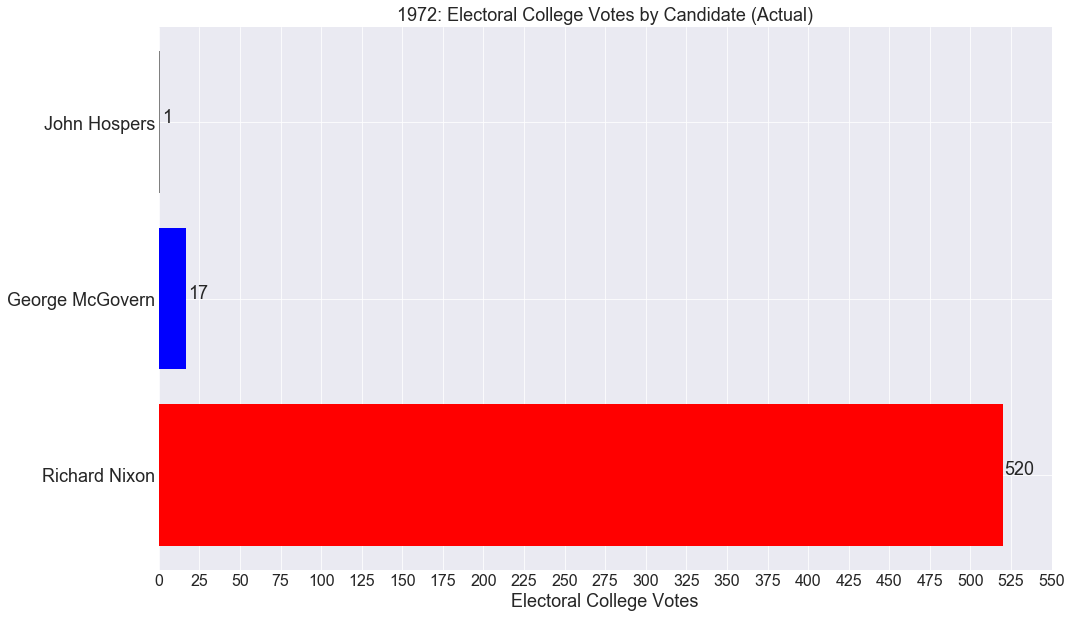

In [142]:
# Create tally for each Candidate

loopdf = EC1972.copy()

candidates = []
parties = []
districtwins = []
electorcount = []
color = []
graphyear = int(loopdf['Year'].mean())

for candidate in loopdf['Candidate'].unique():
    if candidate == '-':
        pass
    else:
        candidates.append(candidate)
        
for party in loopdf['Party'].unique():
    parties.append(party)
    if party == 'D':
        color.append('blue')
    elif party == 'R':
        color.append('red')
    else:
        color.append('gray')

for candidate in candidates:
    df = loopdf[loopdf['Candidate'] == candidate]
    districtwins.append(len(df['State'].unique()))
    electorcount.append(df['Delegates'].sum())

plt.figure(figsize=(16,10))
plt.barh(candidates, electorcount, color=color)

# we also need to switch the labels
plt.xlabel('Electoral College Votes', fontsize=18)
plt.title(f'{graphyear}: Electoral College Votes by Candidate (Actual)', fontsize=18)

plt.yticks(fontsize=18)
plt.xticks(np.arange(0, max(electorcount)*1.10, 25), fontsize=16)

for index,data in enumerate(electorcount):
    plt.text(y=index , x=data+1 , s=f"{data}" , fontdict=dict(fontsize=18))

# Save
plt.savefig(f'figs/EC/{graphyear}ActualResults.png')

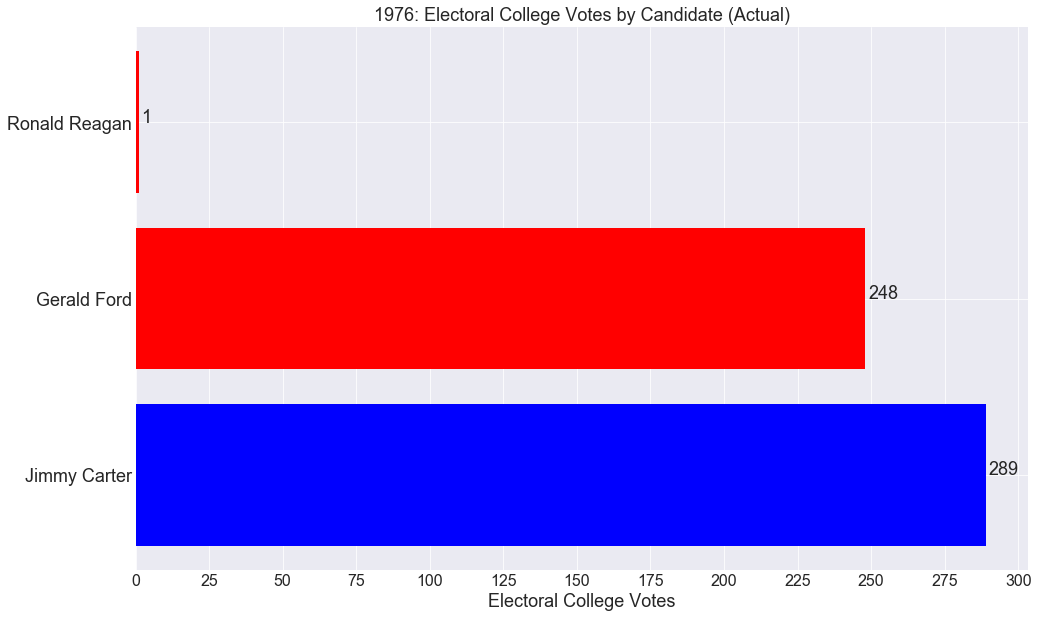

In [141]:
# Create tally for each Candidate

loopdf = EC1976.copy()

candidates = []
parties = []
districtwins = []
electorcount = []
color = []
graphyear = int(loopdf['Year'].mean())

for candidate in loopdf['Candidate'].unique():
    if candidate == '-':
        pass
    else:
        candidates.append(candidate)
        
for party in loopdf['Party'].unique():
    parties.append(party)
    if party == 'D':
        color.append('blue')
    elif party == 'R':
        color.append('red')
    else:
        color.append('gray')

for candidate in candidates:
    df = loopdf[loopdf['Candidate'] == candidate]
    districtwins.append(len(df['State'].unique()))
    electorcount.append(df['Delegates'].sum())

plt.figure(figsize=(16,10))
plt.barh(candidates, electorcount, color=['blue', 'red', 'red'])

# we also need to switch the labels
plt.xlabel('Electoral College Votes', fontsize=18)
plt.title(f'{graphyear}: Electoral College Votes by Candidate (Actual)', fontsize=18)

plt.yticks(fontsize=18)
plt.xticks(np.arange(0, max(electorcount)*1.10, 25), fontsize=16)

for index,data in enumerate(electorcount):
    plt.text(y=index , x=data+1 , s=f"{data}" , fontdict=dict(fontsize=18))

# Save
plt.savefig(f'figs/EC/{graphyear}ActualResults.png')

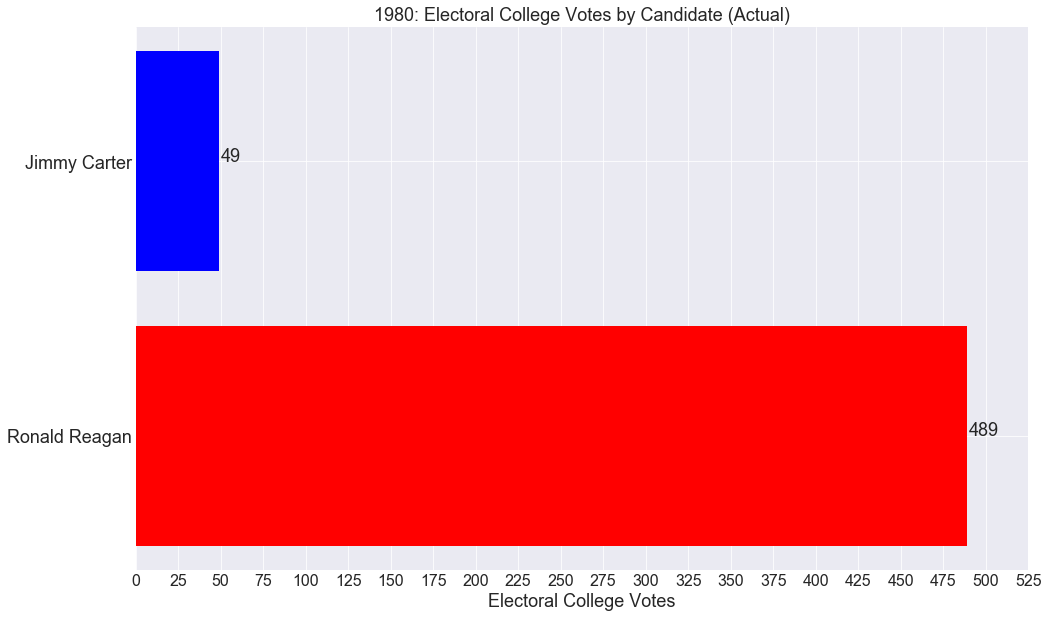

In [140]:
# Create tally for each Candidate

loopdf = EC1980.copy()

candidates = []
parties = []
districtwins = []
electorcount = []
color = []
graphyear = int(loopdf['Year'].mean())

for candidate in loopdf['Candidate'].unique():
    if candidate == '-':
        pass
    else:
        candidates.append(candidate)
        
for party in loopdf['Party'].unique():
    parties.append(party)
    if party == 'D':
        color.append('blue')
    elif party == 'R':
        color.append('red')
    else:
        color.append('gray')

for candidate in candidates:
    df = loopdf[loopdf['Candidate'] == candidate]
    districtwins.append(len(df['State'].unique()))
    electorcount.append(df['Delegates'].sum())

plt.figure(figsize=(16,10))
plt.barh(candidates, electorcount, color=color)

# we also need to switch the labels
plt.xlabel('Electoral College Votes', fontsize=18)
plt.title(f'{graphyear}: Electoral College Votes by Candidate (Actual)', fontsize=18)

plt.yticks(fontsize=18)
plt.xticks(np.arange(0, max(electorcount)*1.10, 25), fontsize=16)

for index,data in enumerate(electorcount):
    plt.text(y=index , x=data+1 , s=f"{data}" , fontdict=dict(fontsize=18))

# Save
plt.savefig(f'figs/EC/{graphyear}ActualResults.png')

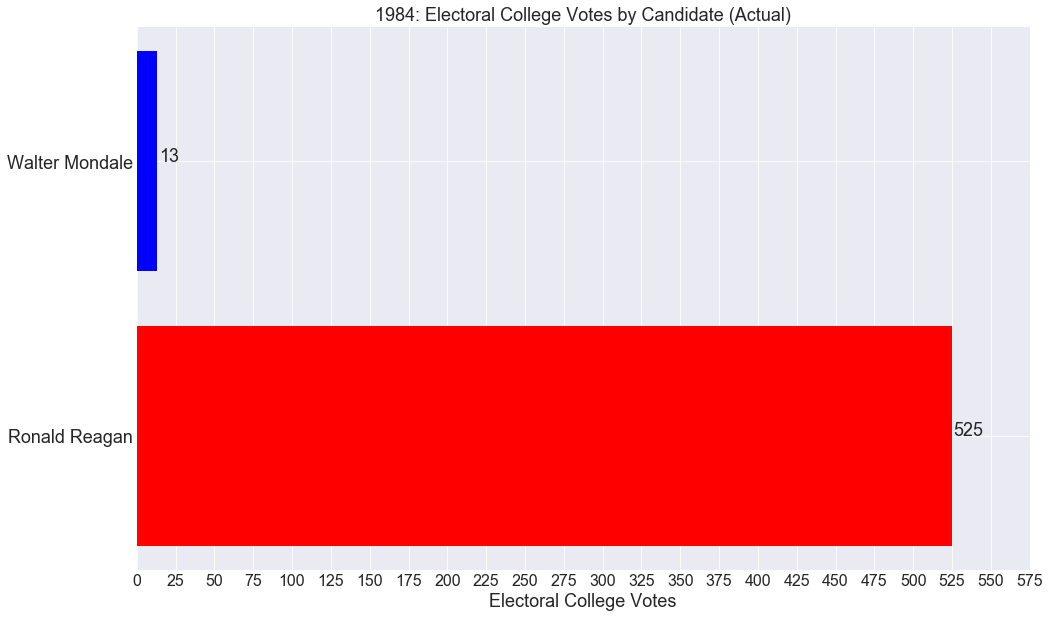

In [139]:
# Create tally for each Candidate

loopdf = EC1984.copy()

candidates = []
parties = []
districtwins = []
electorcount = []
color = []
graphyear = int(loopdf['Year'].mean())

for candidate in loopdf['Candidate'].unique():
    if candidate == '-':
        pass
    else:
        candidates.append(candidate)
        
for party in loopdf['Party'].unique():
    parties.append(party)
    if party == 'D':
        color.append('blue')
    elif party == 'R':
        color.append('red')
    else:
        color.append('gray')

for candidate in candidates:
    df = loopdf[loopdf['Candidate'] == candidate]
    districtwins.append(len(df['State'].unique()))
    electorcount.append(df['Delegates'].sum())

plt.figure(figsize=(16,10))
plt.barh(candidates, electorcount, color=color)

# we also need to switch the labels
plt.xlabel('Electoral College Votes', fontsize=18)
plt.title(f'{graphyear}: Electoral College Votes by Candidate (Actual)', fontsize=18)

plt.yticks(fontsize=18)
plt.xticks(np.arange(0, max(electorcount)*1.10, 25), fontsize=16)

for index,data in enumerate(electorcount):
    plt.text(y=index , x=data+1 , s=f"{data}" , fontdict=dict(fontsize=18))

# Save
plt.savefig(f'figs/EC/{graphyear}ActualResults.png')

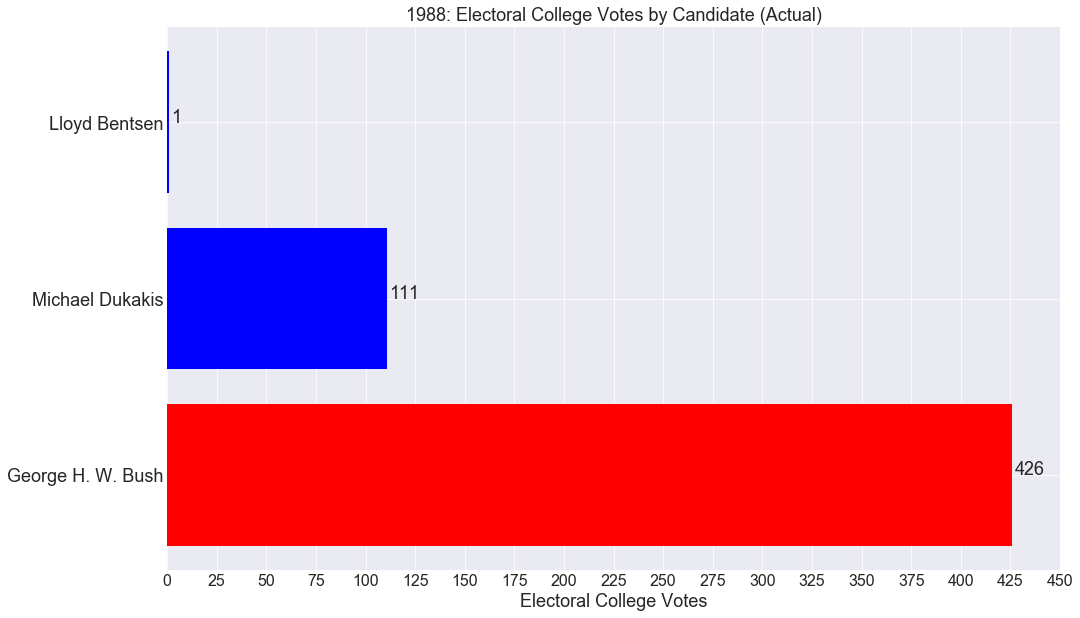

In [138]:
# Create tally for each Candidate

loopdf = EC1988.copy()

candidates = []
parties = []
districtwins = []
electorcount = []
color = []
graphyear = int(loopdf['Year'].mean())

for candidate in loopdf['Candidate'].unique():
    if candidate == '-':
        pass
    else:
        candidates.append(candidate)
        
for party in loopdf['Party'].unique():
    parties.append(party)
    if party == 'D':
        color.append('blue')
    elif party == 'R':
        color.append('red')
    else:
        color.append('gray')

for candidate in candidates:
    df = loopdf[loopdf['Candidate'] == candidate]
    districtwins.append(len(df['State'].unique()))
    electorcount.append(df['Delegates'].sum())

plt.figure(figsize=(16,10))
plt.barh(candidates, electorcount, color=['red', 'blue','blue'])

# we also need to switch the labels
plt.xlabel('Electoral College Votes', fontsize=18)
plt.title(f'{graphyear}: Electoral College Votes by Candidate (Actual)', fontsize=18)

plt.yticks(fontsize=18)
plt.xticks(np.arange(0, max(electorcount)*1.10, 25), fontsize=16)

for index,data in enumerate(electorcount):
    plt.text(y=index , x=data+1 , s=f"{data}" , fontdict=dict(fontsize=18))

# Save
plt.savefig(f'figs/EC/{graphyear}ActualResults.png')

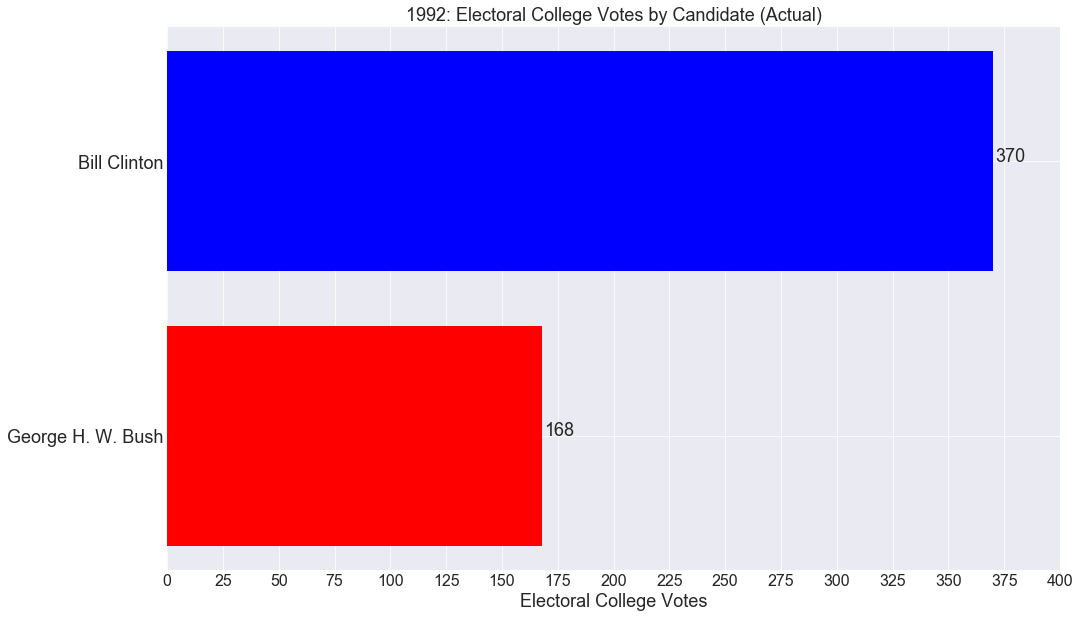

In [137]:
# Create tally for each Candidate

loopdf = EC1992.copy()

candidates = []
parties = []
districtwins = []
electorcount = []
color = []
graphyear = int(loopdf['Year'].mean())

for candidate in loopdf['Candidate'].unique():
    if candidate == '-':
        pass
    else:
        candidates.append(candidate)
        
for party in loopdf['Party'].unique():
    parties.append(party)
    if party == 'D':
        color.append('blue')
    elif party == 'R':
        color.append('red')
    else:
        color.append('gray')

for candidate in candidates:
    df = loopdf[loopdf['Candidate'] == candidate]
    districtwins.append(len(df['State'].unique()))
    electorcount.append(df['Delegates'].sum())

plt.figure(figsize=(16,10))
plt.barh(candidates, electorcount, color=color)

# we also need to switch the labels
plt.xlabel('Electoral College Votes', fontsize=18)
plt.title(f'{graphyear}: Electoral College Votes by Candidate (Actual)', fontsize=18)

plt.yticks(fontsize=18)
plt.xticks(np.arange(0, max(electorcount)*1.10, 25), fontsize=16)

for index,data in enumerate(electorcount):
    plt.text(y=index , x=data+1 , s=f"{data}" , fontdict=dict(fontsize=18))

# Save
plt.savefig(f'figs/EC/{graphyear}ActualResults.png')

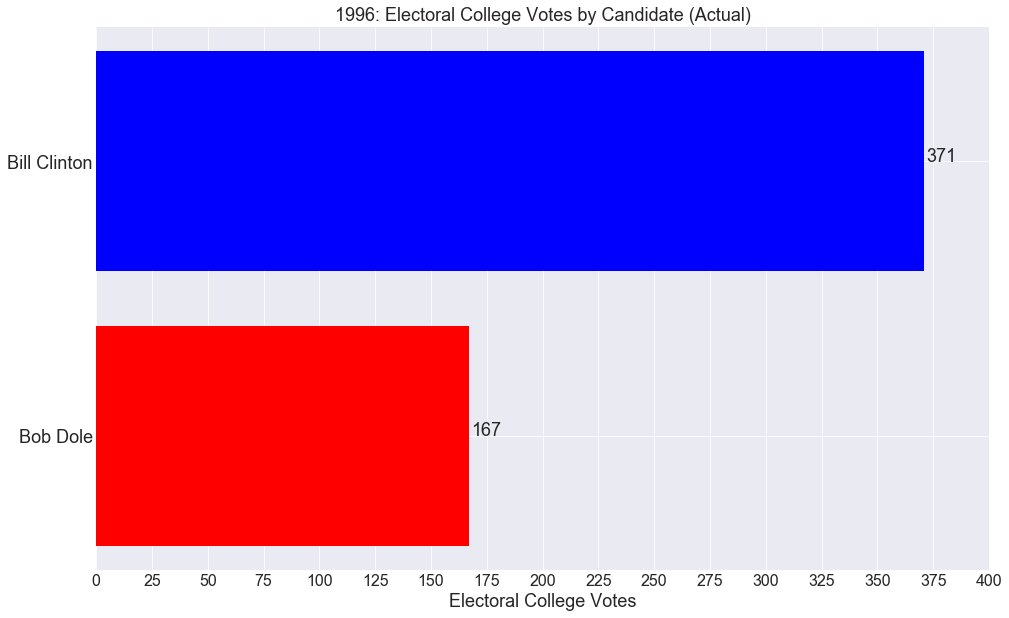

In [136]:
# Create tally for each Candidate

loopdf = EC1996.copy()

candidates = []
parties = []
districtwins = []
electorcount = []
color = []
graphyear = int(loopdf['Year'].mean())

for candidate in loopdf['Candidate'].unique():
    if candidate == '-':
        pass
    else:
        candidates.append(candidate)
        
for party in loopdf['Party'].unique():
    parties.append(party)
    if party == 'D':
        color.append('blue')
    elif party == 'R':
        color.append('red')
    else:
        color.append('gray')

for candidate in candidates:
    df = loopdf[loopdf['Candidate'] == candidate]
    districtwins.append(len(df['State'].unique()))
    electorcount.append(df['Delegates'].sum())

plt.figure(figsize=(16,10))
plt.barh(candidates, electorcount, color=color)

# we also need to switch the labels
plt.xlabel('Electoral College Votes', fontsize=18)
plt.title(f'{graphyear}: Electoral College Votes by Candidate (Actual)', fontsize=18)

plt.yticks(fontsize=18)
plt.xticks(np.arange(0, max(electorcount)*1.10, 25), fontsize=16)

for index,data in enumerate(electorcount):
    plt.text(y=index , x=data+1 , s=f"{data}" , fontdict=dict(fontsize=18))

# Save
plt.savefig(f'figs/EC/{graphyear}ActualResults.png')

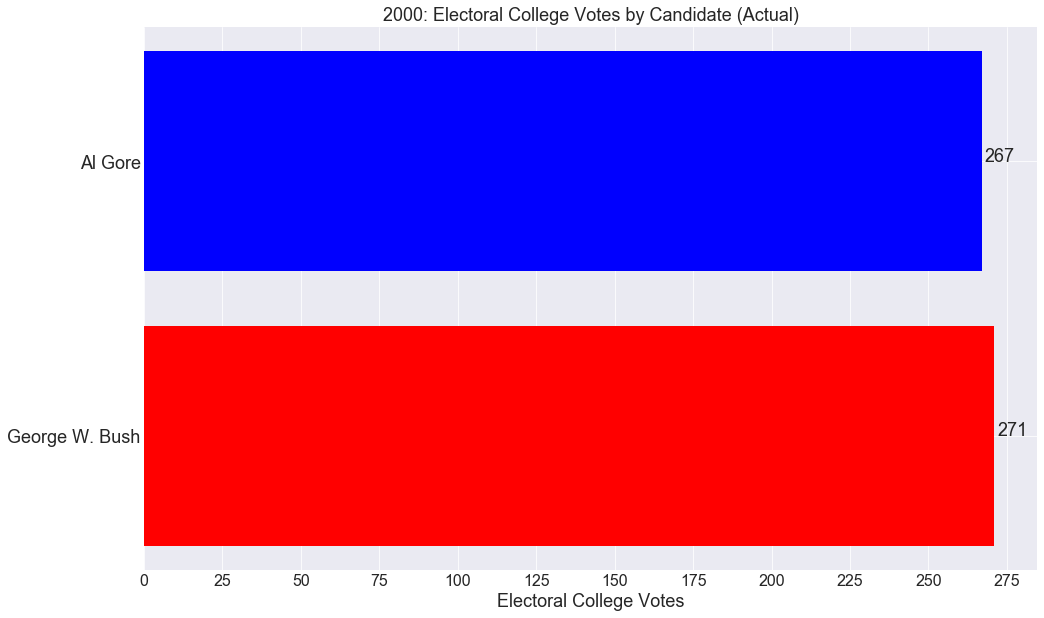

In [135]:
# Create tally for each Candidate

loopdf = EC2000.copy()

candidates = []
parties = []
districtwins = []
electorcount = []
color = []
graphyear = int(loopdf['Year'].mean())

for candidate in loopdf['Candidate'].unique():
    if candidate == '-':
        pass
    else:
        candidates.append(candidate)
        
for party in loopdf['Party'].unique():
    parties.append(party)
    if party == 'D':
        color.append('blue')
    elif party == 'R':
        color.append('red')
    else:
        color.append('gray')

for candidate in candidates:
    df = loopdf[loopdf['Candidate'] == candidate]
    districtwins.append(len(df['State'].unique()))
    electorcount.append(df['Delegates'].sum())

plt.figure(figsize=(16,10))
plt.barh(candidates, electorcount, color=color)

# we also need to switch the labels
plt.xlabel('Electoral College Votes', fontsize=18)
plt.title(f'{graphyear}: Electoral College Votes by Candidate (Actual)', fontsize=18)

plt.yticks(fontsize=18)
plt.xticks(np.arange(0, max(electorcount)*1.10, 25), fontsize=16)

for index,data in enumerate(electorcount):
    plt.text(y=index , x=data+1 , s=f"{data}" , fontdict=dict(fontsize=18))

# Save
plt.savefig(f'figs/EC/{graphyear}ActualResults.png')

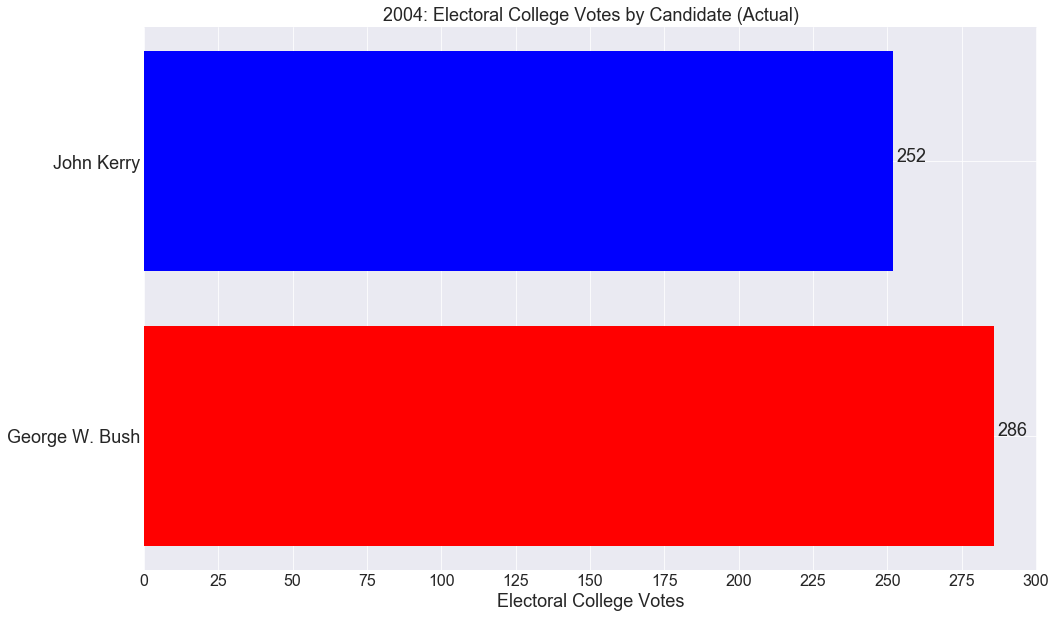

In [134]:
# Create tally for each Candidate

loopdf = EC2004.copy()

candidates = []
parties = []
districtwins = []
electorcount = []
color = []
graphyear = int(loopdf['Year'].mean())

for candidate in loopdf['Candidate'].unique():
    if candidate == '-':
        pass
    else:
        candidates.append(candidate)
        
for party in loopdf['Party'].unique():
    parties.append(party)
    if party == 'D':
        color.append('blue')
    elif party == 'R':
        color.append('red')
    else:
        color.append('gray')

for candidate in candidates:
    df = loopdf[loopdf['Candidate'] == candidate]
    districtwins.append(len(df['State'].unique()))
    electorcount.append(df['Delegates'].sum())

plt.figure(figsize=(16,10))
plt.barh(candidates, electorcount, color=color)

# we also need to switch the labels
plt.xlabel('Electoral College Votes', fontsize=18)
plt.title(f'{graphyear}: Electoral College Votes by Candidate (Actual)', fontsize=18)

plt.yticks(fontsize=18)
plt.xticks(np.arange(0, max(electorcount)*1.10, 25), fontsize=16)

for index,data in enumerate(electorcount):
    plt.text(y=index , x=data+1 , s=f"{data}" , fontdict=dict(fontsize=18))

# Save
plt.savefig(f'figs/EC/{graphyear}ActualResults.png')

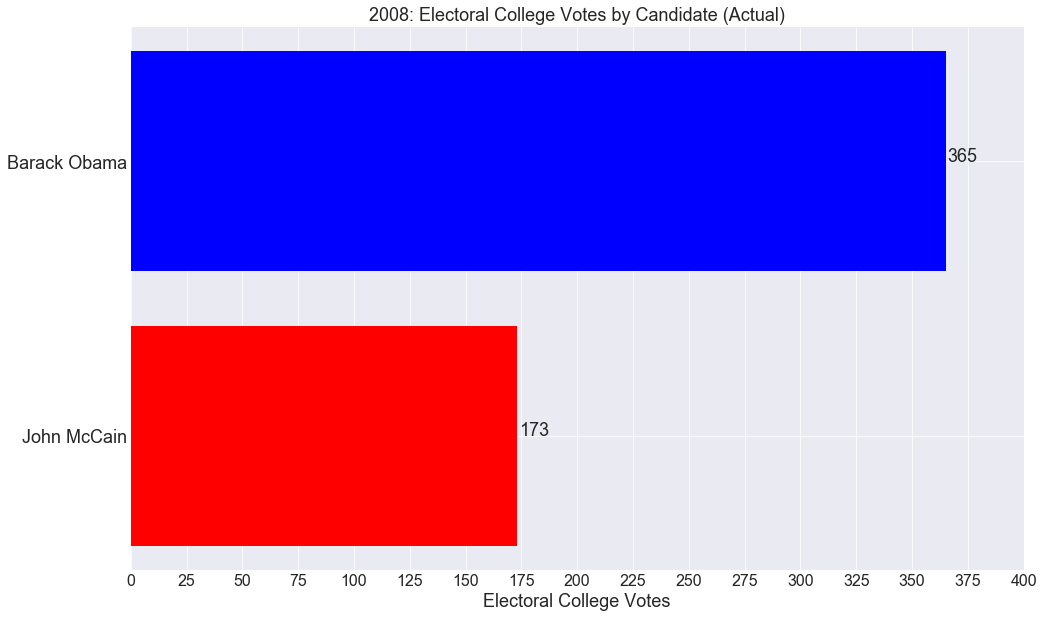

In [133]:
# Create tally for each Candidate

loopdf = EC2008.copy()

candidates = []
parties = []
districtwins = []
electorcount = []
color = []
graphyear = int(loopdf['Year'].mean())

for candidate in loopdf['Candidate'].unique():
    if candidate == '-':
        pass
    else:
        candidates.append(candidate)
        
for party in loopdf['Party'].unique():
    parties.append(party)
    if party == 'D':
        color.append('blue')
    elif party == 'R':
        color.append('red')
    else:
        color.append('gray')

for candidate in candidates:
    df = loopdf[loopdf['Candidate'] == candidate]
    districtwins.append(len(df['State'].unique()))
    electorcount.append(df['Delegates'].sum())

plt.figure(figsize=(16,10))
plt.barh(candidates, electorcount, color=color)

# we also need to switch the labels
plt.xlabel('Electoral College Votes', fontsize=18)
plt.title(f'{graphyear}: Electoral College Votes by Candidate (Actual)', fontsize=18)

plt.yticks(fontsize=18)
plt.xticks(np.arange(0, max(electorcount)*1.10, 25), fontsize=16)

for index,data in enumerate(electorcount):
    plt.text(y=index , x=data+1 , s=f"{data}" , fontdict=dict(fontsize=18))

# Save
plt.savefig(f'figs/EC/{graphyear}ActualResults.png')

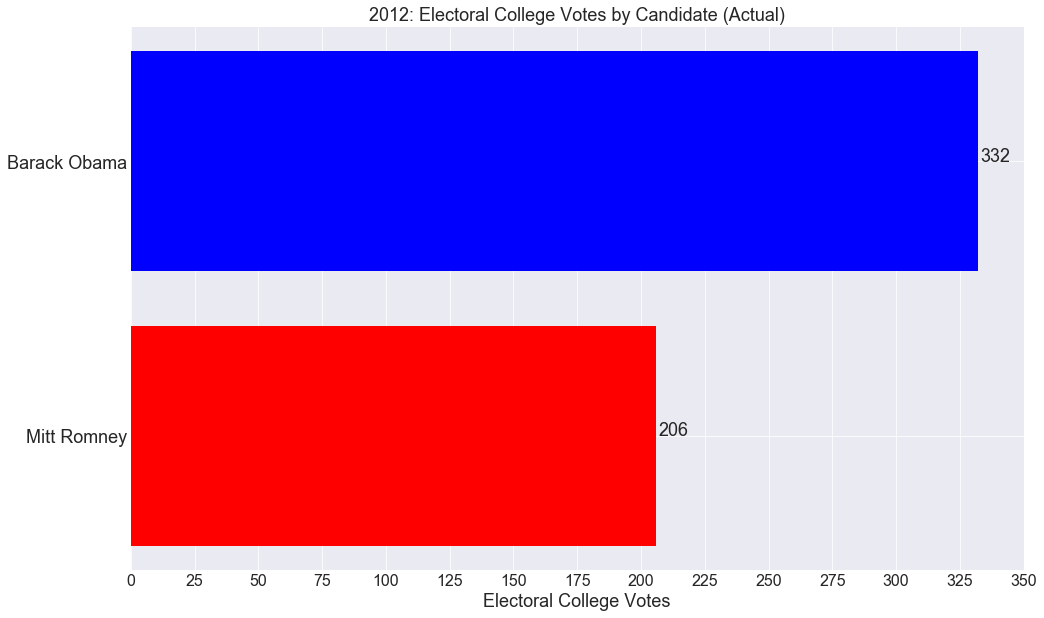

In [132]:
# Create tally for each Candidate

loopdf = EC2012.copy()

candidates = []
parties = []
districtwins = []
electorcount = []
color = []
graphyear = int(loopdf['Year'].mean())

for candidate in loopdf['Candidate'].unique():
    if candidate == '-':
        pass
    else:
        candidates.append(candidate)
        
for party in loopdf['Party'].unique():
    parties.append(party)
    if party == 'D':
        color.append('blue')
    elif party == 'R':
        color.append('red')
    else:
        color.append('gray')

for candidate in candidates:
    df = loopdf[loopdf['Candidate'] == candidate]
    districtwins.append(len(df['State'].unique()))
    electorcount.append(df['Delegates'].sum())

plt.figure(figsize=(16,10))
plt.barh(candidates, electorcount, color=color)

# we also need to switch the labels
plt.xlabel('Electoral College Votes', fontsize=18)
plt.title(f'{graphyear}: Electoral College Votes by Candidate (Actual)', fontsize=18)

plt.yticks(fontsize=18)
plt.xticks(np.arange(0, max(electorcount)*1.10, 25), fontsize=16)

for index,data in enumerate(electorcount):
    plt.text(y=index , x=data+1 , s=f"{data}" , fontdict=dict(fontsize=18))

# Save
plt.savefig(f'figs/EC/{graphyear}ActualResults.png')

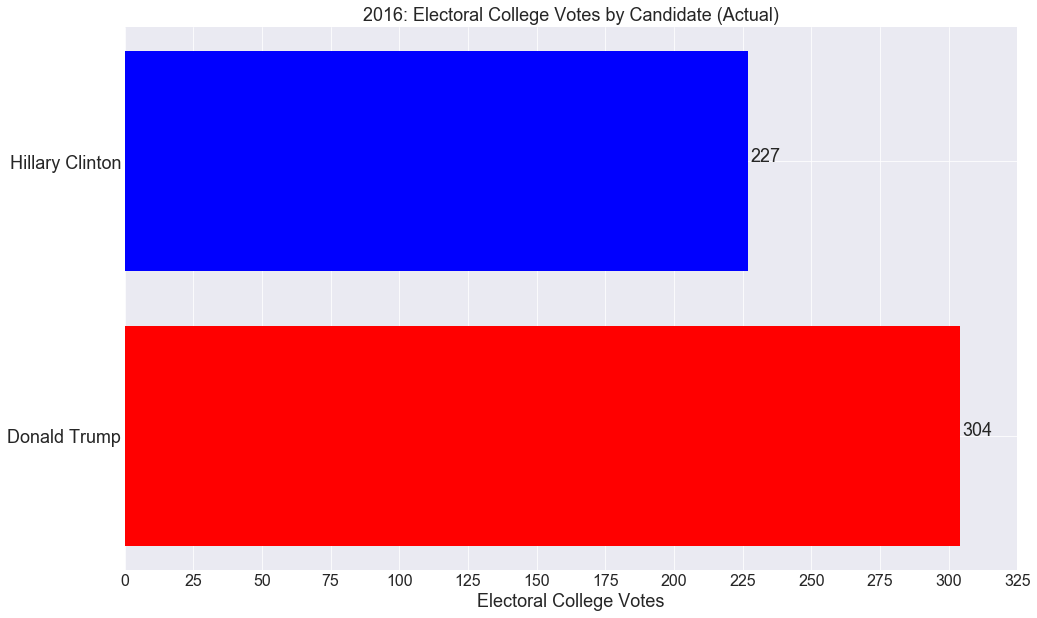

In [131]:
# Create tally for each Candidate

loopdf = EC2016.copy()

candidates = []
parties = []
districtwins = []
electorcount = []
color = []
graphyear = int(loopdf['Year'].mean())

for candidate in loopdf['Candidate'].unique():
    if candidate == '-':
        pass
    else:
        candidates.append(candidate)
        
for party in loopdf['Party'].unique():
    parties.append(party)
    if party == 'D':
        color.append('blue')
    elif party == 'R':
        color.append('red')
    else:
        color.append('gray')

for candidate in candidates:
    df = loopdf[loopdf['Candidate'] == candidate]
    districtwins.append(len(df['State'].unique()))
    electorcount.append(df['Delegates'].sum())

plt.figure(figsize=(16,10))
plt.barh(candidates, electorcount, color=color)

# we also need to switch the labels
plt.xlabel('Electoral College Votes', fontsize=18)
plt.title(f'{graphyear}: Electoral College Votes by Candidate (Actual)', fontsize=18)

plt.yticks(fontsize=18)
plt.xticks(np.arange(0, max(electorcount)*1.10, 25), fontsize=16)

for index,data in enumerate(electorcount):
    plt.text(y=index , x=data+1 , s=f"{data}" , fontdict=dict(fontsize=18))

# Save
plt.savefig(f'figs/EC/{graphyear}ActualResults.png')

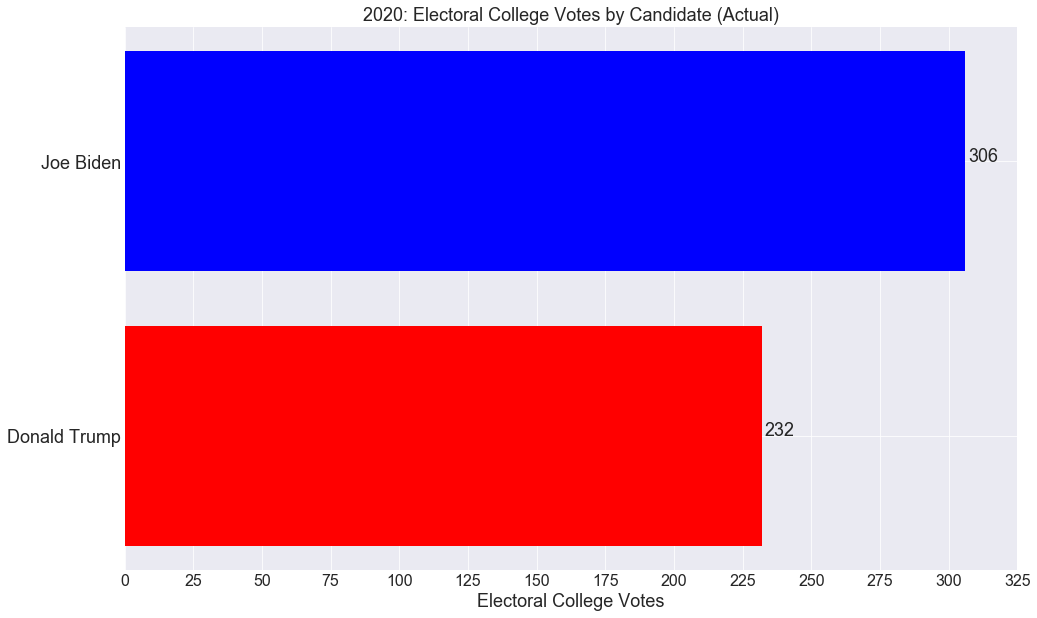

In [130]:
# Create tally for each Candidate

loopdf = EC2020.copy()

candidates = []
parties = []
districtwins = []
electorcount = []
color = []
graphyear = int(loopdf['Year'].mean())

for candidate in loopdf['Candidate'].unique():
    if candidate == '-':
        pass
    else:
        candidates.append(candidate)
        
for party in loopdf['Party'].unique():
    parties.append(party)
    if party == 'D':
        color.append('blue')
    elif party == 'R':
        color.append('red')
    else:
        color.append('gray')

for candidate in candidates:
    df = loopdf[loopdf['Candidate'] == candidate]
    districtwins.append(len(df['State'].unique()))
    electorcount.append(df['Delegates'].sum())

plt.figure(figsize=(16,10))
plt.barh(candidates, electorcount, color=color)

# we also need to switch the labels
plt.xlabel('Electoral College Votes', fontsize=18)
plt.title(f'{graphyear}: Electoral College Votes by Candidate (Actual)', fontsize=18)

plt.yticks(fontsize=18)
plt.xticks(np.arange(0, max(electorcount)*1.10, 25), fontsize=16)

for index,data in enumerate(electorcount):
    plt.text(y=index , x=data+1 , s=f"{data}" , fontdict=dict(fontsize=18))

# Save
plt.savefig(f'figs/EC/{graphyear}ActualResults.png')

## If proposed amounts were implemented:

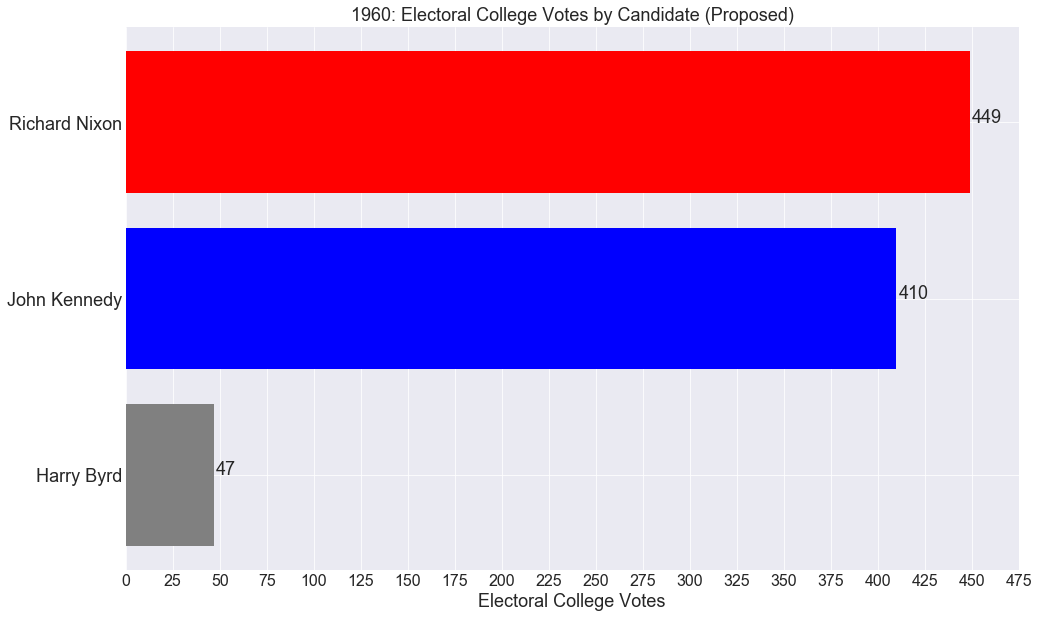

In [129]:
# Create tally for each Candidate

loopdf = EC1960.copy()

candidates = []
parties = []
districtwins = []
propelectorcount = []
color = []
graphyear = int(loopdf['Year'].mean())

for candidate in loopdf['Candidate'].unique():
    if candidate == '-':
        pass
    else:
        candidates.append(candidate)
        
for party in loopdf['Party'].unique():
    parties.append(party)
    if party == 'D':
        color.append('blue')
    elif party == 'R':
        color.append('red')
    else:
        color.append('gray')

for candidate in candidates:
    df = loopdf[loopdf['Candidate'] == candidate]
    districtwins.append(len(df['State'].unique()))
    propelectorcount.append(df['PropEC'].sum())

plt.figure(figsize=(16,10))
plt.barh(candidates, propelectorcount, color=color)

# we also need to switch the labels
plt.xlabel('Electoral College Votes', fontsize=18)
plt.title(f'{graphyear}: Electoral College Votes by Candidate (Proposed)', fontsize=18)

plt.yticks(fontsize=18)
plt.xticks(np.arange(0, max(propelectorcount)*1.10, 25), fontsize=16)

for index,data in enumerate(propelectorcount):
    plt.text(y=index , x=data+1 , s=f"{data}" , fontdict=dict(fontsize=18))

# Save
plt.savefig(f'figs/EC/{graphyear}ProposedResults.png')

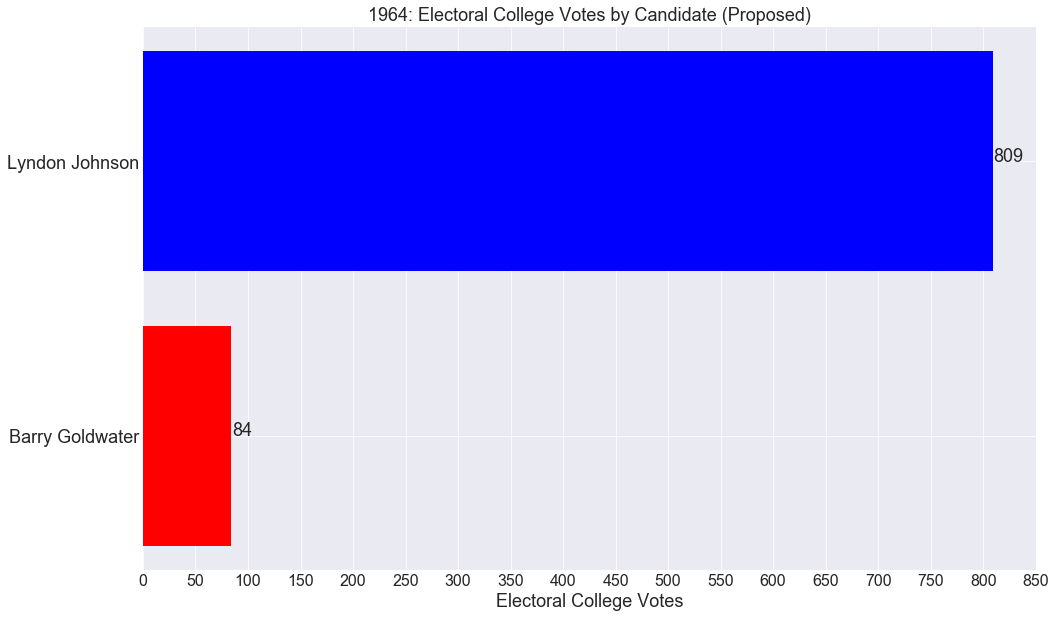

In [128]:
# Create tally for each Candidate

loopdf = EC1964.copy()

candidates = []
parties = []
districtwins = []
propelectorcount = []
color = []
graphyear = int(loopdf['Year'].mean())

for candidate in loopdf['Candidate'].unique():
    if candidate == '-':
        pass
    else:
        candidates.append(candidate)
        
for party in loopdf['Party'].unique():
    parties.append(party)
    if party == 'D':
        color.append('blue')
    elif party == 'R':
        color.append('red')
    else:
        color.append('gray')

for candidate in candidates:
    df = loopdf[loopdf['Candidate'] == candidate]
    districtwins.append(len(df['State'].unique()))
    propelectorcount.append(df['PropEC'].sum())

plt.figure(figsize=(16,10))
plt.barh(candidates, propelectorcount, color=color)

# we also need to switch the labels
plt.xlabel('Electoral College Votes', fontsize=18)
plt.title(f'{graphyear}: Electoral College Votes by Candidate (Proposed)', fontsize=18)

plt.yticks(fontsize=18)
plt.xticks(np.arange(0, max(propelectorcount)*1.10, 50), fontsize=16)

for index,data in enumerate(propelectorcount):
    plt.text(y=index , x=data+1 , s=f"{data}" , fontdict=dict(fontsize=18))

# Save
plt.savefig(f'figs/EC/{graphyear}ProposedResults.png')

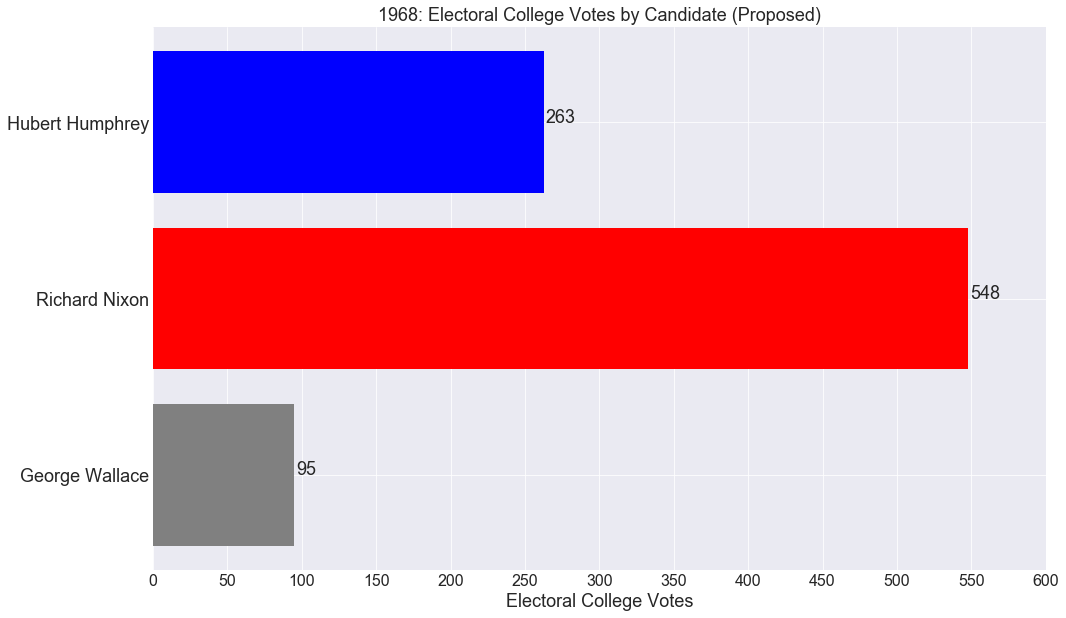

In [127]:
# Create tally for each Candidate

loopdf = EC1968.copy()

candidates = []
parties = []
districtwins = []
propelectorcount = []
color = []
graphyear = int(loopdf['Year'].mean())

for candidate in loopdf['Candidate'].unique():
    if candidate == '-':
        pass
    else:
        candidates.append(candidate)
        
for party in loopdf['Party'].unique():
    parties.append(party)
    if party == 'D':
        color.append('blue')
    elif party == 'R':
        color.append('red')
    else:
        color.append('gray')

for candidate in candidates:
    df = loopdf[loopdf['Candidate'] == candidate]
    districtwins.append(len(df['State'].unique()))
    propelectorcount.append(df['PropEC'].sum())

plt.figure(figsize=(16,10))
plt.barh(candidates, propelectorcount, color=color)

# we also need to switch the labels
plt.xlabel('Electoral College Votes', fontsize=18)
plt.title(f'{graphyear}: Electoral College Votes by Candidate (Proposed)', fontsize=18)

plt.yticks(fontsize=18)
plt.xticks(np.arange(0, max(propelectorcount)*1.10, 50), fontsize=16)

for index,data in enumerate(propelectorcount):
    plt.text(y=index , x=data+1 , s=f"{data}" , fontdict=dict(fontsize=18))

# Save
plt.savefig(f'figs/EC/{graphyear}ProposedResults.png')

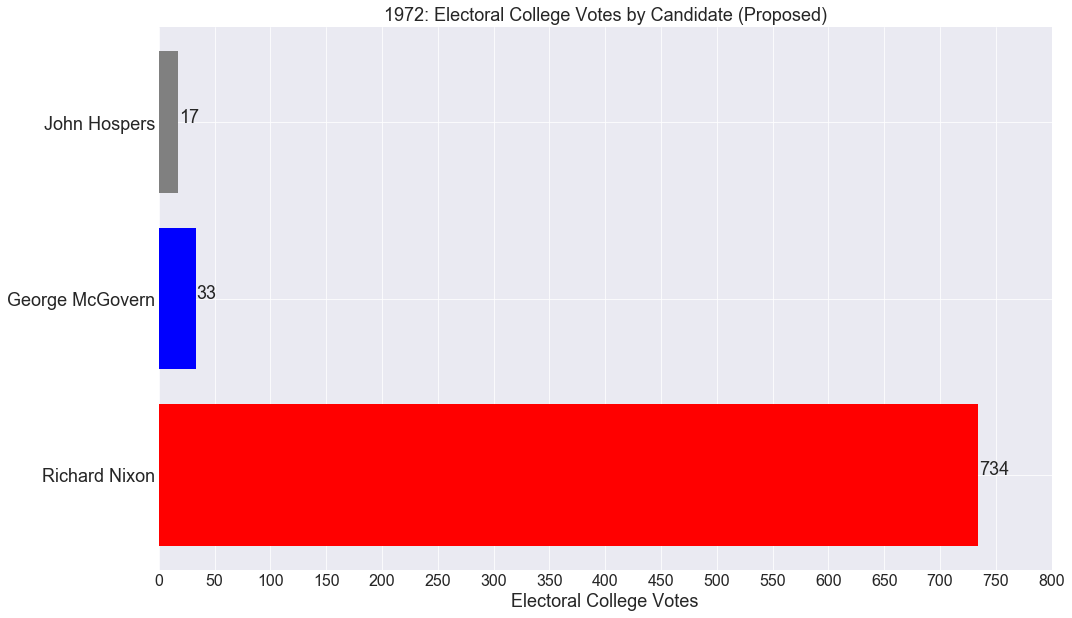

In [125]:
# Create tally for each Candidate

loopdf = EC1972.copy()

candidates = []
parties = []
districtwins = []
propelectorcount = []
color = []
graphyear = int(loopdf['Year'].mean())

for candidate in loopdf['Candidate'].unique():
    if candidate == '-':
        pass
    else:
        candidates.append(candidate)
        
for party in loopdf['Party'].unique():
    parties.append(party)
    if party == 'D':
        color.append('blue')
    elif party == 'R':
        color.append('red')
    else:
        color.append('gray')

for candidate in candidates:
    df = loopdf[loopdf['Candidate'] == candidate]
    districtwins.append(len(df['State'].unique()))
    propelectorcount.append(df['PropEC'].sum())

plt.figure(figsize=(16,10))
plt.barh(candidates, propelectorcount, color=color)

# we also need to switch the labels
plt.xlabel('Electoral College Votes', fontsize=18)
plt.title(f'{graphyear}: Electoral College Votes by Candidate (Proposed)', fontsize=18)

plt.yticks(fontsize=18)
plt.xticks(np.arange(0, max(propelectorcount)*1.10, 50), fontsize=16)

for index,data in enumerate(propelectorcount):
    plt.text(y=index , x=data+1 , s=f"{data}" , fontdict=dict(fontsize=18))

# Save
plt.savefig(f'figs/EC/{graphyear}ProposedResults.png')

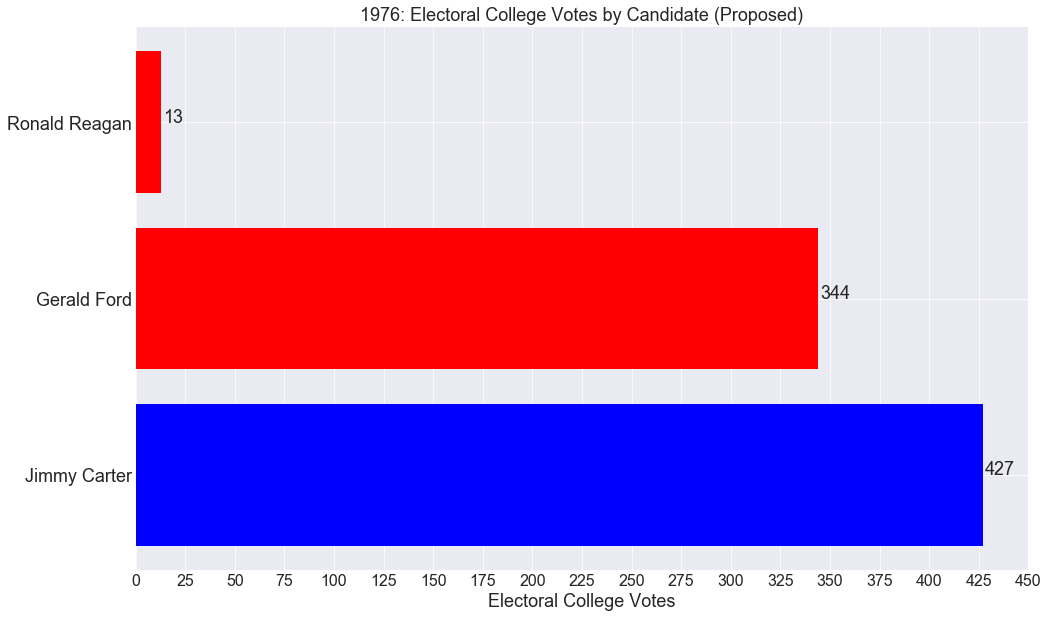

In [124]:
# Create tally for each Candidate

loopdf = EC1976.copy()

candidates = []
parties = []
districtwins = []
propelectorcount = []
color = []
graphyear = int(loopdf['Year'].mean())

for candidate in loopdf['Candidate'].unique():
    if candidate == '-':
        pass
    else:
        candidates.append(candidate)
        
for party in loopdf['Party'].unique():
    parties.append(party)
    if party == 'D':
        color.append('blue')
    elif party == 'R':
        color.append('red')
    else:
        color.append('gray')

for candidate in candidates:
    df = loopdf[loopdf['Candidate'] == candidate]
    districtwins.append(len(df['State'].unique()))
    propelectorcount.append(df['PropEC'].sum())

plt.figure(figsize=(16,10))
plt.barh(candidates, propelectorcount, color=['blue', 'red', 'red'])

# we also need to switch the labels
plt.xlabel('Electoral College Votes', fontsize=18)
plt.title(f'{graphyear}: Electoral College Votes by Candidate (Proposed)', fontsize=18)

plt.yticks(fontsize=18)
plt.xticks(np.arange(0, max(propelectorcount)*1.10, 25), fontsize=16)

for index,data in enumerate(propelectorcount):
    plt.text(y=index , x=data+1 , s=f"{data}" , fontdict=dict(fontsize=18))

# Save
plt.savefig(f'figs/EC/{graphyear}ProposedResults.png')

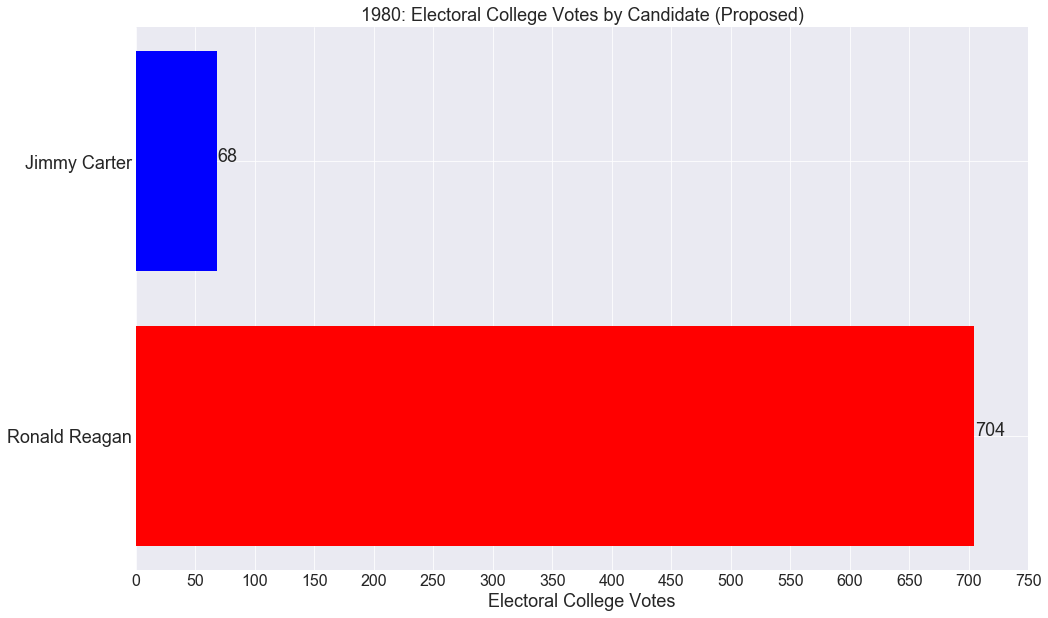

In [123]:
# Create tally for each Candidate

loopdf = EC1980.copy()

candidates = []
parties = []
districtwins = []
propelectorcount = []
color = []
graphyear = int(loopdf['Year'].mean())

for candidate in loopdf['Candidate'].unique():
    if candidate == '-':
        pass
    else:
        candidates.append(candidate)
        
for party in loopdf['Party'].unique():
    parties.append(party)
    if party == 'D':
        color.append('blue')
    elif party == 'R':
        color.append('red')
    else:
        color.append('gray')

for candidate in candidates:
    df = loopdf[loopdf['Candidate'] == candidate]
    districtwins.append(len(df['State'].unique()))
    propelectorcount.append(df['PropEC'].sum())

plt.figure(figsize=(16,10))
plt.barh(candidates, propelectorcount, color=color)

# we also need to switch the labels
plt.xlabel('Electoral College Votes', fontsize=18)
plt.title(f'{graphyear}: Electoral College Votes by Candidate (Proposed)', fontsize=18)

plt.yticks(fontsize=18)
plt.xticks(np.arange(0, max(propelectorcount)*1.10, 50), fontsize=16)

for index,data in enumerate(propelectorcount):
    plt.text(y=index , x=data+1 , s=f"{data}" , fontdict=dict(fontsize=18))

# Save
plt.savefig(f'figs/EC/{graphyear}ProposedResults.png')

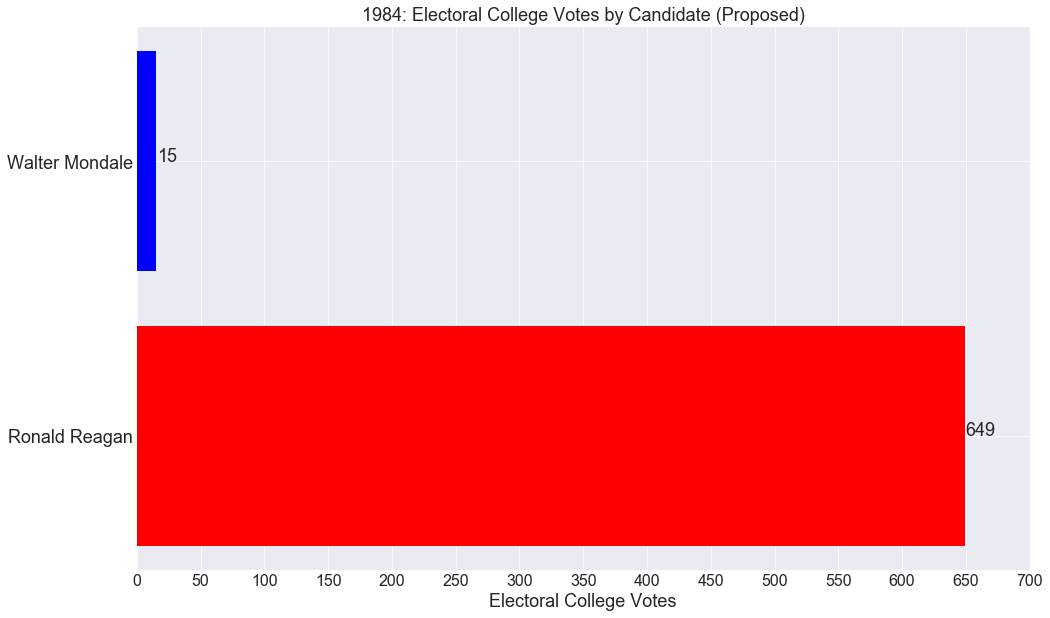

In [122]:
# Create tally for each Candidate

loopdf = EC1984.copy()

candidates = []
parties = []
districtwins = []
propelectorcount = []
color = []
graphyear = int(loopdf['Year'].mean())

for candidate in loopdf['Candidate'].unique():
    if candidate == '-':
        pass
    else:
        candidates.append(candidate)
        
for party in loopdf['Party'].unique():
    parties.append(party)
    if party == 'D':
        color.append('blue')
    elif party == 'R':
        color.append('red')
    else:
        color.append('gray')

for candidate in candidates:
    df = loopdf[loopdf['Candidate'] == candidate]
    districtwins.append(len(df['State'].unique()))
    propelectorcount.append(df['PropEC'].sum())

plt.figure(figsize=(16,10))
plt.barh(candidates, propelectorcount, color=color)

# we also need to switch the labels
plt.xlabel('Electoral College Votes', fontsize=18)
plt.title(f'{graphyear}: Electoral College Votes by Candidate (Proposed)', fontsize=18)

plt.yticks(fontsize=18)
plt.xticks(np.arange(0, max(propelectorcount)*1.10, 50), fontsize=16)

for index,data in enumerate(propelectorcount):
    plt.text(y=index , x=data+1 , s=f"{data}" , fontdict=dict(fontsize=18))

# Save
plt.savefig(f'figs/EC/{graphyear}ProposedResults.png')

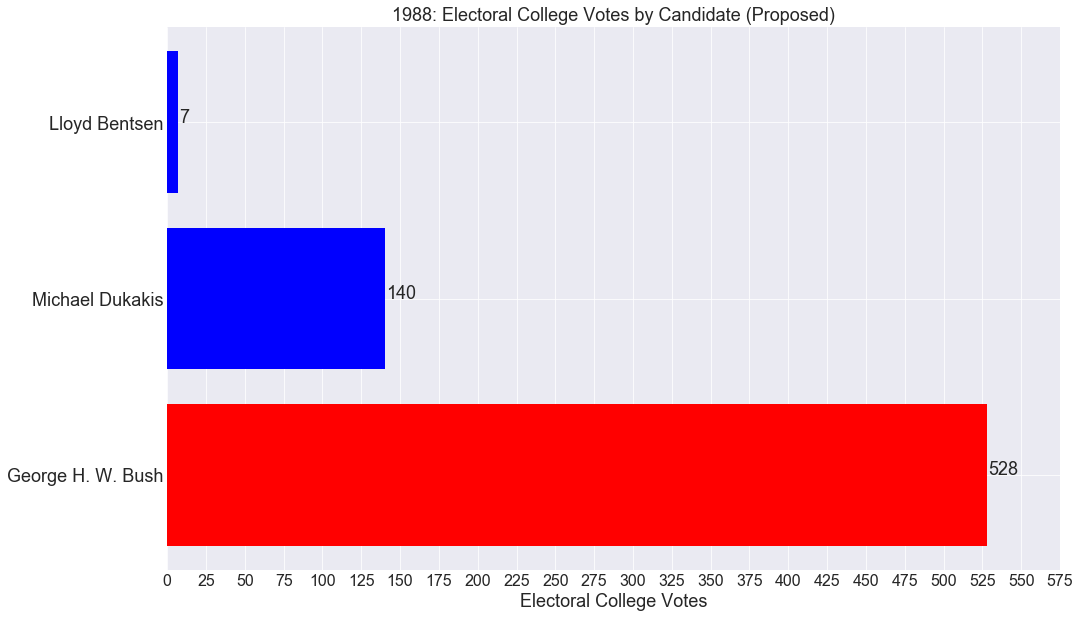

In [121]:
# Create tally for each Candidate

loopdf = EC1988.copy()

candidates = []
parties = []
districtwins = []
propelectorcount = []
color = []
graphyear = int(loopdf['Year'].mean())

for candidate in loopdf['Candidate'].unique():
    if candidate == '-':
        pass
    else:
        candidates.append(candidate)
        
for party in loopdf['Party'].unique():
    parties.append(party)
    if party == 'D':
        color.append('blue')
    elif party == 'R':
        color.append('red')
    else:
        color.append('gray')

for candidate in candidates:
    df = loopdf[loopdf['Candidate'] == candidate]
    districtwins.append(len(df['State'].unique()))
    propelectorcount.append(df['PropEC'].sum())

plt.figure(figsize=(16,10))
plt.barh(candidates, propelectorcount, color=['red', 'blue','blue'])

# we also need to switch the labels
plt.xlabel('Electoral College Votes', fontsize=18)
plt.title(f'{graphyear}: Electoral College Votes by Candidate (Proposed)', fontsize=18)

plt.yticks(fontsize=18)
plt.xticks(np.arange(0, max(propelectorcount)*1.10, 25), fontsize=16)

for index,data in enumerate(propelectorcount):
    plt.text(y=index , x=data+1 , s=f"{data}" , fontdict=dict(fontsize=18))

# Save
plt.savefig(f'figs/EC/{graphyear}ProposedResults.png')

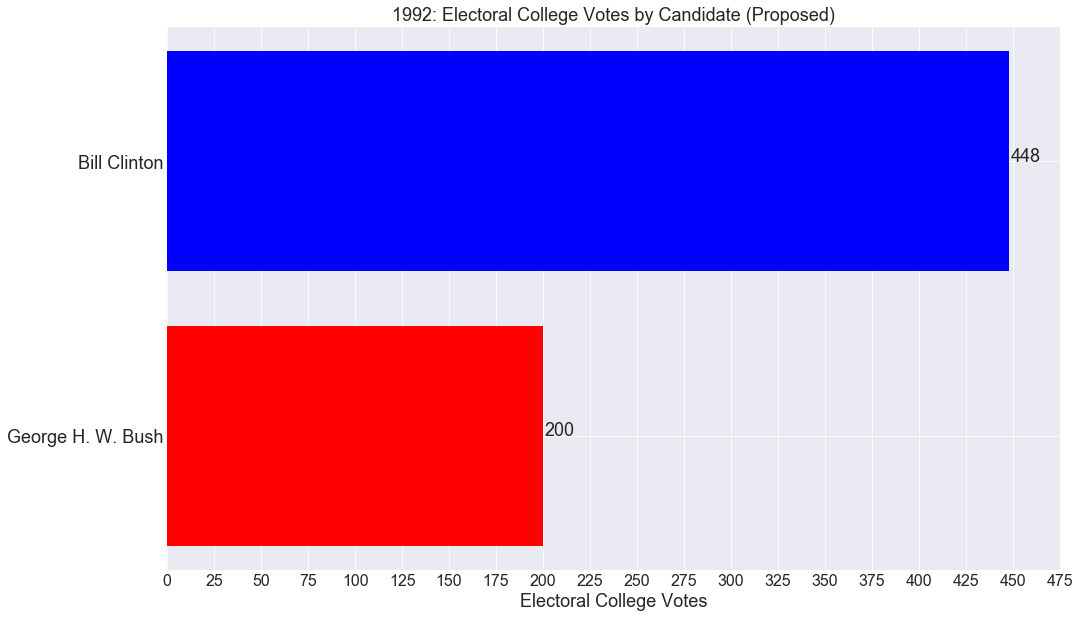

In [120]:
# Create tally for each Candidate

loopdf = EC1992.copy()

candidates = []
parties = []
districtwins = []
propelectorcount = []
color = []
graphyear = int(loopdf['Year'].mean())

for candidate in loopdf['Candidate'].unique():
    if candidate == '-':
        pass
    else:
        candidates.append(candidate)
        
for party in loopdf['Party'].unique():
    parties.append(party)
    if party == 'D':
        color.append('blue')
    elif party == 'R':
        color.append('red')
    else:
        color.append('gray')

for candidate in candidates:
    df = loopdf[loopdf['Candidate'] == candidate]
    districtwins.append(len(df['State'].unique()))
    propelectorcount.append(df['PropEC'].sum())

plt.figure(figsize=(16,10))
plt.barh(candidates, propelectorcount, color=color)

# we also need to switch the labels
plt.xlabel('Electoral College Votes', fontsize=18)
plt.title(f'{graphyear}: Electoral College Votes by Candidate (Proposed)', fontsize=18)

plt.yticks(fontsize=18)
plt.xticks(np.arange(0, max(propelectorcount)*1.10, 25), fontsize=16)

for index,data in enumerate(propelectorcount):
    plt.text(y=index , x=data+1 , s=f"{data}" , fontdict=dict(fontsize=18))

# Save
plt.savefig(f'figs/EC/{graphyear}ProposedResults.png')

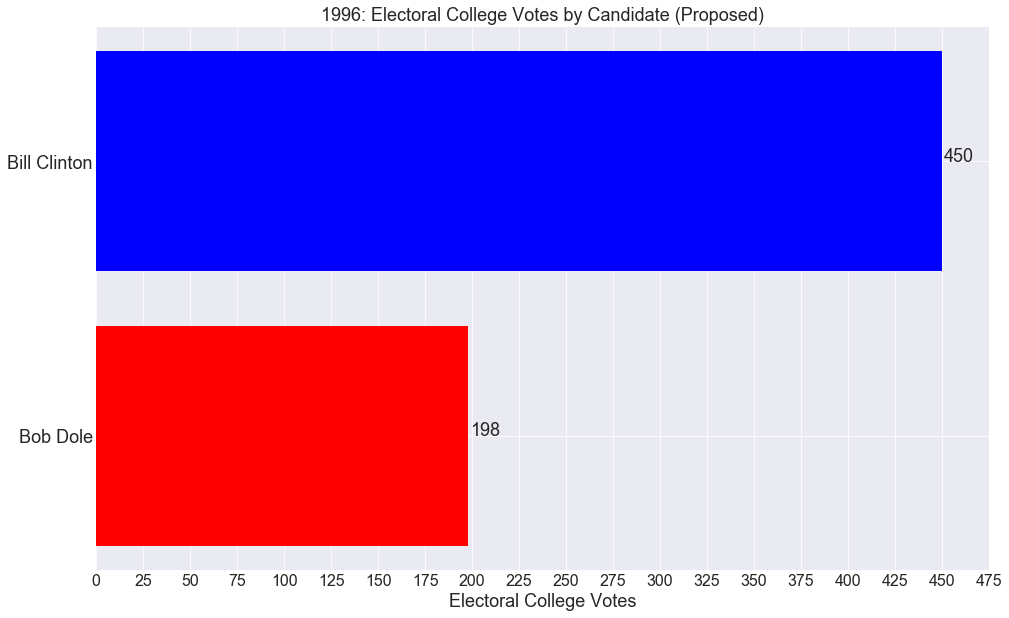

In [119]:
# Create tally for each Candidate

loopdf = EC1996.copy()

candidates = []
parties = []
districtwins = []
propelectorcount = []
color = []
graphyear = int(loopdf['Year'].mean())

for candidate in loopdf['Candidate'].unique():
    if candidate == '-':
        pass
    else:
        candidates.append(candidate)
        
for party in loopdf['Party'].unique():
    parties.append(party)
    if party == 'D':
        color.append('blue')
    elif party == 'R':
        color.append('red')
    else:
        color.append('gray')

for candidate in candidates:
    df = loopdf[loopdf['Candidate'] == candidate]
    districtwins.append(len(df['State'].unique()))
    propelectorcount.append(df['PropEC'].sum())

plt.figure(figsize=(16,10))
plt.barh(candidates, propelectorcount, color=color)

# we also need to switch the labels
plt.xlabel('Electoral College Votes', fontsize=18)
plt.title(f'{graphyear}: Electoral College Votes by Candidate (Proposed)', fontsize=18)

plt.yticks(fontsize=18)
plt.xticks(np.arange(0, max(propelectorcount)*1.10, 25), fontsize=16)

for index,data in enumerate(propelectorcount):
    plt.text(y=index , x=data+1 , s=f"{data}" , fontdict=dict(fontsize=18))

# Save
plt.savefig(f'figs/EC/{graphyear}ProposedResults.png')

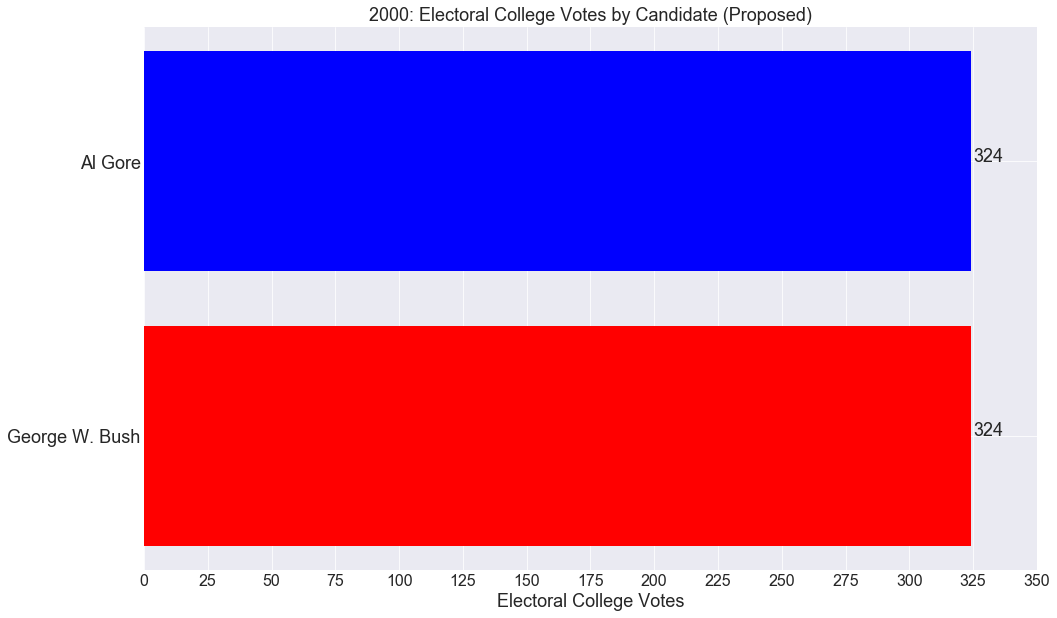

In [118]:
# Create tally for each Candidate

loopdf = EC2000.copy()

candidates = []
parties = []
districtwins = []
propelectorcount = []
color = []
graphyear = int(loopdf['Year'].mean())

for candidate in loopdf['Candidate'].unique():
    if candidate == '-':
        pass
    else:
        candidates.append(candidate)
        
for party in loopdf['Party'].unique():
    parties.append(party)
    if party == 'D':
        color.append('blue')
    elif party == 'R':
        color.append('red')
    else:
        color.append('gray')

for candidate in candidates:
    df = loopdf[loopdf['Candidate'] == candidate]
    districtwins.append(len(df['State'].unique()))
    propelectorcount.append(df['PropEC'].sum())

plt.figure(figsize=(16,10))
plt.barh(candidates, propelectorcount, color=color)

# we also need to switch the labels
plt.xlabel('Electoral College Votes', fontsize=18)
plt.title(f'{graphyear}: Electoral College Votes by Candidate (Proposed)', fontsize=18)

plt.yticks(fontsize=18)
plt.xticks(np.arange(0, max(propelectorcount)*1.10, 25), fontsize=16)

for index,data in enumerate(propelectorcount):
    plt.text(y=index , x=data+1 , s=f"{data}" , fontdict=dict(fontsize=18))

# Save
plt.savefig(f'figs/EC/{graphyear}ProposedResults.png')

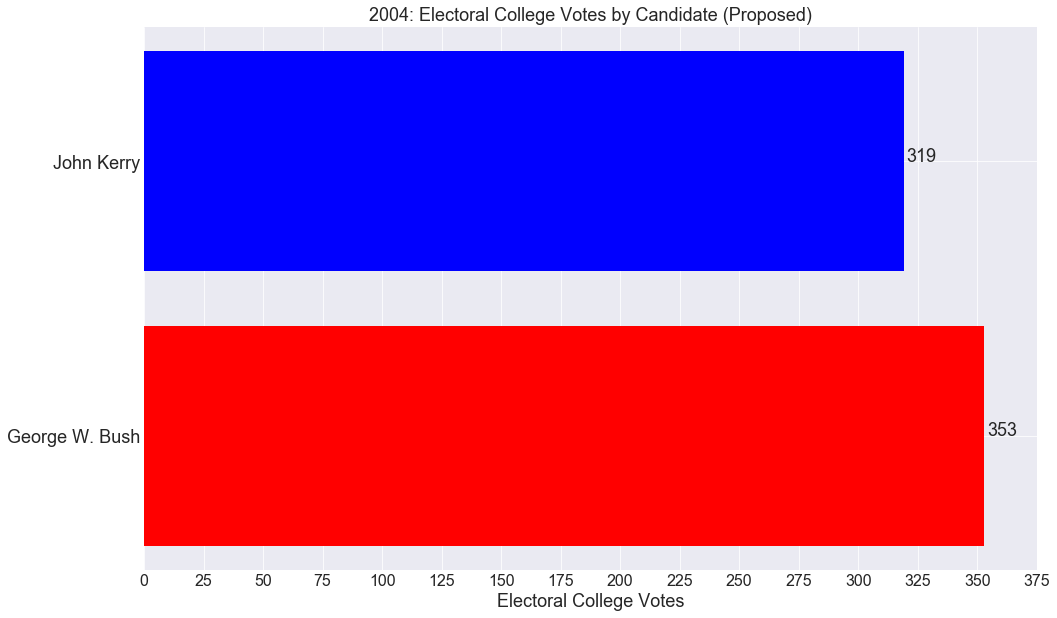

In [146]:
# Create tally for each Candidate

loopdf = EC2004.copy()

candidates = []
parties = []
districtwins = []
propelectorcount = []
color = []
graphyear = int(loopdf['Year'].mean())

for candidate in loopdf['Candidate'].unique():
    if candidate == '-':
        pass
    else:
        candidates.append(candidate)
        
for party in loopdf['Party'].unique():
    parties.append(party)
    if party == 'D':
        color.append('blue')
    elif party == 'R':
        color.append('red')
    else:
        color.append('gray')

for candidate in candidates:
    df = loopdf[loopdf['Candidate'] == candidate]
    districtwins.append(len(df['State'].unique()))
    propelectorcount.append(df['PropEC'].sum())

plt.figure(figsize=(16,10))
plt.barh(candidates, propelectorcount, color=color)

# we also need to switch the labels
plt.xlabel('Electoral College Votes', fontsize=18)
plt.title(f'{graphyear}: Electoral College Votes by Candidate (Proposed)', fontsize=18)

plt.yticks(fontsize=18)
plt.xticks(np.arange(0, max(propelectorcount)*1.10, 25), fontsize=16)

for index,data in enumerate(propelectorcount):
    plt.text(y=index , x=data+1 , s=f"{data}" , fontdict=dict(fontsize=18))

# Save
plt.savefig(f'figs/EC/{graphyear}ProposedResults.png')

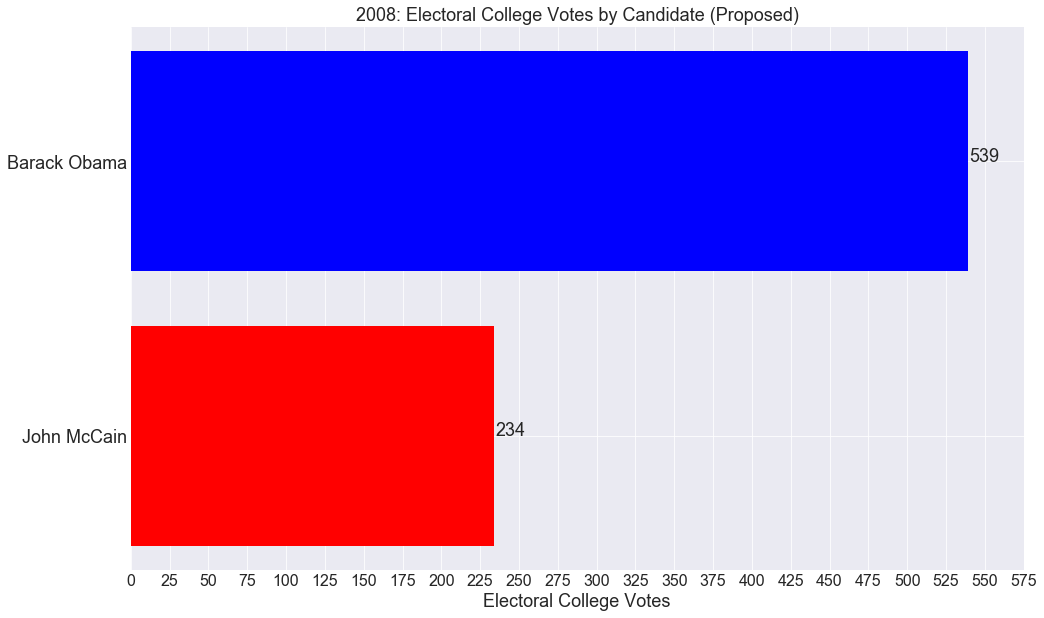

In [147]:
# Create tally for each Candidate

loopdf = EC2008.copy()

candidates = []
parties = []
districtwins = []
propelectorcount = []
color = []
graphyear = int(loopdf['Year'].mean())

for candidate in loopdf['Candidate'].unique():
    if candidate == '-':
        pass
    else:
        candidates.append(candidate)
        
for party in loopdf['Party'].unique():
    parties.append(party)
    if party == 'D':
        color.append('blue')
    elif party == 'R':
        color.append('red')
    else:
        color.append('gray')

for candidate in candidates:
    df = loopdf[loopdf['Candidate'] == candidate]
    districtwins.append(len(df['State'].unique()))
    propelectorcount.append(df['PropEC'].sum())

plt.figure(figsize=(16,10))
plt.barh(candidates, propelectorcount, color=color)

# we also need to switch the labels
plt.xlabel('Electoral College Votes', fontsize=18)
plt.title(f'{graphyear}: Electoral College Votes by Candidate (Proposed)', fontsize=18)

plt.yticks(fontsize=18)
plt.xticks(np.arange(0, max(propelectorcount)*1.10, 25), fontsize=16)

for index,data in enumerate(propelectorcount):
    plt.text(y=index , x=data+1 , s=f"{data}" , fontdict=dict(fontsize=18))

# Save
plt.savefig(f'figs/EC/{graphyear}ProposedResults.png')

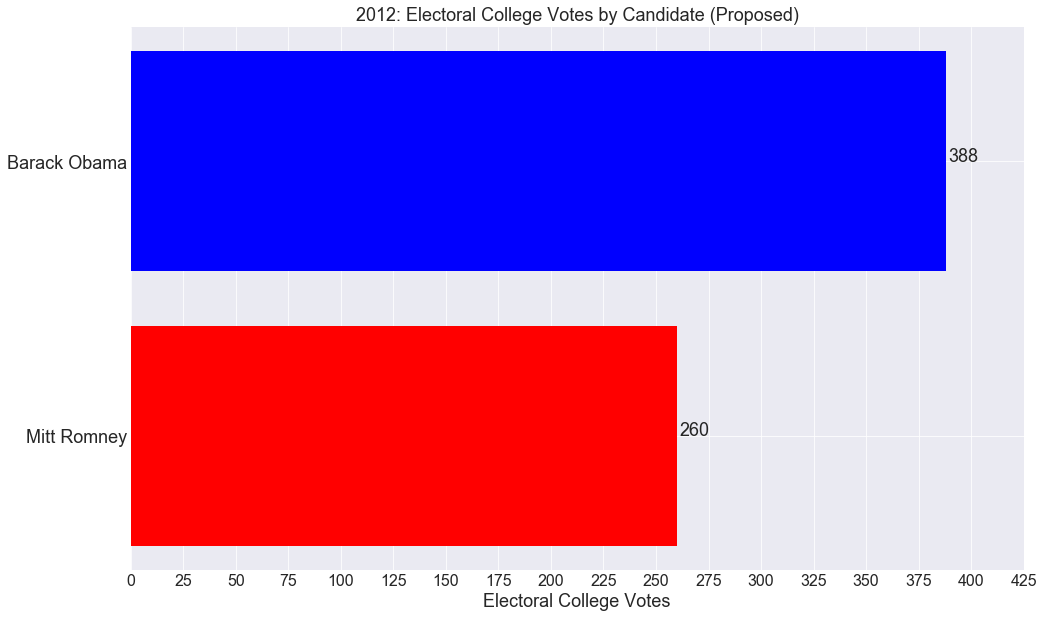

In [148]:
# Create tally for each Candidate

loopdf = EC2012.copy()

candidates = []
parties = []
districtwins = []
propelectorcount = []
color = []
graphyear = int(loopdf['Year'].mean())

for candidate in loopdf['Candidate'].unique():
    if candidate == '-':
        pass
    else:
        candidates.append(candidate)
        
for party in loopdf['Party'].unique():
    parties.append(party)
    if party == 'D':
        color.append('blue')
    elif party == 'R':
        color.append('red')
    else:
        color.append('gray')

for candidate in candidates:
    df = loopdf[loopdf['Candidate'] == candidate]
    districtwins.append(len(df['State'].unique()))
    propelectorcount.append(df['PropEC'].sum())

plt.figure(figsize=(16,10))
plt.barh(candidates, propelectorcount, color=color)

# we also need to switch the labels
plt.xlabel('Electoral College Votes', fontsize=18)
plt.title(f'{graphyear}: Electoral College Votes by Candidate (Proposed)', fontsize=18)

plt.yticks(fontsize=18)
plt.xticks(np.arange(0, max(propelectorcount)*1.10, 25), fontsize=16)

for index,data in enumerate(propelectorcount):
    plt.text(y=index , x=data+1 , s=f"{data}" , fontdict=dict(fontsize=18))

# Save
plt.savefig(f'figs/EC/{graphyear}ProposedResults.png')

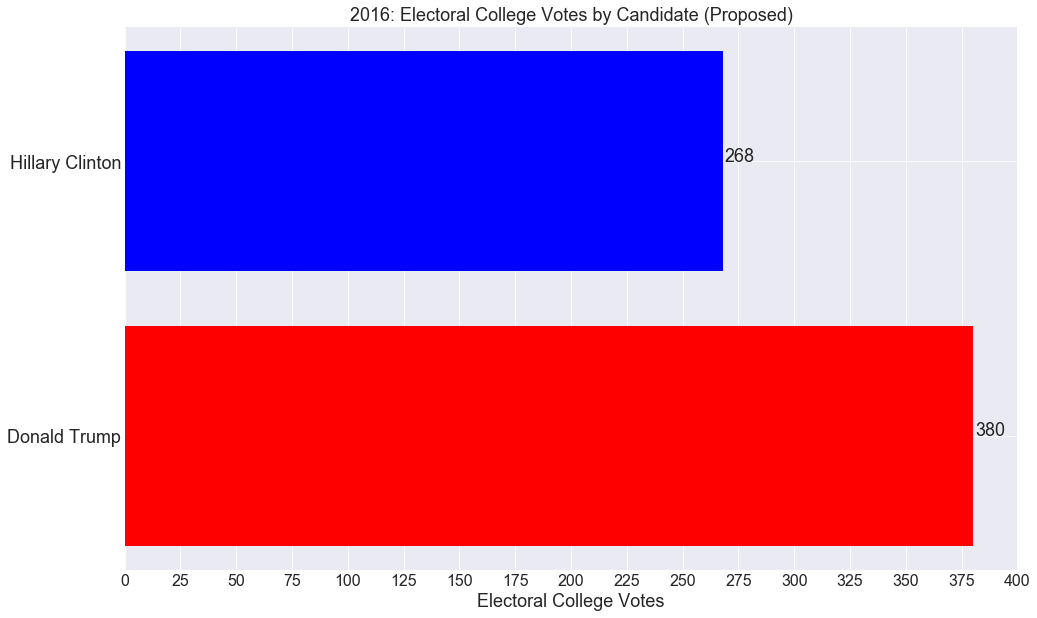

In [149]:
# Create tally for each Candidate

loopdf = EC2016.copy()

candidates = []
parties = []
districtwins = []
propelectorcount = []
color = []
graphyear = int(loopdf['Year'].mean())

for candidate in loopdf['Candidate'].unique():
    if candidate == '-':
        pass
    else:
        candidates.append(candidate)
        
for party in loopdf['Party'].unique():
    parties.append(party)
    if party == 'D':
        color.append('blue')
    elif party == 'R':
        color.append('red')
    else:
        color.append('gray')

for candidate in candidates:
    df = loopdf[loopdf['Candidate'] == candidate]
    districtwins.append(len(df['State'].unique()))
    propelectorcount.append(df['PropEC'].sum())

plt.figure(figsize=(16,10))
plt.barh(candidates, propelectorcount, color=color)

# we also need to switch the labels
plt.xlabel('Electoral College Votes', fontsize=18)
plt.title(f'{graphyear}: Electoral College Votes by Candidate (Proposed)', fontsize=18)

plt.yticks(fontsize=18)
plt.xticks(np.arange(0, max(propelectorcount)*1.10, 25), fontsize=16)

for index,data in enumerate(propelectorcount):
    plt.text(y=index , x=data+1 , s=f"{data}" , fontdict=dict(fontsize=18))

# Save
plt.savefig(f'figs/EC/{graphyear}ProposedResults.png')

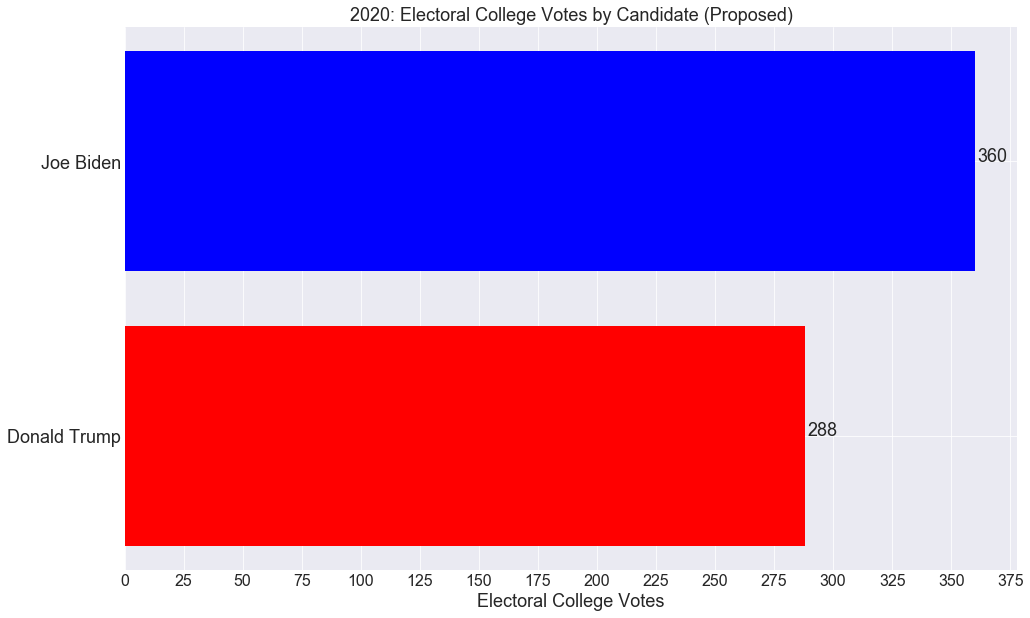

In [150]:
# Create tally for each Candidate

loopdf = EC2020.copy()

candidates = []
parties = []
districtwins = []
propelectorcount = []
color = []
graphyear = int(loopdf['Year'].mean())

for candidate in loopdf['Candidate'].unique():
    if candidate == '-':
        pass
    else:
        candidates.append(candidate)
        
for party in loopdf['Party'].unique():
    parties.append(party)
    if party == 'D':
        color.append('blue')
    elif party == 'R':
        color.append('red')
    else:
        color.append('gray')

for candidate in candidates:
    df = loopdf[loopdf['Candidate'] == candidate]
    districtwins.append(len(df['State'].unique()))
    propelectorcount.append(df['PropEC'].sum())

plt.figure(figsize=(16,10))
plt.barh(candidates, propelectorcount, color=color)

# we also need to switch the labels
plt.xlabel('Electoral College Votes', fontsize=18)
plt.title(f'{graphyear}: Electoral College Votes by Candidate (Proposed)', fontsize=18)

plt.yticks(fontsize=18)
plt.xticks(np.arange(0, max(propelectorcount)*1.10, 25), fontsize=16)

for index,data in enumerate(propelectorcount):
    plt.text(y=index , x=data+1 , s=f"{data}" , fontdict=dict(fontsize=18))

# Save
plt.savefig(f'figs/EC/{graphyear}ProposedResults.png')